In [1]:
import pandas as pd
import os
import numpy as np
import scipy as sp
import torch

In [2]:
from scipy.stats import uniform, norm
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

In [3]:
A = 1.2
b = -0.3
sigma = 0.2
N = 100

In [4]:
X = torch.from_numpy(uniform.rvs(size=N))
X.detach()
X = X.float()

In [5]:
e = torch.from_numpy(norm.rvs(loc=0, scale=sigma, size=N)).float()

In [6]:
y = A*X + b + e

In [7]:
y.detach()
y = y.float()

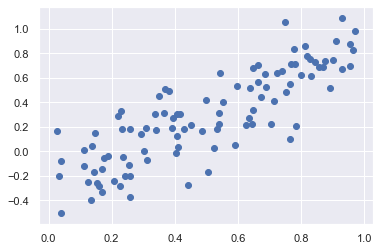

In [8]:
plt.scatter(X,y)

In [9]:
def log_q_pdf(w, theta):
    (mu, rho) = theta 
    
    mu_A = mu[0]
    sigma_A =  torch.log(1+rho[0].exp())
    qA = torch.distributions.normal.Normal(mu_A, sigma_A)
    
    mu_b = mu[1]
    sigma_b = torch.log(1+rho[1].exp())
    qb = torch.distributions.normal.Normal(mu_b, sigma_b)
    
    lp = qA.log_prob(w[0]) + qb.log_prob(w[1])
    return lp

In [10]:
def log_p_pdf(w):
    prior_mu_A = torch.tensor(0.0) 
    prior_sigma_A = torch.tensor(1.0)
    pA = torch.distributions.normal.Normal(prior_mu_A, prior_sigma_A)
    
    prior_mu_b = torch.tensor(0.0) 
    prior_sigma_b = torch.tensor(1.0)
    pb = torch.distributions.normal.Normal(prior_mu_b, prior_sigma_b)
    
    lp = pA.log_prob(w[0]) + pb.log_prob(w[1])
    return lp

In [11]:
def likelihood(y,X,w):
    A = w[0]
    b = w[1]
    
    y_pred = A*X + b
    lp = torch.distributions.normal.Normal(y_pred, 0.2).log_prob(y).sum()
    return lp

In [12]:
def f(w, theta, y, X):
    v = log_q_pdf(w, theta) - log_p_pdf(w)*likelihood(y,X,w)
    return v

In [13]:
#initialization 
mu = torch.tensor([0.0, 0.0], requires_grad=True)
rho = torch.tensor([1.0, 1.0], requires_grad=True)

In [14]:
alpha = torch.tensor(10e-10)

In [15]:
#loop

In [17]:
for t in range(0,100000):
    epsilon = torch.distributions.normal.Normal(torch.tensor(0.0) , torch.tensor(1.0)).sample(torch.Size([2,]))
    epsilon.requires_grad = True

    with torch.no_grad():
        w = mu + torch.log(1+rho.exp())*epsilon
    w.requires_grad = True

    theta = (mu,rho)

    L = f(w, theta, y, X)
    
    print(L)

    L.backward()
 


    with torch.no_grad():
        grad_mu = w.grad + mu.grad
        grad_rho = w.grad*epsilon/(1 + torch.exp(-rho)) + rho.grad 
        mu -= alpha*grad_mu
        rho -= alpha*grad_rho

tensor(-5783.3901, grad_fn=<SubBackward0>)
tensor(-216.7856, grad_fn=<SubBackward0>)
tensor(-293.1642, grad_fn=<SubBackward0>)
tensor(-1502.0164, grad_fn=<SubBackward0>)
tensor(-7647.7480, grad_fn=<SubBackward0>)
tensor(-280259.0312, grad_fn=<SubBackward0>)
tensor(-7547.8877, grad_fn=<SubBackward0>)
tensor(-2290.7832, grad_fn=<SubBackward0>)
tensor(-6608.1123, grad_fn=<SubBackward0>)
tensor(-8107.7969, grad_fn=<SubBackward0>)
tensor(-129216.4297, grad_fn=<SubBackward0>)
tensor(-56979.1406, grad_fn=<SubBackward0>)
tensor(-1735.0759, grad_fn=<SubBackward0>)
tensor(-3094.9751, grad_fn=<SubBackward0>)
tensor(-1555.7078, grad_fn=<SubBackward0>)
tensor(-4597.4404, grad_fn=<SubBackward0>)
tensor(-2120.9641, grad_fn=<SubBackward0>)
tensor(-5549.4868, grad_fn=<SubBackward0>)
tensor(-944.1605, grad_fn=<SubBackward0>)
tensor(-17167.1836, grad_fn=<SubBackward0>)
tensor(-17387.4512, grad_fn=<SubBackward0>)
tensor(-4720.3247, grad_fn=<SubBackward0>)
tensor(-30671.3359, grad_fn=<SubBackward0>)
tensor

tensor(-16077.2520, grad_fn=<SubBackward0>)
tensor(-29126.1367, grad_fn=<SubBackward0>)
tensor(-10168.7939, grad_fn=<SubBackward0>)
tensor(-5952.3291, grad_fn=<SubBackward0>)
tensor(-10245.6025, grad_fn=<SubBackward0>)
tensor(-8224.8408, grad_fn=<SubBackward0>)
tensor(-5973.8208, grad_fn=<SubBackward0>)
tensor(-11008.6641, grad_fn=<SubBackward0>)
tensor(-5123.3657, grad_fn=<SubBackward0>)
tensor(-590.6384, grad_fn=<SubBackward0>)
tensor(-2578.8459, grad_fn=<SubBackward0>)
tensor(-201.0815, grad_fn=<SubBackward0>)
tensor(-16881.4531, grad_fn=<SubBackward0>)
tensor(-14751.6396, grad_fn=<SubBackward0>)
tensor(-168797.7812, grad_fn=<SubBackward0>)
tensor(-38482.8242, grad_fn=<SubBackward0>)
tensor(-1970.2576, grad_fn=<SubBackward0>)
tensor(-6405.8442, grad_fn=<SubBackward0>)
tensor(-28111.6074, grad_fn=<SubBackward0>)
tensor(-3058.9839, grad_fn=<SubBackward0>)
tensor(-2140.7224, grad_fn=<SubBackward0>)
tensor(-352.1706, grad_fn=<SubBackward0>)
tensor(-4166.9219, grad_fn=<SubBackward0>)
ten

tensor(-1922.2465, grad_fn=<SubBackward0>)
tensor(-7973.0166, grad_fn=<SubBackward0>)
tensor(-8.3701, grad_fn=<SubBackward0>)
tensor(-4368.5942, grad_fn=<SubBackward0>)
tensor(-14097.4443, grad_fn=<SubBackward0>)
tensor(-7349.6602, grad_fn=<SubBackward0>)
tensor(-134.2948, grad_fn=<SubBackward0>)
tensor(-12104.2695, grad_fn=<SubBackward0>)
tensor(-5358.2720, grad_fn=<SubBackward0>)
tensor(-1401.5450, grad_fn=<SubBackward0>)
tensor(-1976.1890, grad_fn=<SubBackward0>)
tensor(-507.8882, grad_fn=<SubBackward0>)
tensor(-8357.3418, grad_fn=<SubBackward0>)
tensor(-8373.7656, grad_fn=<SubBackward0>)
tensor(-5723.9927, grad_fn=<SubBackward0>)
tensor(-363.8351, grad_fn=<SubBackward0>)
tensor(-473.2803, grad_fn=<SubBackward0>)
tensor(-22897.9102, grad_fn=<SubBackward0>)
tensor(-260.9157, grad_fn=<SubBackward0>)
tensor(-838.1313, grad_fn=<SubBackward0>)
tensor(-9300.5479, grad_fn=<SubBackward0>)
tensor(-63634.0586, grad_fn=<SubBackward0>)
tensor(-299.8513, grad_fn=<SubBackward0>)
tensor(-47203.976

tensor(-649.5836, grad_fn=<SubBackward0>)
tensor(-2368.9353, grad_fn=<SubBackward0>)
tensor(32.3484, grad_fn=<SubBackward0>)
tensor(-2031.4331, grad_fn=<SubBackward0>)
tensor(-53532.0938, grad_fn=<SubBackward0>)
tensor(-33615.8555, grad_fn=<SubBackward0>)
tensor(-7322.6748, grad_fn=<SubBackward0>)
tensor(-76460.8438, grad_fn=<SubBackward0>)
tensor(-2214.8000, grad_fn=<SubBackward0>)
tensor(-7289.5137, grad_fn=<SubBackward0>)
tensor(42.0437, grad_fn=<SubBackward0>)
tensor(-5602.4985, grad_fn=<SubBackward0>)
tensor(-6888.7769, grad_fn=<SubBackward0>)
tensor(-9302.2910, grad_fn=<SubBackward0>)
tensor(-1192.0446, grad_fn=<SubBackward0>)
tensor(-64461.5000, grad_fn=<SubBackward0>)
tensor(-1049.7993, grad_fn=<SubBackward0>)
tensor(-16696.1055, grad_fn=<SubBackward0>)
tensor(-9854.4629, grad_fn=<SubBackward0>)
tensor(-1737.6019, grad_fn=<SubBackward0>)
tensor(-8777.5088, grad_fn=<SubBackward0>)
tensor(-2733.9490, grad_fn=<SubBackward0>)
tensor(-3704.7461, grad_fn=<SubBackward0>)
tensor(-38100

tensor(-21616., grad_fn=<SubBackward0>)
tensor(-7394.9668, grad_fn=<SubBackward0>)
tensor(-1669.3737, grad_fn=<SubBackward0>)
tensor(-9424.9238, grad_fn=<SubBackward0>)
tensor(-84193.2109, grad_fn=<SubBackward0>)
tensor(-11138.0791, grad_fn=<SubBackward0>)
tensor(-7149.6948, grad_fn=<SubBackward0>)
tensor(-10345.8809, grad_fn=<SubBackward0>)
tensor(-31384.8359, grad_fn=<SubBackward0>)
tensor(-5647.1421, grad_fn=<SubBackward0>)
tensor(-53831.5195, grad_fn=<SubBackward0>)
tensor(-42691.5117, grad_fn=<SubBackward0>)
tensor(-7649.7637, grad_fn=<SubBackward0>)
tensor(-1648.0558, grad_fn=<SubBackward0>)
tensor(-16490.0449, grad_fn=<SubBackward0>)
tensor(-5930.0161, grad_fn=<SubBackward0>)
tensor(-15434.8369, grad_fn=<SubBackward0>)
tensor(-4606.2280, grad_fn=<SubBackward0>)
tensor(-16459.4961, grad_fn=<SubBackward0>)
tensor(-11848.8398, grad_fn=<SubBackward0>)
tensor(-4011.6760, grad_fn=<SubBackward0>)
tensor(-963.4208, grad_fn=<SubBackward0>)
tensor(-801.8550, grad_fn=<SubBackward0>)
tensor

tensor(-872.2791, grad_fn=<SubBackward0>)
tensor(-1794.5646, grad_fn=<SubBackward0>)
tensor(-22845.4375, grad_fn=<SubBackward0>)
tensor(-8547.7744, grad_fn=<SubBackward0>)
tensor(-22150.0469, grad_fn=<SubBackward0>)
tensor(-1577.2277, grad_fn=<SubBackward0>)
tensor(-6508.7231, grad_fn=<SubBackward0>)
tensor(-4295.3760, grad_fn=<SubBackward0>)
tensor(-4186.1475, grad_fn=<SubBackward0>)
tensor(-25814.1699, grad_fn=<SubBackward0>)
tensor(-30465.2695, grad_fn=<SubBackward0>)
tensor(-2260.6536, grad_fn=<SubBackward0>)
tensor(-75277.0234, grad_fn=<SubBackward0>)
tensor(-766.9751, grad_fn=<SubBackward0>)
tensor(-22500.4141, grad_fn=<SubBackward0>)
tensor(-1943.5210, grad_fn=<SubBackward0>)
tensor(-1221.1243, grad_fn=<SubBackward0>)
tensor(-462.2359, grad_fn=<SubBackward0>)
tensor(-853.9820, grad_fn=<SubBackward0>)
tensor(-21995.6621, grad_fn=<SubBackward0>)
tensor(-11679.5859, grad_fn=<SubBackward0>)
tensor(-13374.7197, grad_fn=<SubBackward0>)
tensor(-310.6939, grad_fn=<SubBackward0>)
tensor(

tensor(-10012.2900, grad_fn=<SubBackward0>)
tensor(-1493.2629, grad_fn=<SubBackward0>)
tensor(-6238.9307, grad_fn=<SubBackward0>)
tensor(-1176.4502, grad_fn=<SubBackward0>)
tensor(-22830.8613, grad_fn=<SubBackward0>)
tensor(2.3049, grad_fn=<SubBackward0>)
tensor(-31498.0293, grad_fn=<SubBackward0>)
tensor(-4302.7974, grad_fn=<SubBackward0>)
tensor(-28749.3340, grad_fn=<SubBackward0>)
tensor(-526.3108, grad_fn=<SubBackward0>)
tensor(-15596.1914, grad_fn=<SubBackward0>)
tensor(-2010.4067, grad_fn=<SubBackward0>)
tensor(-5929.1802, grad_fn=<SubBackward0>)
tensor(31.2301, grad_fn=<SubBackward0>)
tensor(-26936.5625, grad_fn=<SubBackward0>)
tensor(-71104.6016, grad_fn=<SubBackward0>)
tensor(-7115.7681, grad_fn=<SubBackward0>)
tensor(-1180.9192, grad_fn=<SubBackward0>)
tensor(-690.4642, grad_fn=<SubBackward0>)
tensor(-290.6842, grad_fn=<SubBackward0>)
tensor(-26864.8047, grad_fn=<SubBackward0>)
tensor(-4461.1929, grad_fn=<SubBackward0>)
tensor(-123487.9688, grad_fn=<SubBackward0>)
tensor(-159

tensor(-3855.2385, grad_fn=<SubBackward0>)
tensor(-37340.7422, grad_fn=<SubBackward0>)
tensor(-3213.5190, grad_fn=<SubBackward0>)
tensor(-1016.2131, grad_fn=<SubBackward0>)
tensor(-6856.9692, grad_fn=<SubBackward0>)
tensor(-23365.8848, grad_fn=<SubBackward0>)
tensor(-251.0913, grad_fn=<SubBackward0>)
tensor(-207015.0469, grad_fn=<SubBackward0>)
tensor(-12368.0195, grad_fn=<SubBackward0>)
tensor(-2081.1184, grad_fn=<SubBackward0>)
tensor(-4858.9404, grad_fn=<SubBackward0>)
tensor(-1371.1646, grad_fn=<SubBackward0>)
tensor(-14288.5332, grad_fn=<SubBackward0>)
tensor(-1687.5404, grad_fn=<SubBackward0>)
tensor(-3637.9683, grad_fn=<SubBackward0>)
tensor(-14967.6006, grad_fn=<SubBackward0>)
tensor(-72586.9922, grad_fn=<SubBackward0>)
tensor(-1990.4160, grad_fn=<SubBackward0>)
tensor(-13397.2666, grad_fn=<SubBackward0>)
tensor(-2747.4141, grad_fn=<SubBackward0>)
tensor(-65111.9844, grad_fn=<SubBackward0>)
tensor(-982.3800, grad_fn=<SubBackward0>)
tensor(-2131.3601, grad_fn=<SubBackward0>)
ten

tensor(-66194.8516, grad_fn=<SubBackward0>)
tensor(-42639.0195, grad_fn=<SubBackward0>)
tensor(-37064.3086, grad_fn=<SubBackward0>)
tensor(-1639.7943, grad_fn=<SubBackward0>)
tensor(-63875.4492, grad_fn=<SubBackward0>)
tensor(-12936.2881, grad_fn=<SubBackward0>)
tensor(-14311.2705, grad_fn=<SubBackward0>)
tensor(-99008.4844, grad_fn=<SubBackward0>)
tensor(-5204.5059, grad_fn=<SubBackward0>)
tensor(-56697.3438, grad_fn=<SubBackward0>)
tensor(-45891.3477, grad_fn=<SubBackward0>)
tensor(-25423.7910, grad_fn=<SubBackward0>)
tensor(-58113.8867, grad_fn=<SubBackward0>)
tensor(-2577.9812, grad_fn=<SubBackward0>)
tensor(-559.8529, grad_fn=<SubBackward0>)
tensor(-76737.8594, grad_fn=<SubBackward0>)
tensor(-5411.7656, grad_fn=<SubBackward0>)
tensor(-2689.4092, grad_fn=<SubBackward0>)
tensor(-33549.5039, grad_fn=<SubBackward0>)
tensor(-14013.4355, grad_fn=<SubBackward0>)
tensor(-1335.7612, grad_fn=<SubBackward0>)
tensor(-34134.9141, grad_fn=<SubBackward0>)
tensor(-1402.5300, grad_fn=<SubBackward0

tensor(-459.3047, grad_fn=<SubBackward0>)
tensor(-9545.4609, grad_fn=<SubBackward0>)
tensor(-562.5048, grad_fn=<SubBackward0>)
tensor(-16874.2070, grad_fn=<SubBackward0>)
tensor(-3271.7834, grad_fn=<SubBackward0>)
tensor(-19.7014, grad_fn=<SubBackward0>)
tensor(-22770.3945, grad_fn=<SubBackward0>)
tensor(-8500.7119, grad_fn=<SubBackward0>)
tensor(-14715.9053, grad_fn=<SubBackward0>)
tensor(-3585.3040, grad_fn=<SubBackward0>)
tensor(-21094.1777, grad_fn=<SubBackward0>)
tensor(-7594.2944, grad_fn=<SubBackward0>)
tensor(-21852.0566, grad_fn=<SubBackward0>)
tensor(-70414.9062, grad_fn=<SubBackward0>)
tensor(-635.9520, grad_fn=<SubBackward0>)
tensor(-13069.9053, grad_fn=<SubBackward0>)
tensor(-71325.2344, grad_fn=<SubBackward0>)
tensor(-23681.5039, grad_fn=<SubBackward0>)
tensor(-166639.8281, grad_fn=<SubBackward0>)
tensor(-54285.2852, grad_fn=<SubBackward0>)
tensor(-979.1396, grad_fn=<SubBackward0>)
tensor(-557.0523, grad_fn=<SubBackward0>)
tensor(-1362.0499, grad_fn=<SubBackward0>)
tensor

tensor(-499.7409, grad_fn=<SubBackward0>)
tensor(-2983.0176, grad_fn=<SubBackward0>)
tensor(-22034.6289, grad_fn=<SubBackward0>)
tensor(-987.4349, grad_fn=<SubBackward0>)
tensor(-20660.3770, grad_fn=<SubBackward0>)
tensor(-81381.7109, grad_fn=<SubBackward0>)
tensor(-1524.6761, grad_fn=<SubBackward0>)
tensor(-1829.2551, grad_fn=<SubBackward0>)
tensor(-17110.7988, grad_fn=<SubBackward0>)
tensor(-36964.6836, grad_fn=<SubBackward0>)
tensor(-157.8281, grad_fn=<SubBackward0>)
tensor(-2544.9722, grad_fn=<SubBackward0>)
tensor(-1900.3958, grad_fn=<SubBackward0>)
tensor(-14160.1250, grad_fn=<SubBackward0>)
tensor(-4539.5229, grad_fn=<SubBackward0>)
tensor(-10642.8535, grad_fn=<SubBackward0>)
tensor(-3740.1836, grad_fn=<SubBackward0>)
tensor(4.5908, grad_fn=<SubBackward0>)
tensor(-72930.9766, grad_fn=<SubBackward0>)
tensor(-2498.4395, grad_fn=<SubBackward0>)
tensor(-2215.9526, grad_fn=<SubBackward0>)
tensor(-1165.2981, grad_fn=<SubBackward0>)
tensor(-7170.4805, grad_fn=<SubBackward0>)
tensor(-14

tensor(-2655.8940, grad_fn=<SubBackward0>)
tensor(-9453.1348, grad_fn=<SubBackward0>)
tensor(-4969.2095, grad_fn=<SubBackward0>)
tensor(-1548.4592, grad_fn=<SubBackward0>)
tensor(-16347.8965, grad_fn=<SubBackward0>)
tensor(-9352.9893, grad_fn=<SubBackward0>)
tensor(-18070.3828, grad_fn=<SubBackward0>)
tensor(-833.8319, grad_fn=<SubBackward0>)
tensor(-45747.6836, grad_fn=<SubBackward0>)
tensor(-1607.3817, grad_fn=<SubBackward0>)
tensor(-108.3972, grad_fn=<SubBackward0>)
tensor(-1417.1544, grad_fn=<SubBackward0>)
tensor(-3006.9219, grad_fn=<SubBackward0>)
tensor(-769.9550, grad_fn=<SubBackward0>)
tensor(-22875.9941, grad_fn=<SubBackward0>)
tensor(-22751.3203, grad_fn=<SubBackward0>)
tensor(-4837.2949, grad_fn=<SubBackward0>)
tensor(-90907.6016, grad_fn=<SubBackward0>)
tensor(-2964.3579, grad_fn=<SubBackward0>)
tensor(-37497.6836, grad_fn=<SubBackward0>)
tensor(-6013.9653, grad_fn=<SubBackward0>)
tensor(-17835.4062, grad_fn=<SubBackward0>)
tensor(-2861.4973, grad_fn=<SubBackward0>)
tensor

tensor(-1207.7977, grad_fn=<SubBackward0>)
tensor(-1000.4410, grad_fn=<SubBackward0>)
tensor(-1735.5763, grad_fn=<SubBackward0>)
tensor(-77647.8984, grad_fn=<SubBackward0>)
tensor(-22317.1602, grad_fn=<SubBackward0>)
tensor(-22395.2949, grad_fn=<SubBackward0>)
tensor(-18182.2949, grad_fn=<SubBackward0>)
tensor(-24564.9961, grad_fn=<SubBackward0>)
tensor(-1091.0997, grad_fn=<SubBackward0>)
tensor(-11767.7959, grad_fn=<SubBackward0>)
tensor(-2590.4905, grad_fn=<SubBackward0>)
tensor(-993.8015, grad_fn=<SubBackward0>)
tensor(-5652.4238, grad_fn=<SubBackward0>)
tensor(-4257.8774, grad_fn=<SubBackward0>)
tensor(-1868.7366, grad_fn=<SubBackward0>)
tensor(-37022.1680, grad_fn=<SubBackward0>)
tensor(-89.3978, grad_fn=<SubBackward0>)
tensor(-10011.5811, grad_fn=<SubBackward0>)
tensor(-7623.7402, grad_fn=<SubBackward0>)
tensor(-3349.5173, grad_fn=<SubBackward0>)
tensor(-1109.6172, grad_fn=<SubBackward0>)
tensor(-7506.9839, grad_fn=<SubBackward0>)
tensor(-906.2003, grad_fn=<SubBackward0>)
tensor(

tensor(-79783.4844, grad_fn=<SubBackward0>)
tensor(-17693.6582, grad_fn=<SubBackward0>)
tensor(-4991.2485, grad_fn=<SubBackward0>)
tensor(-28459.4082, grad_fn=<SubBackward0>)
tensor(-4109.5566, grad_fn=<SubBackward0>)
tensor(-1851.5825, grad_fn=<SubBackward0>)
tensor(-15362.6504, grad_fn=<SubBackward0>)
tensor(21.7684, grad_fn=<SubBackward0>)
tensor(41.3815, grad_fn=<SubBackward0>)
tensor(-522.5966, grad_fn=<SubBackward0>)
tensor(-36001.2891, grad_fn=<SubBackward0>)
tensor(-2205.6685, grad_fn=<SubBackward0>)
tensor(-25472.0059, grad_fn=<SubBackward0>)
tensor(-1183.5615, grad_fn=<SubBackward0>)
tensor(-276.4030, grad_fn=<SubBackward0>)
tensor(-18264.0703, grad_fn=<SubBackward0>)
tensor(-435.6373, grad_fn=<SubBackward0>)
tensor(-287.8776, grad_fn=<SubBackward0>)
tensor(-250.9466, grad_fn=<SubBackward0>)
tensor(-7717.7979, grad_fn=<SubBackward0>)
tensor(-15575.9746, grad_fn=<SubBackward0>)
tensor(-2232.3975, grad_fn=<SubBackward0>)
tensor(-63468.9336, grad_fn=<SubBackward0>)
tensor(-679.2

tensor(-3483.8594, grad_fn=<SubBackward0>)
tensor(-15658.8555, grad_fn=<SubBackward0>)
tensor(-311.6189, grad_fn=<SubBackward0>)
tensor(-1258.1097, grad_fn=<SubBackward0>)
tensor(-36509.0039, grad_fn=<SubBackward0>)
tensor(-382.6386, grad_fn=<SubBackward0>)
tensor(-318.8129, grad_fn=<SubBackward0>)
tensor(-18232.4785, grad_fn=<SubBackward0>)
tensor(-11625.3604, grad_fn=<SubBackward0>)
tensor(-58862.4414, grad_fn=<SubBackward0>)
tensor(-4079.1296, grad_fn=<SubBackward0>)
tensor(-87706.7891, grad_fn=<SubBackward0>)
tensor(-13855.2930, grad_fn=<SubBackward0>)
tensor(-7562.7026, grad_fn=<SubBackward0>)
tensor(-8024.3442, grad_fn=<SubBackward0>)
tensor(-13209.6143, grad_fn=<SubBackward0>)
tensor(-1600.7909, grad_fn=<SubBackward0>)
tensor(-241.7597, grad_fn=<SubBackward0>)
tensor(-9168.7607, grad_fn=<SubBackward0>)
tensor(-27085.5977, grad_fn=<SubBackward0>)
tensor(-161.4903, grad_fn=<SubBackward0>)
tensor(-1095.8375, grad_fn=<SubBackward0>)
tensor(-1330028.1250, grad_fn=<SubBackward0>)
tens

tensor(-1405.5157, grad_fn=<SubBackward0>)
tensor(-7589.4849, grad_fn=<SubBackward0>)
tensor(-32063.2109, grad_fn=<SubBackward0>)
tensor(-14957.9111, grad_fn=<SubBackward0>)
tensor(-15472.8965, grad_fn=<SubBackward0>)
tensor(-3334.0842, grad_fn=<SubBackward0>)
tensor(-4168.0303, grad_fn=<SubBackward0>)
tensor(-6065.9980, grad_fn=<SubBackward0>)
tensor(-3271.7686, grad_fn=<SubBackward0>)
tensor(-43764.3398, grad_fn=<SubBackward0>)
tensor(-64987.7109, grad_fn=<SubBackward0>)
tensor(-30577.1504, grad_fn=<SubBackward0>)
tensor(-191.5529, grad_fn=<SubBackward0>)
tensor(-5432.2808, grad_fn=<SubBackward0>)
tensor(-15859.3428, grad_fn=<SubBackward0>)
tensor(-60460.8867, grad_fn=<SubBackward0>)
tensor(-864.7896, grad_fn=<SubBackward0>)
tensor(-1737.6539, grad_fn=<SubBackward0>)
tensor(-4211.7100, grad_fn=<SubBackward0>)
tensor(-34400.6172, grad_fn=<SubBackward0>)
tensor(-57527.0078, grad_fn=<SubBackward0>)
tensor(-3403.3557, grad_fn=<SubBackward0>)
tensor(-1230.2800, grad_fn=<SubBackward0>)
ten

tensor(-48186.4062, grad_fn=<SubBackward0>)
tensor(-5809.4990, grad_fn=<SubBackward0>)
tensor(-38315.8672, grad_fn=<SubBackward0>)
tensor(-138.9678, grad_fn=<SubBackward0>)
tensor(-27062.4531, grad_fn=<SubBackward0>)
tensor(-1499.0863, grad_fn=<SubBackward0>)
tensor(-22748.1855, grad_fn=<SubBackward0>)
tensor(-1780.1176, grad_fn=<SubBackward0>)
tensor(-5865.7300, grad_fn=<SubBackward0>)
tensor(-1323.9928, grad_fn=<SubBackward0>)
tensor(-7637.0728, grad_fn=<SubBackward0>)
tensor(-14163.3389, grad_fn=<SubBackward0>)
tensor(-11752.3887, grad_fn=<SubBackward0>)
tensor(-1254.4934, grad_fn=<SubBackward0>)
tensor(-35403.1445, grad_fn=<SubBackward0>)
tensor(-48948.5078, grad_fn=<SubBackward0>)
tensor(-8770.2510, grad_fn=<SubBackward0>)
tensor(-8538.0156, grad_fn=<SubBackward0>)
tensor(-14920.0117, grad_fn=<SubBackward0>)
tensor(-159.5008, grad_fn=<SubBackward0>)
tensor(-44798.7227, grad_fn=<SubBackward0>)
tensor(-4842.5107, grad_fn=<SubBackward0>)
tensor(-16411.2832, grad_fn=<SubBackward0>)
te

tensor(-172896.1094, grad_fn=<SubBackward0>)
tensor(-443.8894, grad_fn=<SubBackward0>)
tensor(-5422.6323, grad_fn=<SubBackward0>)
tensor(-5060.9878, grad_fn=<SubBackward0>)
tensor(-84621.7422, grad_fn=<SubBackward0>)
tensor(-2887.2224, grad_fn=<SubBackward0>)
tensor(-114.7780, grad_fn=<SubBackward0>)
tensor(-10655.1221, grad_fn=<SubBackward0>)
tensor(-117.3013, grad_fn=<SubBackward0>)
tensor(-45.8588, grad_fn=<SubBackward0>)
tensor(-2565.9504, grad_fn=<SubBackward0>)
tensor(-1222.9580, grad_fn=<SubBackward0>)
tensor(-2990.1958, grad_fn=<SubBackward0>)
tensor(-4241.0425, grad_fn=<SubBackward0>)
tensor(-65877.2578, grad_fn=<SubBackward0>)
tensor(-4010.1021, grad_fn=<SubBackward0>)
tensor(-20759.8477, grad_fn=<SubBackward0>)
tensor(-19049.2598, grad_fn=<SubBackward0>)
tensor(-245.0165, grad_fn=<SubBackward0>)
tensor(-14742.4678, grad_fn=<SubBackward0>)
tensor(-5097.0889, grad_fn=<SubBackward0>)
tensor(-46364.7539, grad_fn=<SubBackward0>)
tensor(-1665.1440, grad_fn=<SubBackward0>)
tensor(-

tensor(-51464.8203, grad_fn=<SubBackward0>)
tensor(-71114.9688, grad_fn=<SubBackward0>)
tensor(-9285.9473, grad_fn=<SubBackward0>)
tensor(-8619.2139, grad_fn=<SubBackward0>)
tensor(-11017.6045, grad_fn=<SubBackward0>)
tensor(-5447.7798, grad_fn=<SubBackward0>)
tensor(-1036.7755, grad_fn=<SubBackward0>)
tensor(-3426.6841, grad_fn=<SubBackward0>)
tensor(-34822.6836, grad_fn=<SubBackward0>)
tensor(-108396.7188, grad_fn=<SubBackward0>)
tensor(-1321.7998, grad_fn=<SubBackward0>)
tensor(-95700.9453, grad_fn=<SubBackward0>)
tensor(-1948.7784, grad_fn=<SubBackward0>)
tensor(-692.2124, grad_fn=<SubBackward0>)
tensor(-2210.6047, grad_fn=<SubBackward0>)
tensor(-87099.0078, grad_fn=<SubBackward0>)
tensor(-486.0534, grad_fn=<SubBackward0>)
tensor(-8951.0752, grad_fn=<SubBackward0>)
tensor(-2844.9177, grad_fn=<SubBackward0>)
tensor(-922.8786, grad_fn=<SubBackward0>)
tensor(-137.4587, grad_fn=<SubBackward0>)
tensor(-98006.8516, grad_fn=<SubBackward0>)
tensor(-2657.5508, grad_fn=<SubBackward0>)
tensor

tensor(-129991.7109, grad_fn=<SubBackward0>)
tensor(-15434.9951, grad_fn=<SubBackward0>)
tensor(-23.4960, grad_fn=<SubBackward0>)
tensor(-1484.2894, grad_fn=<SubBackward0>)
tensor(-14840.3779, grad_fn=<SubBackward0>)
tensor(-8249.5283, grad_fn=<SubBackward0>)
tensor(-288892.8438, grad_fn=<SubBackward0>)
tensor(-36.6811, grad_fn=<SubBackward0>)
tensor(-14936.2852, grad_fn=<SubBackward0>)
tensor(-18812.1953, grad_fn=<SubBackward0>)
tensor(-13738.0527, grad_fn=<SubBackward0>)
tensor(-11807.7080, grad_fn=<SubBackward0>)
tensor(-6742.5981, grad_fn=<SubBackward0>)
tensor(-57308.6328, grad_fn=<SubBackward0>)
tensor(14.2542, grad_fn=<SubBackward0>)
tensor(-474.0298, grad_fn=<SubBackward0>)
tensor(-1028.2433, grad_fn=<SubBackward0>)
tensor(-3487.8835, grad_fn=<SubBackward0>)
tensor(-37658.1797, grad_fn=<SubBackward0>)
tensor(-6316.9351, grad_fn=<SubBackward0>)
tensor(-125.4131, grad_fn=<SubBackward0>)
tensor(-8408.0254, grad_fn=<SubBackward0>)
tensor(-60632.4766, grad_fn=<SubBackward0>)
tensor(

tensor(-6966.3945, grad_fn=<SubBackward0>)
tensor(-64.3293, grad_fn=<SubBackward0>)
tensor(-14863.5752, grad_fn=<SubBackward0>)
tensor(-19717.3008, grad_fn=<SubBackward0>)
tensor(-2678.9221, grad_fn=<SubBackward0>)
tensor(-17248.9688, grad_fn=<SubBackward0>)
tensor(-114.8001, grad_fn=<SubBackward0>)
tensor(-1843.0082, grad_fn=<SubBackward0>)
tensor(-37218.7305, grad_fn=<SubBackward0>)
tensor(-4909.2744, grad_fn=<SubBackward0>)
tensor(-1995.1844, grad_fn=<SubBackward0>)
tensor(-2755.4514, grad_fn=<SubBackward0>)
tensor(-5806.5093, grad_fn=<SubBackward0>)
tensor(-12677.3115, grad_fn=<SubBackward0>)
tensor(-168.9664, grad_fn=<SubBackward0>)
tensor(-7491.1895, grad_fn=<SubBackward0>)
tensor(-10177.9609, grad_fn=<SubBackward0>)
tensor(-54333.7539, grad_fn=<SubBackward0>)
tensor(-541.2208, grad_fn=<SubBackward0>)
tensor(-12541.3770, grad_fn=<SubBackward0>)
tensor(-266.0195, grad_fn=<SubBackward0>)
tensor(-5546.6343, grad_fn=<SubBackward0>)
tensor(-53663.7773, grad_fn=<SubBackward0>)
tensor(-

tensor(-233526.2969, grad_fn=<SubBackward0>)
tensor(-16111.1133, grad_fn=<SubBackward0>)
tensor(-21834.8418, grad_fn=<SubBackward0>)
tensor(-15188.5977, grad_fn=<SubBackward0>)
tensor(-14439.6338, grad_fn=<SubBackward0>)
tensor(-4090.7048, grad_fn=<SubBackward0>)
tensor(-14004.1221, grad_fn=<SubBackward0>)
tensor(-18975.1426, grad_fn=<SubBackward0>)
tensor(-11671.9268, grad_fn=<SubBackward0>)
tensor(-95935.4688, grad_fn=<SubBackward0>)
tensor(-47905.5508, grad_fn=<SubBackward0>)
tensor(-18254.3086, grad_fn=<SubBackward0>)
tensor(-13227.2188, grad_fn=<SubBackward0>)
tensor(-23475.7598, grad_fn=<SubBackward0>)
tensor(-51244.3672, grad_fn=<SubBackward0>)
tensor(-7544.3008, grad_fn=<SubBackward0>)
tensor(-6391.3325, grad_fn=<SubBackward0>)
tensor(-151.2755, grad_fn=<SubBackward0>)
tensor(-41034.3516, grad_fn=<SubBackward0>)
tensor(-3080.7339, grad_fn=<SubBackward0>)
tensor(-80.3168, grad_fn=<SubBackward0>)
tensor(-2708.0066, grad_fn=<SubBackward0>)
tensor(-2199.1155, grad_fn=<SubBackward0>

tensor(-2366.8994, grad_fn=<SubBackward0>)
tensor(-2508.4207, grad_fn=<SubBackward0>)
tensor(-14175.1289, grad_fn=<SubBackward0>)
tensor(-63318.2344, grad_fn=<SubBackward0>)
tensor(-838.3190, grad_fn=<SubBackward0>)
tensor(-866.8654, grad_fn=<SubBackward0>)
tensor(-893.0269, grad_fn=<SubBackward0>)
tensor(-3034.6492, grad_fn=<SubBackward0>)
tensor(-11652.2461, grad_fn=<SubBackward0>)
tensor(-7546.4141, grad_fn=<SubBackward0>)
tensor(-55210.6758, grad_fn=<SubBackward0>)
tensor(-4715.0200, grad_fn=<SubBackward0>)
tensor(-8652.2061, grad_fn=<SubBackward0>)
tensor(-129.2922, grad_fn=<SubBackward0>)
tensor(-77730.3359, grad_fn=<SubBackward0>)
tensor(-133.4072, grad_fn=<SubBackward0>)
tensor(-4708.6587, grad_fn=<SubBackward0>)
tensor(-4913.7285, grad_fn=<SubBackward0>)
tensor(-6037.4800, grad_fn=<SubBackward0>)
tensor(-4349.1479, grad_fn=<SubBackward0>)
tensor(-91.2984, grad_fn=<SubBackward0>)
tensor(-1071.4653, grad_fn=<SubBackward0>)
tensor(-1556.2831, grad_fn=<SubBackward0>)
tensor(-12059

tensor(-1242.2023, grad_fn=<SubBackward0>)
tensor(-156449.5469, grad_fn=<SubBackward0>)
tensor(-9681.0752, grad_fn=<SubBackward0>)
tensor(-1565.9551, grad_fn=<SubBackward0>)
tensor(-160286.1094, grad_fn=<SubBackward0>)
tensor(-18099.1152, grad_fn=<SubBackward0>)
tensor(-2203.5471, grad_fn=<SubBackward0>)
tensor(-194614.2812, grad_fn=<SubBackward0>)
tensor(-14987.9404, grad_fn=<SubBackward0>)
tensor(-3068.0581, grad_fn=<SubBackward0>)
tensor(-254.1336, grad_fn=<SubBackward0>)
tensor(-518.8040, grad_fn=<SubBackward0>)
tensor(-8552.1230, grad_fn=<SubBackward0>)
tensor(-121861.8750, grad_fn=<SubBackward0>)
tensor(-112199.2266, grad_fn=<SubBackward0>)
tensor(-122841.3984, grad_fn=<SubBackward0>)
tensor(-1164.2083, grad_fn=<SubBackward0>)
tensor(-52009.7734, grad_fn=<SubBackward0>)
tensor(-57082.1016, grad_fn=<SubBackward0>)
tensor(-46518.0742, grad_fn=<SubBackward0>)
tensor(-51422.5938, grad_fn=<SubBackward0>)
tensor(-22036.2188, grad_fn=<SubBackward0>)
tensor(-6898.3940, grad_fn=<SubBackwa

tensor(-27521.9883, grad_fn=<SubBackward0>)
tensor(-1.9180, grad_fn=<SubBackward0>)
tensor(-385.0386, grad_fn=<SubBackward0>)
tensor(-914.3309, grad_fn=<SubBackward0>)
tensor(-2690.3711, grad_fn=<SubBackward0>)
tensor(-12739.2148, grad_fn=<SubBackward0>)
tensor(-23338.1074, grad_fn=<SubBackward0>)
tensor(-2031.3207, grad_fn=<SubBackward0>)
tensor(-1447.4596, grad_fn=<SubBackward0>)
tensor(-5967.5410, grad_fn=<SubBackward0>)
tensor(-142236.3125, grad_fn=<SubBackward0>)
tensor(-1432.0068, grad_fn=<SubBackward0>)
tensor(-11077.4102, grad_fn=<SubBackward0>)
tensor(-1859.5992, grad_fn=<SubBackward0>)
tensor(-2259.2568, grad_fn=<SubBackward0>)
tensor(-4958.3394, grad_fn=<SubBackward0>)
tensor(-3727.2881, grad_fn=<SubBackward0>)
tensor(-40990.2539, grad_fn=<SubBackward0>)
tensor(-5900.7178, grad_fn=<SubBackward0>)
tensor(-1306.0769, grad_fn=<SubBackward0>)
tensor(-16412.9453, grad_fn=<SubBackward0>)
tensor(-26708.4043, grad_fn=<SubBackward0>)
tensor(-1831.2179, grad_fn=<SubBackward0>)
tensor(

tensor(-3599.2109, grad_fn=<SubBackward0>)
tensor(-1283.3059, grad_fn=<SubBackward0>)
tensor(-12743.0361, grad_fn=<SubBackward0>)
tensor(-192463.8438, grad_fn=<SubBackward0>)
tensor(-10897.3555, grad_fn=<SubBackward0>)
tensor(-6482.2354, grad_fn=<SubBackward0>)
tensor(-186.5073, grad_fn=<SubBackward0>)
tensor(-10208.4375, grad_fn=<SubBackward0>)
tensor(-39764.7695, grad_fn=<SubBackward0>)
tensor(-86.9179, grad_fn=<SubBackward0>)
tensor(-52702.4375, grad_fn=<SubBackward0>)
tensor(-3664.3113, grad_fn=<SubBackward0>)
tensor(-28632.5781, grad_fn=<SubBackward0>)
tensor(-3553.5684, grad_fn=<SubBackward0>)
tensor(-11318.3779, grad_fn=<SubBackward0>)
tensor(-3233.8186, grad_fn=<SubBackward0>)
tensor(-85292.7734, grad_fn=<SubBackward0>)
tensor(-6969.3823, grad_fn=<SubBackward0>)
tensor(-7859.4150, grad_fn=<SubBackward0>)
tensor(-14484.0293, grad_fn=<SubBackward0>)
tensor(-106953.0703, grad_fn=<SubBackward0>)
tensor(-3567.4568, grad_fn=<SubBackward0>)
tensor(-7944.5454, grad_fn=<SubBackward0>)
t

tensor(-1154.1555, grad_fn=<SubBackward0>)
tensor(-486.9096, grad_fn=<SubBackward0>)
tensor(-506.7905, grad_fn=<SubBackward0>)
tensor(-77124.3984, grad_fn=<SubBackward0>)
tensor(-162831.4531, grad_fn=<SubBackward0>)
tensor(-54632.9023, grad_fn=<SubBackward0>)
tensor(-9942.3594, grad_fn=<SubBackward0>)
tensor(-59356.4375, grad_fn=<SubBackward0>)
tensor(-21393.9746, grad_fn=<SubBackward0>)
tensor(-11224.4961, grad_fn=<SubBackward0>)
tensor(-971.6954, grad_fn=<SubBackward0>)
tensor(17.4284, grad_fn=<SubBackward0>)
tensor(-526.5748, grad_fn=<SubBackward0>)
tensor(-8275.3125, grad_fn=<SubBackward0>)
tensor(-4173.8770, grad_fn=<SubBackward0>)
tensor(-232497.4844, grad_fn=<SubBackward0>)
tensor(-256018.5625, grad_fn=<SubBackward0>)
tensor(-2646.6577, grad_fn=<SubBackward0>)
tensor(-1504.7198, grad_fn=<SubBackward0>)
tensor(-13820.7959, grad_fn=<SubBackward0>)
tensor(-1612.0930, grad_fn=<SubBackward0>)
tensor(-173386.9219, grad_fn=<SubBackward0>)
tensor(-29746.6074, grad_fn=<SubBackward0>)
ten

tensor(-26469.1406, grad_fn=<SubBackward0>)
tensor(-3522.8728, grad_fn=<SubBackward0>)
tensor(-40894.4531, grad_fn=<SubBackward0>)
tensor(-345.7436, grad_fn=<SubBackward0>)
tensor(-11562.7861, grad_fn=<SubBackward0>)
tensor(-107280.0078, grad_fn=<SubBackward0>)
tensor(-1486.7850, grad_fn=<SubBackward0>)
tensor(-71886.0625, grad_fn=<SubBackward0>)
tensor(-148516.5781, grad_fn=<SubBackward0>)
tensor(-11773.6211, grad_fn=<SubBackward0>)
tensor(-1696.2277, grad_fn=<SubBackward0>)
tensor(-91491.4062, grad_fn=<SubBackward0>)
tensor(-2544.3528, grad_fn=<SubBackward0>)
tensor(-136185.2031, grad_fn=<SubBackward0>)
tensor(-102650.2266, grad_fn=<SubBackward0>)
tensor(-54132.8398, grad_fn=<SubBackward0>)
tensor(-9359.7803, grad_fn=<SubBackward0>)
tensor(-28609.9648, grad_fn=<SubBackward0>)
tensor(-306.7220, grad_fn=<SubBackward0>)
tensor(-1131.8984, grad_fn=<SubBackward0>)
tensor(-629.5678, grad_fn=<SubBackward0>)
tensor(-685.8534, grad_fn=<SubBackward0>)
tensor(-70177.1172, grad_fn=<SubBackward0>

tensor(-2223.3430, grad_fn=<SubBackward0>)
tensor(-21734.2285, grad_fn=<SubBackward0>)
tensor(-2449.1235, grad_fn=<SubBackward0>)
tensor(-9352.3701, grad_fn=<SubBackward0>)
tensor(-52193.3867, grad_fn=<SubBackward0>)
tensor(-38.7798, grad_fn=<SubBackward0>)
tensor(-33541.7969, grad_fn=<SubBackward0>)
tensor(-1980.5477, grad_fn=<SubBackward0>)
tensor(-8532.3047, grad_fn=<SubBackward0>)
tensor(-98357.8516, grad_fn=<SubBackward0>)
tensor(-16361.1289, grad_fn=<SubBackward0>)
tensor(-4593.5557, grad_fn=<SubBackward0>)
tensor(-9016.4082, grad_fn=<SubBackward0>)
tensor(-868.9167, grad_fn=<SubBackward0>)
tensor(-10103.8135, grad_fn=<SubBackward0>)
tensor(-43.1827, grad_fn=<SubBackward0>)
tensor(-15186.7275, grad_fn=<SubBackward0>)
tensor(-6051.0273, grad_fn=<SubBackward0>)
tensor(-453.9265, grad_fn=<SubBackward0>)
tensor(-2359.3425, grad_fn=<SubBackward0>)
tensor(-69608.8359, grad_fn=<SubBackward0>)
tensor(-8680.5176, grad_fn=<SubBackward0>)
tensor(-8187.1328, grad_fn=<SubBackward0>)
tensor(-1

tensor(-8377.3164, grad_fn=<SubBackward0>)
tensor(-633.7806, grad_fn=<SubBackward0>)
tensor(-265.9358, grad_fn=<SubBackward0>)
tensor(-32034.5293, grad_fn=<SubBackward0>)
tensor(-3739.2529, grad_fn=<SubBackward0>)
tensor(-2032.5771, grad_fn=<SubBackward0>)
tensor(-8277.0342, grad_fn=<SubBackward0>)
tensor(-1089.0730, grad_fn=<SubBackward0>)
tensor(-14658.3604, grad_fn=<SubBackward0>)
tensor(-3810.8459, grad_fn=<SubBackward0>)
tensor(-2670.4463, grad_fn=<SubBackward0>)
tensor(14.8542, grad_fn=<SubBackward0>)
tensor(-141292.4219, grad_fn=<SubBackward0>)
tensor(-1553.3690, grad_fn=<SubBackward0>)
tensor(-722.8846, grad_fn=<SubBackward0>)
tensor(-2328.0278, grad_fn=<SubBackward0>)
tensor(-3081.2524, grad_fn=<SubBackward0>)
tensor(-3703.1489, grad_fn=<SubBackward0>)
tensor(-249.1895, grad_fn=<SubBackward0>)
tensor(-6550.3965, grad_fn=<SubBackward0>)
tensor(-471.3474, grad_fn=<SubBackward0>)
tensor(-20464.9629, grad_fn=<SubBackward0>)
tensor(-6910.7646, grad_fn=<SubBackward0>)
tensor(-9773.1

tensor(-7615.9512, grad_fn=<SubBackward0>)
tensor(-1502.3247, grad_fn=<SubBackward0>)
tensor(-306.9305, grad_fn=<SubBackward0>)
tensor(-5314.4854, grad_fn=<SubBackward0>)
tensor(-9821.3340, grad_fn=<SubBackward0>)
tensor(-1352.1075, grad_fn=<SubBackward0>)
tensor(-13241.1738, grad_fn=<SubBackward0>)
tensor(-47744.1328, grad_fn=<SubBackward0>)
tensor(-4048.7378, grad_fn=<SubBackward0>)
tensor(-9458.4365, grad_fn=<SubBackward0>)
tensor(-9074.4072, grad_fn=<SubBackward0>)
tensor(-134777.7344, grad_fn=<SubBackward0>)
tensor(-5005.0269, grad_fn=<SubBackward0>)
tensor(-1518.2874, grad_fn=<SubBackward0>)
tensor(-4605.0391, grad_fn=<SubBackward0>)
tensor(-43277.7773, grad_fn=<SubBackward0>)
tensor(-900.5569, grad_fn=<SubBackward0>)
tensor(-2311.5320, grad_fn=<SubBackward0>)
tensor(-9801.4502, grad_fn=<SubBackward0>)
tensor(-1880.3328, grad_fn=<SubBackward0>)
tensor(-2273.5298, grad_fn=<SubBackward0>)
tensor(-1541.2682, grad_fn=<SubBackward0>)
tensor(-701.5252, grad_fn=<SubBackward0>)
tensor(-9

tensor(-17864.2773, grad_fn=<SubBackward0>)
tensor(-4179.1201, grad_fn=<SubBackward0>)
tensor(-31029.7930, grad_fn=<SubBackward0>)
tensor(-20341.9766, grad_fn=<SubBackward0>)
tensor(-13952.0928, grad_fn=<SubBackward0>)
tensor(-42714.2930, grad_fn=<SubBackward0>)
tensor(-5647.6914, grad_fn=<SubBackward0>)
tensor(-6691.2437, grad_fn=<SubBackward0>)
tensor(-2762.3369, grad_fn=<SubBackward0>)
tensor(-6161.4668, grad_fn=<SubBackward0>)
tensor(-1314.9907, grad_fn=<SubBackward0>)
tensor(-16677.7773, grad_fn=<SubBackward0>)
tensor(-24285.0469, grad_fn=<SubBackward0>)
tensor(-33559.3477, grad_fn=<SubBackward0>)
tensor(-8381.1855, grad_fn=<SubBackward0>)
tensor(-5761.2036, grad_fn=<SubBackward0>)
tensor(-36.1661, grad_fn=<SubBackward0>)
tensor(-7316.8354, grad_fn=<SubBackward0>)
tensor(-81383.6094, grad_fn=<SubBackward0>)
tensor(-32219.0254, grad_fn=<SubBackward0>)
tensor(-3079.7769, grad_fn=<SubBackward0>)
tensor(-11969.3896, grad_fn=<SubBackward0>)
tensor(-7489.0273, grad_fn=<SubBackward0>)
te

tensor(-52282.3984, grad_fn=<SubBackward0>)
tensor(-47770.1602, grad_fn=<SubBackward0>)
tensor(-15207.9746, grad_fn=<SubBackward0>)
tensor(-7807.0854, grad_fn=<SubBackward0>)
tensor(-128999.8047, grad_fn=<SubBackward0>)
tensor(-2441.7500, grad_fn=<SubBackward0>)
tensor(-851.3414, grad_fn=<SubBackward0>)
tensor(-38764.4648, grad_fn=<SubBackward0>)
tensor(-1283.9668, grad_fn=<SubBackward0>)
tensor(-4899.4678, grad_fn=<SubBackward0>)
tensor(-31542.4590, grad_fn=<SubBackward0>)
tensor(-9588.9697, grad_fn=<SubBackward0>)
tensor(-13666.3896, grad_fn=<SubBackward0>)
tensor(-21114.1719, grad_fn=<SubBackward0>)
tensor(28.7298, grad_fn=<SubBackward0>)
tensor(-27198.3984, grad_fn=<SubBackward0>)
tensor(-134.5618, grad_fn=<SubBackward0>)
tensor(-284.3372, grad_fn=<SubBackward0>)
tensor(-700.7579, grad_fn=<SubBackward0>)
tensor(-52476.8008, grad_fn=<SubBackward0>)
tensor(-1467.5596, grad_fn=<SubBackward0>)
tensor(-1954.5780, grad_fn=<SubBackward0>)
tensor(-36527.7500, grad_fn=<SubBackward0>)
tensor

tensor(-1178.8131, grad_fn=<SubBackward0>)
tensor(-112.5210, grad_fn=<SubBackward0>)
tensor(-95.6760, grad_fn=<SubBackward0>)
tensor(-2065.4377, grad_fn=<SubBackward0>)
tensor(-79752.1875, grad_fn=<SubBackward0>)
tensor(-47046.9648, grad_fn=<SubBackward0>)
tensor(-5312.5493, grad_fn=<SubBackward0>)
tensor(-7104.0459, grad_fn=<SubBackward0>)
tensor(-559.5434, grad_fn=<SubBackward0>)
tensor(-19306.2715, grad_fn=<SubBackward0>)
tensor(-29281.2598, grad_fn=<SubBackward0>)
tensor(-214.7229, grad_fn=<SubBackward0>)
tensor(-1609.3682, grad_fn=<SubBackward0>)
tensor(-39660.3906, grad_fn=<SubBackward0>)
tensor(-7938.0664, grad_fn=<SubBackward0>)
tensor(-4064.5984, grad_fn=<SubBackward0>)
tensor(-2680.1372, grad_fn=<SubBackward0>)
tensor(-10864.0674, grad_fn=<SubBackward0>)
tensor(-2506.3186, grad_fn=<SubBackward0>)
tensor(-193.4739, grad_fn=<SubBackward0>)
tensor(-2405.0510, grad_fn=<SubBackward0>)
tensor(-12473.9307, grad_fn=<SubBackward0>)
tensor(-1284.5563, grad_fn=<SubBackward0>)
tensor(-33

tensor(-1370.4458, grad_fn=<SubBackward0>)
tensor(-3805.1843, grad_fn=<SubBackward0>)
tensor(-6537.4487, grad_fn=<SubBackward0>)
tensor(-3746.3486, grad_fn=<SubBackward0>)
tensor(-12340.9258, grad_fn=<SubBackward0>)
tensor(-2118.0701, grad_fn=<SubBackward0>)
tensor(-35537.1211, grad_fn=<SubBackward0>)
tensor(-440.1863, grad_fn=<SubBackward0>)
tensor(-621.0760, grad_fn=<SubBackward0>)
tensor(-105902.3047, grad_fn=<SubBackward0>)
tensor(-126.1168, grad_fn=<SubBackward0>)
tensor(-6313.3184, grad_fn=<SubBackward0>)
tensor(-1176.1301, grad_fn=<SubBackward0>)
tensor(-9395.7119, grad_fn=<SubBackward0>)
tensor(-8581.9941, grad_fn=<SubBackward0>)
tensor(-577.3104, grad_fn=<SubBackward0>)
tensor(-416.0579, grad_fn=<SubBackward0>)
tensor(-15639.9326, grad_fn=<SubBackward0>)
tensor(-76210.2812, grad_fn=<SubBackward0>)
tensor(-5946.8521, grad_fn=<SubBackward0>)
tensor(-3529.8035, grad_fn=<SubBackward0>)
tensor(-40905.9062, grad_fn=<SubBackward0>)
tensor(-40084.3359, grad_fn=<SubBackward0>)
tensor(-

tensor(-12630.9443, grad_fn=<SubBackward0>)
tensor(-1588.9338, grad_fn=<SubBackward0>)
tensor(-24409.1289, grad_fn=<SubBackward0>)
tensor(-33495.1055, grad_fn=<SubBackward0>)
tensor(-821.7197, grad_fn=<SubBackward0>)
tensor(-48384.4766, grad_fn=<SubBackward0>)
tensor(-34722.9922, grad_fn=<SubBackward0>)
tensor(-7974.5137, grad_fn=<SubBackward0>)
tensor(-4565.6162, grad_fn=<SubBackward0>)
tensor(-14722.6367, grad_fn=<SubBackward0>)
tensor(-4090.5664, grad_fn=<SubBackward0>)
tensor(-20358.5625, grad_fn=<SubBackward0>)
tensor(-3379.5789, grad_fn=<SubBackward0>)
tensor(-2889.8813, grad_fn=<SubBackward0>)
tensor(-100.3111, grad_fn=<SubBackward0>)
tensor(-32.0814, grad_fn=<SubBackward0>)
tensor(-335.7553, grad_fn=<SubBackward0>)
tensor(-334.5774, grad_fn=<SubBackward0>)
tensor(-38349.7344, grad_fn=<SubBackward0>)
tensor(-4117.4072, grad_fn=<SubBackward0>)
tensor(-6617.0596, grad_fn=<SubBackward0>)
tensor(-6287.8408, grad_fn=<SubBackward0>)
tensor(-3.2669, grad_fn=<SubBackward0>)
tensor(-1041

tensor(-3966.5779, grad_fn=<SubBackward0>)
tensor(-284.7062, grad_fn=<SubBackward0>)
tensor(-34753.0156, grad_fn=<SubBackward0>)
tensor(-14753.7852, grad_fn=<SubBackward0>)
tensor(-30143.1758, grad_fn=<SubBackward0>)
tensor(-891.4314, grad_fn=<SubBackward0>)
tensor(-1049.9667, grad_fn=<SubBackward0>)
tensor(-12349.7441, grad_fn=<SubBackward0>)
tensor(-70078.1875, grad_fn=<SubBackward0>)
tensor(-1765.4554, grad_fn=<SubBackward0>)
tensor(-8682.6191, grad_fn=<SubBackward0>)
tensor(-33112.8906, grad_fn=<SubBackward0>)
tensor(-5707.0342, grad_fn=<SubBackward0>)
tensor(-55922.4492, grad_fn=<SubBackward0>)
tensor(-69934.3906, grad_fn=<SubBackward0>)
tensor(-101254.3281, grad_fn=<SubBackward0>)
tensor(-2857.0735, grad_fn=<SubBackward0>)
tensor(-62293.8711, grad_fn=<SubBackward0>)
tensor(-499.4907, grad_fn=<SubBackward0>)
tensor(-960.0291, grad_fn=<SubBackward0>)
tensor(-3976.1423, grad_fn=<SubBackward0>)
tensor(-8617.2920, grad_fn=<SubBackward0>)
tensor(-3854.0332, grad_fn=<SubBackward0>)
tens

tensor(-930.7693, grad_fn=<SubBackward0>)
tensor(-4372.1934, grad_fn=<SubBackward0>)
tensor(-201189.3281, grad_fn=<SubBackward0>)
tensor(-3803.9351, grad_fn=<SubBackward0>)
tensor(-18.6607, grad_fn=<SubBackward0>)
tensor(-6453.1914, grad_fn=<SubBackward0>)
tensor(-48838.8906, grad_fn=<SubBackward0>)
tensor(-4174.0068, grad_fn=<SubBackward0>)
tensor(-5225.5615, grad_fn=<SubBackward0>)
tensor(-9091.0586, grad_fn=<SubBackward0>)
tensor(-646.0163, grad_fn=<SubBackward0>)
tensor(-65.9820, grad_fn=<SubBackward0>)
tensor(-18097.5059, grad_fn=<SubBackward0>)
tensor(-954.6973, grad_fn=<SubBackward0>)
tensor(-3732.6870, grad_fn=<SubBackward0>)
tensor(-2294.5876, grad_fn=<SubBackward0>)
tensor(-2453.2405, grad_fn=<SubBackward0>)
tensor(-146.1565, grad_fn=<SubBackward0>)
tensor(-2475.5378, grad_fn=<SubBackward0>)
tensor(-1349.2296, grad_fn=<SubBackward0>)
tensor(-1370.9037, grad_fn=<SubBackward0>)
tensor(-190048.6250, grad_fn=<SubBackward0>)
tensor(-3281.2190, grad_fn=<SubBackward0>)
tensor(-82132

tensor(-864.1996, grad_fn=<SubBackward0>)
tensor(-4080.0286, grad_fn=<SubBackward0>)
tensor(-202077.7031, grad_fn=<SubBackward0>)
tensor(-58867.5117, grad_fn=<SubBackward0>)
tensor(-133061.0312, grad_fn=<SubBackward0>)
tensor(-61060.9922, grad_fn=<SubBackward0>)
tensor(-2280.8472, grad_fn=<SubBackward0>)
tensor(-9410.1260, grad_fn=<SubBackward0>)
tensor(-3069.9360, grad_fn=<SubBackward0>)
tensor(-1641.1007, grad_fn=<SubBackward0>)
tensor(-2950.8884, grad_fn=<SubBackward0>)
tensor(-43509.9766, grad_fn=<SubBackward0>)
tensor(-81195.9219, grad_fn=<SubBackward0>)
tensor(-9087.3730, grad_fn=<SubBackward0>)
tensor(-1873.2732, grad_fn=<SubBackward0>)
tensor(-117997.9141, grad_fn=<SubBackward0>)
tensor(-1338.3451, grad_fn=<SubBackward0>)
tensor(-1970.4041, grad_fn=<SubBackward0>)
tensor(-213.1257, grad_fn=<SubBackward0>)
tensor(-6831.3442, grad_fn=<SubBackward0>)
tensor(-3810.6223, grad_fn=<SubBackward0>)
tensor(-3071.4673, grad_fn=<SubBackward0>)
tensor(-5703.4976, grad_fn=<SubBackward0>)
ten

tensor(-6867.9966, grad_fn=<SubBackward0>)
tensor(-228595.8906, grad_fn=<SubBackward0>)
tensor(-4133.3096, grad_fn=<SubBackward0>)
tensor(-46684.7617, grad_fn=<SubBackward0>)
tensor(-1930.9496, grad_fn=<SubBackward0>)
tensor(23.7296, grad_fn=<SubBackward0>)
tensor(-682298.6250, grad_fn=<SubBackward0>)
tensor(-3931.7014, grad_fn=<SubBackward0>)
tensor(-46622.2539, grad_fn=<SubBackward0>)
tensor(-122932.8281, grad_fn=<SubBackward0>)
tensor(-923.9973, grad_fn=<SubBackward0>)
tensor(-150.2840, grad_fn=<SubBackward0>)
tensor(-1033.1736, grad_fn=<SubBackward0>)
tensor(-33556.4609, grad_fn=<SubBackward0>)
tensor(-7808.3613, grad_fn=<SubBackward0>)
tensor(-105324.5547, grad_fn=<SubBackward0>)
tensor(-67969.4844, grad_fn=<SubBackward0>)
tensor(-29936.5137, grad_fn=<SubBackward0>)
tensor(-3361.5435, grad_fn=<SubBackward0>)
tensor(-21422.4238, grad_fn=<SubBackward0>)
tensor(-1629.7324, grad_fn=<SubBackward0>)
tensor(-21166.7070, grad_fn=<SubBackward0>)
tensor(-363.8238, grad_fn=<SubBackward0>)
te

tensor(-15660.2852, grad_fn=<SubBackward0>)
tensor(-7928.2515, grad_fn=<SubBackward0>)
tensor(-7550.8418, grad_fn=<SubBackward0>)
tensor(-104.0322, grad_fn=<SubBackward0>)
tensor(-18687.3008, grad_fn=<SubBackward0>)
tensor(-701.4061, grad_fn=<SubBackward0>)
tensor(-145862.2031, grad_fn=<SubBackward0>)
tensor(-10674.5312, grad_fn=<SubBackward0>)
tensor(-498.8088, grad_fn=<SubBackward0>)
tensor(-1911.1796, grad_fn=<SubBackward0>)
tensor(-4146.4790, grad_fn=<SubBackward0>)
tensor(-35038.4531, grad_fn=<SubBackward0>)
tensor(-10307.4033, grad_fn=<SubBackward0>)
tensor(-10116.8281, grad_fn=<SubBackward0>)
tensor(-572.1177, grad_fn=<SubBackward0>)
tensor(-5040.9253, grad_fn=<SubBackward0>)
tensor(-34189.6992, grad_fn=<SubBackward0>)
tensor(-173.0970, grad_fn=<SubBackward0>)
tensor(-5137.0815, grad_fn=<SubBackward0>)
tensor(-688.6712, grad_fn=<SubBackward0>)
tensor(-27.8116, grad_fn=<SubBackward0>)
tensor(-7814.3633, grad_fn=<SubBackward0>)
tensor(-9524.3750, grad_fn=<SubBackward0>)
tensor(-13

tensor(-212863.2031, grad_fn=<SubBackward0>)
tensor(-44076.0117, grad_fn=<SubBackward0>)
tensor(-7121.7549, grad_fn=<SubBackward0>)
tensor(-57977.2070, grad_fn=<SubBackward0>)
tensor(-56302.8906, grad_fn=<SubBackward0>)
tensor(-3660.9736, grad_fn=<SubBackward0>)
tensor(-23925.2324, grad_fn=<SubBackward0>)
tensor(-702.6636, grad_fn=<SubBackward0>)
tensor(-510.7137, grad_fn=<SubBackward0>)
tensor(-7703.6030, grad_fn=<SubBackward0>)
tensor(-10032.1797, grad_fn=<SubBackward0>)
tensor(-6039.6426, grad_fn=<SubBackward0>)
tensor(-1913.9590, grad_fn=<SubBackward0>)
tensor(-508.4707, grad_fn=<SubBackward0>)
tensor(-51888.9141, grad_fn=<SubBackward0>)
tensor(-6011.4961, grad_fn=<SubBackward0>)
tensor(-38478.0664, grad_fn=<SubBackward0>)
tensor(-1085.3937, grad_fn=<SubBackward0>)
tensor(-13793.3184, grad_fn=<SubBackward0>)
tensor(-206668.0938, grad_fn=<SubBackward0>)
tensor(-3576.6885, grad_fn=<SubBackward0>)
tensor(-14538.4141, grad_fn=<SubBackward0>)
tensor(-162.9405, grad_fn=<SubBackward0>)
te

tensor(-76.6393, grad_fn=<SubBackward0>)
tensor(-626.4282, grad_fn=<SubBackward0>)
tensor(-24227.5547, grad_fn=<SubBackward0>)
tensor(-9688.3506, grad_fn=<SubBackward0>)
tensor(-15485.8301, grad_fn=<SubBackward0>)
tensor(-1984.0056, grad_fn=<SubBackward0>)
tensor(-341.2418, grad_fn=<SubBackward0>)
tensor(-3117.0605, grad_fn=<SubBackward0>)
tensor(-9754.9082, grad_fn=<SubBackward0>)
tensor(-5194.9478, grad_fn=<SubBackward0>)
tensor(-8933.4736, grad_fn=<SubBackward0>)
tensor(-216807.5469, grad_fn=<SubBackward0>)
tensor(-57460.6016, grad_fn=<SubBackward0>)
tensor(-16776.5645, grad_fn=<SubBackward0>)
tensor(-3125.6538, grad_fn=<SubBackward0>)
tensor(-157572.4531, grad_fn=<SubBackward0>)
tensor(-12887.3066, grad_fn=<SubBackward0>)
tensor(-20820.1992, grad_fn=<SubBackward0>)
tensor(-6215.4819, grad_fn=<SubBackward0>)
tensor(-2139.9751, grad_fn=<SubBackward0>)
tensor(-993.4727, grad_fn=<SubBackward0>)
tensor(-706.2518, grad_fn=<SubBackward0>)
tensor(-1413.9745, grad_fn=<SubBackward0>)
tensor(

tensor(-50538.2344, grad_fn=<SubBackward0>)
tensor(-29090.3359, grad_fn=<SubBackward0>)
tensor(-8073.8667, grad_fn=<SubBackward0>)
tensor(-8013.6436, grad_fn=<SubBackward0>)
tensor(-15792.9287, grad_fn=<SubBackward0>)
tensor(-6254.9355, grad_fn=<SubBackward0>)
tensor(-1091.6427, grad_fn=<SubBackward0>)
tensor(-3983.1418, grad_fn=<SubBackward0>)
tensor(-20220.6836, grad_fn=<SubBackward0>)
tensor(-375.8679, grad_fn=<SubBackward0>)
tensor(-140.0570, grad_fn=<SubBackward0>)
tensor(-6549.2329, grad_fn=<SubBackward0>)
tensor(-1581.6461, grad_fn=<SubBackward0>)
tensor(-5890.0732, grad_fn=<SubBackward0>)
tensor(-53050.8086, grad_fn=<SubBackward0>)
tensor(-1245.5016, grad_fn=<SubBackward0>)
tensor(-3596.8406, grad_fn=<SubBackward0>)
tensor(-11019.5645, grad_fn=<SubBackward0>)
tensor(-12415.7080, grad_fn=<SubBackward0>)
tensor(-78416.6562, grad_fn=<SubBackward0>)
tensor(-3071.9553, grad_fn=<SubBackward0>)
tensor(-1119.9603, grad_fn=<SubBackward0>)
tensor(-7274.4565, grad_fn=<SubBackward0>)
tenso

tensor(-57660.9297, grad_fn=<SubBackward0>)
tensor(-534.2861, grad_fn=<SubBackward0>)
tensor(-4237.3687, grad_fn=<SubBackward0>)
tensor(-255.0544, grad_fn=<SubBackward0>)
tensor(-866.0880, grad_fn=<SubBackward0>)
tensor(-128610.4375, grad_fn=<SubBackward0>)
tensor(-90730.6016, grad_fn=<SubBackward0>)
tensor(-417.2744, grad_fn=<SubBackward0>)
tensor(-4688.7881, grad_fn=<SubBackward0>)
tensor(-12824.1025, grad_fn=<SubBackward0>)
tensor(-72.0731, grad_fn=<SubBackward0>)
tensor(-6211.6987, grad_fn=<SubBackward0>)
tensor(-228719.0781, grad_fn=<SubBackward0>)
tensor(-960.9366, grad_fn=<SubBackward0>)
tensor(-31102.5801, grad_fn=<SubBackward0>)
tensor(-620810.5000, grad_fn=<SubBackward0>)
tensor(-87.1948, grad_fn=<SubBackward0>)
tensor(-1716.6218, grad_fn=<SubBackward0>)
tensor(-3057.1147, grad_fn=<SubBackward0>)
tensor(-807.8286, grad_fn=<SubBackward0>)
tensor(-169707.1094, grad_fn=<SubBackward0>)
tensor(-6006.0264, grad_fn=<SubBackward0>)
tensor(-5134.3159, grad_fn=<SubBackward0>)
tensor(-2

tensor(-4974.7231, grad_fn=<SubBackward0>)
tensor(-26868.1074, grad_fn=<SubBackward0>)
tensor(-2741.4727, grad_fn=<SubBackward0>)
tensor(-4996.3418, grad_fn=<SubBackward0>)
tensor(-35589.4609, grad_fn=<SubBackward0>)
tensor(-3334.9412, grad_fn=<SubBackward0>)
tensor(-26040.0488, grad_fn=<SubBackward0>)
tensor(-8087.6411, grad_fn=<SubBackward0>)
tensor(-476.9048, grad_fn=<SubBackward0>)
tensor(-41222.7109, grad_fn=<SubBackward0>)
tensor(-3459.1084, grad_fn=<SubBackward0>)
tensor(-6063.1484, grad_fn=<SubBackward0>)
tensor(-726.9620, grad_fn=<SubBackward0>)
tensor(-502.3708, grad_fn=<SubBackward0>)
tensor(-6982.3164, grad_fn=<SubBackward0>)
tensor(-8027.5981, grad_fn=<SubBackward0>)
tensor(-401.7742, grad_fn=<SubBackward0>)
tensor(-16438.3477, grad_fn=<SubBackward0>)
tensor(-10489.6807, grad_fn=<SubBackward0>)
tensor(-5017.7124, grad_fn=<SubBackward0>)
tensor(-560707., grad_fn=<SubBackward0>)
tensor(-63370.3945, grad_fn=<SubBackward0>)
tensor(-41246.9453, grad_fn=<SubBackward0>)
tensor(-1

tensor(-11760.2910, grad_fn=<SubBackward0>)
tensor(-505.5525, grad_fn=<SubBackward0>)
tensor(-31936.0918, grad_fn=<SubBackward0>)
tensor(-13261.2939, grad_fn=<SubBackward0>)
tensor(-5077.2090, grad_fn=<SubBackward0>)
tensor(-29760.9590, grad_fn=<SubBackward0>)
tensor(-218697.1406, grad_fn=<SubBackward0>)
tensor(-264016.1875, grad_fn=<SubBackward0>)
tensor(-14924.6689, grad_fn=<SubBackward0>)
tensor(-2951.9436, grad_fn=<SubBackward0>)
tensor(-315.7614, grad_fn=<SubBackward0>)
tensor(-3414.4397, grad_fn=<SubBackward0>)
tensor(-55575.9453, grad_fn=<SubBackward0>)
tensor(-1610.6389, grad_fn=<SubBackward0>)
tensor(-7919.5879, grad_fn=<SubBackward0>)
tensor(-2037.4126, grad_fn=<SubBackward0>)
tensor(-5693.4712, grad_fn=<SubBackward0>)
tensor(-3265.2000, grad_fn=<SubBackward0>)
tensor(-25148.7227, grad_fn=<SubBackward0>)
tensor(-5253.4663, grad_fn=<SubBackward0>)
tensor(-77772.6719, grad_fn=<SubBackward0>)
tensor(-150155.1875, grad_fn=<SubBackward0>)
tensor(-734.0308, grad_fn=<SubBackward0>)


tensor(-20987.9609, grad_fn=<SubBackward0>)
tensor(-11504.7676, grad_fn=<SubBackward0>)
tensor(-71022.0469, grad_fn=<SubBackward0>)
tensor(-18648.7539, grad_fn=<SubBackward0>)
tensor(-1655.0822, grad_fn=<SubBackward0>)
tensor(-1428.4547, grad_fn=<SubBackward0>)
tensor(-1623.8711, grad_fn=<SubBackward0>)
tensor(-2040.6624, grad_fn=<SubBackward0>)
tensor(-1402.8848, grad_fn=<SubBackward0>)
tensor(-1275.1909, grad_fn=<SubBackward0>)
tensor(-2231.9395, grad_fn=<SubBackward0>)
tensor(-11940.6963, grad_fn=<SubBackward0>)
tensor(-2116.5156, grad_fn=<SubBackward0>)
tensor(-15150.0205, grad_fn=<SubBackward0>)
tensor(-30781.1680, grad_fn=<SubBackward0>)
tensor(-4643.6416, grad_fn=<SubBackward0>)
tensor(-1686.6503, grad_fn=<SubBackward0>)
tensor(-2263.4553, grad_fn=<SubBackward0>)
tensor(-6925.1274, grad_fn=<SubBackward0>)
tensor(-141357.0781, grad_fn=<SubBackward0>)
tensor(-3338.5408, grad_fn=<SubBackward0>)
tensor(-2820.5137, grad_fn=<SubBackward0>)
tensor(-3453.5083, grad_fn=<SubBackward0>)
te

tensor(-1224.1040, grad_fn=<SubBackward0>)
tensor(-8261.8613, grad_fn=<SubBackward0>)
tensor(-37531.5000, grad_fn=<SubBackward0>)
tensor(-10692.7334, grad_fn=<SubBackward0>)
tensor(-16444.7383, grad_fn=<SubBackward0>)
tensor(-25237.4570, grad_fn=<SubBackward0>)
tensor(-51139.7305, grad_fn=<SubBackward0>)
tensor(-32872.1641, grad_fn=<SubBackward0>)
tensor(-193.7501, grad_fn=<SubBackward0>)
tensor(13.3165, grad_fn=<SubBackward0>)
tensor(-362.1096, grad_fn=<SubBackward0>)
tensor(-23957.3906, grad_fn=<SubBackward0>)
tensor(-55296.2852, grad_fn=<SubBackward0>)
tensor(-7270.9106, grad_fn=<SubBackward0>)
tensor(-59540.3086, grad_fn=<SubBackward0>)
tensor(-1253.5337, grad_fn=<SubBackward0>)
tensor(-51743.4375, grad_fn=<SubBackward0>)
tensor(-2285.8643, grad_fn=<SubBackward0>)
tensor(-9934.2100, grad_fn=<SubBackward0>)
tensor(-105575.8828, grad_fn=<SubBackward0>)
tensor(-33549.4258, grad_fn=<SubBackward0>)
tensor(-1827.0818, grad_fn=<SubBackward0>)
tensor(-12008.1846, grad_fn=<SubBackward0>)
te

tensor(-4871.3164, grad_fn=<SubBackward0>)
tensor(-7674.4141, grad_fn=<SubBackward0>)
tensor(-7000.7441, grad_fn=<SubBackward0>)
tensor(-3122.6011, grad_fn=<SubBackward0>)
tensor(-800.5700, grad_fn=<SubBackward0>)
tensor(-28860.9863, grad_fn=<SubBackward0>)
tensor(-4963.3374, grad_fn=<SubBackward0>)
tensor(-416.3457, grad_fn=<SubBackward0>)
tensor(-460.8001, grad_fn=<SubBackward0>)
tensor(-66614.4844, grad_fn=<SubBackward0>)
tensor(-816.1179, grad_fn=<SubBackward0>)
tensor(-2717.5208, grad_fn=<SubBackward0>)
tensor(-65894.9453, grad_fn=<SubBackward0>)
tensor(-12882.7686, grad_fn=<SubBackward0>)
tensor(-4378.7466, grad_fn=<SubBackward0>)
tensor(20.0930, grad_fn=<SubBackward0>)
tensor(-44460.0430, grad_fn=<SubBackward0>)
tensor(-2905.8413, grad_fn=<SubBackward0>)
tensor(-5947.8921, grad_fn=<SubBackward0>)
tensor(-25140.7930, grad_fn=<SubBackward0>)
tensor(-202.0361, grad_fn=<SubBackward0>)
tensor(-94217.3125, grad_fn=<SubBackward0>)
tensor(-209.4810, grad_fn=<SubBackward0>)
tensor(-5006.

tensor(-1456.4406, grad_fn=<SubBackward0>)
tensor(-46546.9297, grad_fn=<SubBackward0>)
tensor(-3459.3333, grad_fn=<SubBackward0>)
tensor(-433.2201, grad_fn=<SubBackward0>)
tensor(-3279.4031, grad_fn=<SubBackward0>)
tensor(-562.4049, grad_fn=<SubBackward0>)
tensor(-44469.4883, grad_fn=<SubBackward0>)
tensor(-7712.6694, grad_fn=<SubBackward0>)
tensor(-2856.7810, grad_fn=<SubBackward0>)
tensor(-12074.7832, grad_fn=<SubBackward0>)
tensor(-1424.3865, grad_fn=<SubBackward0>)
tensor(-28710.9258, grad_fn=<SubBackward0>)
tensor(-199.3856, grad_fn=<SubBackward0>)
tensor(-34893.5234, grad_fn=<SubBackward0>)
tensor(-65515.0938, grad_fn=<SubBackward0>)
tensor(-1220.9403, grad_fn=<SubBackward0>)
tensor(-1411.8329, grad_fn=<SubBackward0>)
tensor(-574.6763, grad_fn=<SubBackward0>)
tensor(-34329.3125, grad_fn=<SubBackward0>)
tensor(-650427.8125, grad_fn=<SubBackward0>)
tensor(-8075.9893, grad_fn=<SubBackward0>)
tensor(-8839.2461, grad_fn=<SubBackward0>)
tensor(-84016.1016, grad_fn=<SubBackward0>)
tenso

tensor(-2223.2566, grad_fn=<SubBackward0>)
tensor(-1332.4279, grad_fn=<SubBackward0>)
tensor(-1153.0286, grad_fn=<SubBackward0>)
tensor(-7139.9102, grad_fn=<SubBackward0>)
tensor(-134613.4062, grad_fn=<SubBackward0>)
tensor(-6386.0195, grad_fn=<SubBackward0>)
tensor(-179885.7031, grad_fn=<SubBackward0>)
tensor(-81587.5000, grad_fn=<SubBackward0>)
tensor(-5244.6392, grad_fn=<SubBackward0>)
tensor(-29686.9199, grad_fn=<SubBackward0>)
tensor(-10557.9775, grad_fn=<SubBackward0>)
tensor(-35915.0039, grad_fn=<SubBackward0>)
tensor(-2940.5684, grad_fn=<SubBackward0>)
tensor(-41383.2578, grad_fn=<SubBackward0>)
tensor(-3687.6812, grad_fn=<SubBackward0>)
tensor(-7318.7793, grad_fn=<SubBackward0>)
tensor(-7074.2690, grad_fn=<SubBackward0>)
tensor(-1786.5619, grad_fn=<SubBackward0>)
tensor(-4701.9531, grad_fn=<SubBackward0>)
tensor(-6.2102, grad_fn=<SubBackward0>)
tensor(-232522.2656, grad_fn=<SubBackward0>)
tensor(-11.0401, grad_fn=<SubBackward0>)
tensor(-6817.4087, grad_fn=<SubBackward0>)
tenso

tensor(-532.2137, grad_fn=<SubBackward0>)
tensor(-963.8365, grad_fn=<SubBackward0>)
tensor(-65223.5352, grad_fn=<SubBackward0>)
tensor(-9628.2148, grad_fn=<SubBackward0>)
tensor(-7066.1436, grad_fn=<SubBackward0>)
tensor(-7537.0801, grad_fn=<SubBackward0>)
tensor(-1883.5858, grad_fn=<SubBackward0>)
tensor(-5710.8652, grad_fn=<SubBackward0>)
tensor(-207.5218, grad_fn=<SubBackward0>)
tensor(-3998.6687, grad_fn=<SubBackward0>)
tensor(-452986.4375, grad_fn=<SubBackward0>)
tensor(-51104.0977, grad_fn=<SubBackward0>)
tensor(-2130.9326, grad_fn=<SubBackward0>)
tensor(-69306.8203, grad_fn=<SubBackward0>)
tensor(-696.8633, grad_fn=<SubBackward0>)
tensor(-109.6335, grad_fn=<SubBackward0>)
tensor(-837.9963, grad_fn=<SubBackward0>)
tensor(-5728.1099, grad_fn=<SubBackward0>)
tensor(-4901.7686, grad_fn=<SubBackward0>)
tensor(-1082.7783, grad_fn=<SubBackward0>)
tensor(-2484.2039, grad_fn=<SubBackward0>)
tensor(-19517.0840, grad_fn=<SubBackward0>)
tensor(-111090.4062, grad_fn=<SubBackward0>)
tensor(-2

tensor(-3406.7673, grad_fn=<SubBackward0>)
tensor(-202976.1719, grad_fn=<SubBackward0>)
tensor(-1599.5221, grad_fn=<SubBackward0>)
tensor(-2292.8289, grad_fn=<SubBackward0>)
tensor(-3366.7913, grad_fn=<SubBackward0>)
tensor(-32476.6035, grad_fn=<SubBackward0>)
tensor(-44353.7500, grad_fn=<SubBackward0>)
tensor(-2372.0894, grad_fn=<SubBackward0>)
tensor(-147060.4375, grad_fn=<SubBackward0>)
tensor(-16567.5918, grad_fn=<SubBackward0>)
tensor(-6716.4917, grad_fn=<SubBackward0>)
tensor(-21663.9512, grad_fn=<SubBackward0>)
tensor(-5012.3521, grad_fn=<SubBackward0>)
tensor(-41662.4766, grad_fn=<SubBackward0>)
tensor(-14574.7295, grad_fn=<SubBackward0>)
tensor(-102.5476, grad_fn=<SubBackward0>)
tensor(-14301.6729, grad_fn=<SubBackward0>)
tensor(-149281.8125, grad_fn=<SubBackward0>)
tensor(-8710.5498, grad_fn=<SubBackward0>)
tensor(-99.9684, grad_fn=<SubBackward0>)
tensor(-637.3615, grad_fn=<SubBackward0>)
tensor(-100786.3438, grad_fn=<SubBackward0>)
tensor(-88853.6406, grad_fn=<SubBackward0>)

tensor(-155475.7031, grad_fn=<SubBackward0>)
tensor(-23625.6309, grad_fn=<SubBackward0>)
tensor(-391.6634, grad_fn=<SubBackward0>)
tensor(-10819.9482, grad_fn=<SubBackward0>)
tensor(-23778.4902, grad_fn=<SubBackward0>)
tensor(-148576.2812, grad_fn=<SubBackward0>)
tensor(-990.5544, grad_fn=<SubBackward0>)
tensor(-340.1485, grad_fn=<SubBackward0>)
tensor(-1849.1787, grad_fn=<SubBackward0>)
tensor(-13826.9639, grad_fn=<SubBackward0>)
tensor(-46933.0781, grad_fn=<SubBackward0>)
tensor(-1047.5663, grad_fn=<SubBackward0>)
tensor(-9516.7988, grad_fn=<SubBackward0>)
tensor(-256208.3750, grad_fn=<SubBackward0>)
tensor(-44172.2383, grad_fn=<SubBackward0>)
tensor(-477.9852, grad_fn=<SubBackward0>)
tensor(-10636.3818, grad_fn=<SubBackward0>)
tensor(-61.6006, grad_fn=<SubBackward0>)
tensor(-239.6208, grad_fn=<SubBackward0>)
tensor(-1455.6245, grad_fn=<SubBackward0>)
tensor(-4029.5244, grad_fn=<SubBackward0>)
tensor(-109824.0547, grad_fn=<SubBackward0>)
tensor(-9722.5166, grad_fn=<SubBackward0>)
ten

tensor(-59599.8828, grad_fn=<SubBackward0>)
tensor(-738.6666, grad_fn=<SubBackward0>)
tensor(-45195.4414, grad_fn=<SubBackward0>)
tensor(-63350.8984, grad_fn=<SubBackward0>)
tensor(-332466.5625, grad_fn=<SubBackward0>)
tensor(-176.8996, grad_fn=<SubBackward0>)
tensor(-53769.3281, grad_fn=<SubBackward0>)
tensor(-7455.7227, grad_fn=<SubBackward0>)
tensor(-70177.3906, grad_fn=<SubBackward0>)
tensor(-54366.9492, grad_fn=<SubBackward0>)
tensor(-8581.0342, grad_fn=<SubBackward0>)
tensor(-623.8734, grad_fn=<SubBackward0>)
tensor(-972.8914, grad_fn=<SubBackward0>)
tensor(-30209.1016, grad_fn=<SubBackward0>)
tensor(-50892.9609, grad_fn=<SubBackward0>)
tensor(-70.7068, grad_fn=<SubBackward0>)
tensor(-8290.7402, grad_fn=<SubBackward0>)
tensor(-101754.9609, grad_fn=<SubBackward0>)
tensor(-35729.3867, grad_fn=<SubBackward0>)
tensor(-6813.9233, grad_fn=<SubBackward0>)
tensor(-93800.2891, grad_fn=<SubBackward0>)
tensor(-16824.2734, grad_fn=<SubBackward0>)
tensor(-42133.6094, grad_fn=<SubBackward0>)
t

tensor(-689.8082, grad_fn=<SubBackward0>)
tensor(-7907.3232, grad_fn=<SubBackward0>)
tensor(-1457.1434, grad_fn=<SubBackward0>)
tensor(-1704.7233, grad_fn=<SubBackward0>)
tensor(-14162.8945, grad_fn=<SubBackward0>)
tensor(-3308.4692, grad_fn=<SubBackward0>)
tensor(-28994.4297, grad_fn=<SubBackward0>)
tensor(-361.9566, grad_fn=<SubBackward0>)
tensor(-9602.2861, grad_fn=<SubBackward0>)
tensor(-60136.9727, grad_fn=<SubBackward0>)
tensor(-27861.3730, grad_fn=<SubBackward0>)
tensor(-4966.7944, grad_fn=<SubBackward0>)
tensor(-25345.6758, grad_fn=<SubBackward0>)
tensor(-192.7493, grad_fn=<SubBackward0>)
tensor(-1090.3772, grad_fn=<SubBackward0>)
tensor(-8198.3682, grad_fn=<SubBackward0>)
tensor(-15882.9453, grad_fn=<SubBackward0>)
tensor(-18816.2969, grad_fn=<SubBackward0>)
tensor(-6552.4165, grad_fn=<SubBackward0>)
tensor(-21414.2754, grad_fn=<SubBackward0>)
tensor(-927.7474, grad_fn=<SubBackward0>)
tensor(-52398.9062, grad_fn=<SubBackward0>)
tensor(-7840.1660, grad_fn=<SubBackward0>)
tensor

tensor(-49514.3242, grad_fn=<SubBackward0>)
tensor(-25117.0391, grad_fn=<SubBackward0>)
tensor(-7991.6265, grad_fn=<SubBackward0>)
tensor(-10618.6758, grad_fn=<SubBackward0>)
tensor(-3208.7900, grad_fn=<SubBackward0>)
tensor(-129725.5000, grad_fn=<SubBackward0>)
tensor(-137780.2812, grad_fn=<SubBackward0>)
tensor(-149.8347, grad_fn=<SubBackward0>)
tensor(-9394.2861, grad_fn=<SubBackward0>)
tensor(-769.1722, grad_fn=<SubBackward0>)
tensor(-100342.9141, grad_fn=<SubBackward0>)
tensor(-4773.7246, grad_fn=<SubBackward0>)
tensor(-668.3013, grad_fn=<SubBackward0>)
tensor(-3164.1641, grad_fn=<SubBackward0>)
tensor(-279896.0625, grad_fn=<SubBackward0>)
tensor(-1465.9976, grad_fn=<SubBackward0>)
tensor(-24277.0625, grad_fn=<SubBackward0>)
tensor(-699.2692, grad_fn=<SubBackward0>)
tensor(-62684.6719, grad_fn=<SubBackward0>)
tensor(-3918.2417, grad_fn=<SubBackward0>)
tensor(-295.6328, grad_fn=<SubBackward0>)
tensor(-427.2401, grad_fn=<SubBackward0>)
tensor(-23.3983, grad_fn=<SubBackward0>)
tensor

tensor(-12586.8877, grad_fn=<SubBackward0>)
tensor(-1.0941, grad_fn=<SubBackward0>)
tensor(-615.2859, grad_fn=<SubBackward0>)
tensor(-20740.6641, grad_fn=<SubBackward0>)
tensor(-23936.1836, grad_fn=<SubBackward0>)
tensor(-20688.6074, grad_fn=<SubBackward0>)
tensor(-1085.9098, grad_fn=<SubBackward0>)
tensor(-38962.2539, grad_fn=<SubBackward0>)
tensor(-7449.4429, grad_fn=<SubBackward0>)
tensor(-1016.3511, grad_fn=<SubBackward0>)
tensor(-594463.6250, grad_fn=<SubBackward0>)
tensor(-4997.8354, grad_fn=<SubBackward0>)
tensor(-616.9726, grad_fn=<SubBackward0>)
tensor(-302153.4062, grad_fn=<SubBackward0>)
tensor(-25545.3379, grad_fn=<SubBackward0>)
tensor(-7197.8950, grad_fn=<SubBackward0>)
tensor(-202682.7656, grad_fn=<SubBackward0>)
tensor(-8057.6304, grad_fn=<SubBackward0>)
tensor(-60725.4297, grad_fn=<SubBackward0>)
tensor(-7269.1982, grad_fn=<SubBackward0>)
tensor(-73605.4375, grad_fn=<SubBackward0>)
tensor(-6770.3511, grad_fn=<SubBackward0>)
tensor(-25075.7109, grad_fn=<SubBackward0>)
t

tensor(-9049.7734, grad_fn=<SubBackward0>)
tensor(-929.8346, grad_fn=<SubBackward0>)
tensor(-2260.2017, grad_fn=<SubBackward0>)
tensor(-1895.4762, grad_fn=<SubBackward0>)
tensor(-3107.8843, grad_fn=<SubBackward0>)
tensor(-8714.7812, grad_fn=<SubBackward0>)
tensor(-3391.9893, grad_fn=<SubBackward0>)
tensor(-203.2277, grad_fn=<SubBackward0>)
tensor(-1888.0471, grad_fn=<SubBackward0>)
tensor(-75479.6797, grad_fn=<SubBackward0>)
tensor(-43438.8750, grad_fn=<SubBackward0>)
tensor(-1118.3684, grad_fn=<SubBackward0>)
tensor(-524.9667, grad_fn=<SubBackward0>)
tensor(-43871.8125, grad_fn=<SubBackward0>)
tensor(-845.2250, grad_fn=<SubBackward0>)
tensor(-2136.7878, grad_fn=<SubBackward0>)
tensor(-162.0730, grad_fn=<SubBackward0>)
tensor(-4172.5288, grad_fn=<SubBackward0>)
tensor(-1263.1630, grad_fn=<SubBackward0>)
tensor(-28372.6953, grad_fn=<SubBackward0>)
tensor(-469.9869, grad_fn=<SubBackward0>)
tensor(-1421.7616, grad_fn=<SubBackward0>)
tensor(-117048.8047, grad_fn=<SubBackward0>)
tensor(-416

tensor(-425538.5625, grad_fn=<SubBackward0>)
tensor(-38085.4688, grad_fn=<SubBackward0>)
tensor(-55430.3984, grad_fn=<SubBackward0>)
tensor(-25880.7402, grad_fn=<SubBackward0>)
tensor(-15062.9385, grad_fn=<SubBackward0>)
tensor(-15847.3320, grad_fn=<SubBackward0>)
tensor(-21.0687, grad_fn=<SubBackward0>)
tensor(-47260.3281, grad_fn=<SubBackward0>)
tensor(-1166.5420, grad_fn=<SubBackward0>)
tensor(-15752.2139, grad_fn=<SubBackward0>)
tensor(-6372.8350, grad_fn=<SubBackward0>)
tensor(-524.6150, grad_fn=<SubBackward0>)
tensor(-26685.3047, grad_fn=<SubBackward0>)
tensor(-2856.0679, grad_fn=<SubBackward0>)
tensor(-2099.1943, grad_fn=<SubBackward0>)
tensor(-9221.9561, grad_fn=<SubBackward0>)
tensor(-46978.0273, grad_fn=<SubBackward0>)
tensor(-134981.8125, grad_fn=<SubBackward0>)
tensor(-2327.2866, grad_fn=<SubBackward0>)
tensor(-21458.9375, grad_fn=<SubBackward0>)
tensor(-225811.5781, grad_fn=<SubBackward0>)
tensor(-177245.8281, grad_fn=<SubBackward0>)
tensor(-947.8983, grad_fn=<SubBackward0

tensor(-40754.0195, grad_fn=<SubBackward0>)
tensor(-28385.4629, grad_fn=<SubBackward0>)
tensor(-51246.6328, grad_fn=<SubBackward0>)
tensor(-5765.7749, grad_fn=<SubBackward0>)
tensor(-924.8303, grad_fn=<SubBackward0>)
tensor(-41657.5703, grad_fn=<SubBackward0>)
tensor(-2507.4197, grad_fn=<SubBackward0>)
tensor(-441.2651, grad_fn=<SubBackward0>)
tensor(-50.8358, grad_fn=<SubBackward0>)
tensor(-2468.9119, grad_fn=<SubBackward0>)
tensor(-5109.3706, grad_fn=<SubBackward0>)
tensor(-27577.7500, grad_fn=<SubBackward0>)
tensor(-151.0543, grad_fn=<SubBackward0>)
tensor(-82471.8672, grad_fn=<SubBackward0>)
tensor(-6107.9331, grad_fn=<SubBackward0>)
tensor(-61.5100, grad_fn=<SubBackward0>)
tensor(-4075.5618, grad_fn=<SubBackward0>)
tensor(-143804.5781, grad_fn=<SubBackward0>)
tensor(-114.7037, grad_fn=<SubBackward0>)
tensor(-1415.6791, grad_fn=<SubBackward0>)
tensor(-26679.9180, grad_fn=<SubBackward0>)
tensor(-136303.7656, grad_fn=<SubBackward0>)
tensor(-5070.6001, grad_fn=<SubBackward0>)
tensor(-

tensor(-124226.2500, grad_fn=<SubBackward0>)
tensor(-3875.0386, grad_fn=<SubBackward0>)
tensor(-27243.0430, grad_fn=<SubBackward0>)
tensor(-1509.3477, grad_fn=<SubBackward0>)
tensor(-56267.5078, grad_fn=<SubBackward0>)
tensor(-50506.4414, grad_fn=<SubBackward0>)
tensor(-9092.2207, grad_fn=<SubBackward0>)
tensor(-1289.3169, grad_fn=<SubBackward0>)
tensor(-16091.5918, grad_fn=<SubBackward0>)
tensor(-25875.6348, grad_fn=<SubBackward0>)
tensor(-3626.9409, grad_fn=<SubBackward0>)
tensor(-234.6548, grad_fn=<SubBackward0>)
tensor(28.0026, grad_fn=<SubBackward0>)
tensor(-648.3259, grad_fn=<SubBackward0>)
tensor(-28938.3145, grad_fn=<SubBackward0>)
tensor(-76508.3750, grad_fn=<SubBackward0>)
tensor(-3366.9751, grad_fn=<SubBackward0>)
tensor(-971.8289, grad_fn=<SubBackward0>)
tensor(-5615.8809, grad_fn=<SubBackward0>)
tensor(-5969.2319, grad_fn=<SubBackward0>)
tensor(-54553.6094, grad_fn=<SubBackward0>)
tensor(-30260.6445, grad_fn=<SubBackward0>)
tensor(-5681.5713, grad_fn=<SubBackward0>)
tensor

tensor(-14203.7559, grad_fn=<SubBackward0>)
tensor(-177.3250, grad_fn=<SubBackward0>)
tensor(-3734.3271, grad_fn=<SubBackward0>)
tensor(-550.9855, grad_fn=<SubBackward0>)
tensor(-350.6095, grad_fn=<SubBackward0>)
tensor(-57637.4375, grad_fn=<SubBackward0>)
tensor(-2637.3306, grad_fn=<SubBackward0>)
tensor(-29107.8203, grad_fn=<SubBackward0>)
tensor(-36292.5703, grad_fn=<SubBackward0>)
tensor(-68558.9453, grad_fn=<SubBackward0>)
tensor(-1768.1688, grad_fn=<SubBackward0>)
tensor(-3114.4929, grad_fn=<SubBackward0>)
tensor(-3357.4177, grad_fn=<SubBackward0>)
tensor(-7085.0679, grad_fn=<SubBackward0>)
tensor(-46926.7305, grad_fn=<SubBackward0>)
tensor(-82938.9453, grad_fn=<SubBackward0>)
tensor(-2153.6470, grad_fn=<SubBackward0>)
tensor(-1622.9583, grad_fn=<SubBackward0>)
tensor(-1737.2035, grad_fn=<SubBackward0>)
tensor(-1386.1656, grad_fn=<SubBackward0>)
tensor(-3791.2476, grad_fn=<SubBackward0>)
tensor(-761.4847, grad_fn=<SubBackward0>)
tensor(-1381.3164, grad_fn=<SubBackward0>)
tensor(-

tensor(-2081.2043, grad_fn=<SubBackward0>)
tensor(-20108.5215, grad_fn=<SubBackward0>)
tensor(-55874.9609, grad_fn=<SubBackward0>)
tensor(-103695.8906, grad_fn=<SubBackward0>)
tensor(-268.8740, grad_fn=<SubBackward0>)
tensor(-1470.3506, grad_fn=<SubBackward0>)
tensor(-20310.9414, grad_fn=<SubBackward0>)
tensor(-9136.2275, grad_fn=<SubBackward0>)
tensor(-97686.5625, grad_fn=<SubBackward0>)
tensor(-129736.9922, grad_fn=<SubBackward0>)
tensor(-387.0737, grad_fn=<SubBackward0>)
tensor(-54012.2773, grad_fn=<SubBackward0>)
tensor(-12676.8340, grad_fn=<SubBackward0>)
tensor(-2337.6721, grad_fn=<SubBackward0>)
tensor(-5407.8452, grad_fn=<SubBackward0>)
tensor(-266534.2812, grad_fn=<SubBackward0>)
tensor(-134.5562, grad_fn=<SubBackward0>)
tensor(-2769.6858, grad_fn=<SubBackward0>)
tensor(-418.0852, grad_fn=<SubBackward0>)
tensor(-818.6340, grad_fn=<SubBackward0>)
tensor(-185442.8594, grad_fn=<SubBackward0>)
tensor(-26933.1035, grad_fn=<SubBackward0>)
tensor(-39022.5859, grad_fn=<SubBackward0>)


tensor(-2153.9316, grad_fn=<SubBackward0>)
tensor(-16115.6611, grad_fn=<SubBackward0>)
tensor(-98093.4062, grad_fn=<SubBackward0>)
tensor(-5532.8311, grad_fn=<SubBackward0>)
tensor(-189602.7812, grad_fn=<SubBackward0>)
tensor(-613.9156, grad_fn=<SubBackward0>)
tensor(-2012.4907, grad_fn=<SubBackward0>)
tensor(-248090.8125, grad_fn=<SubBackward0>)
tensor(-3063.7822, grad_fn=<SubBackward0>)
tensor(-4050.3857, grad_fn=<SubBackward0>)
tensor(-432.9724, grad_fn=<SubBackward0>)
tensor(-13881.8818, grad_fn=<SubBackward0>)
tensor(-7256.7305, grad_fn=<SubBackward0>)
tensor(-5246.9233, grad_fn=<SubBackward0>)
tensor(-97184.1016, grad_fn=<SubBackward0>)
tensor(-202.3815, grad_fn=<SubBackward0>)
tensor(-32418.5566, grad_fn=<SubBackward0>)
tensor(-4918.2764, grad_fn=<SubBackward0>)
tensor(-236.2341, grad_fn=<SubBackward0>)
tensor(-52177.8711, grad_fn=<SubBackward0>)
tensor(-20811.3555, grad_fn=<SubBackward0>)
tensor(-1971.3136, grad_fn=<SubBackward0>)
tensor(-12124.1729, grad_fn=<SubBackward0>)
ten

tensor(-622501.9375, grad_fn=<SubBackward0>)
tensor(-90.9937, grad_fn=<SubBackward0>)
tensor(-149.9166, grad_fn=<SubBackward0>)
tensor(-18581.8047, grad_fn=<SubBackward0>)
tensor(-99858.9766, grad_fn=<SubBackward0>)
tensor(-392.9825, grad_fn=<SubBackward0>)
tensor(-38900.9766, grad_fn=<SubBackward0>)
tensor(-26775.6152, grad_fn=<SubBackward0>)
tensor(-11855.9824, grad_fn=<SubBackward0>)
tensor(-264.7782, grad_fn=<SubBackward0>)
tensor(-15278.7910, grad_fn=<SubBackward0>)
tensor(-177361.4688, grad_fn=<SubBackward0>)
tensor(-117296.0703, grad_fn=<SubBackward0>)
tensor(-914.3013, grad_fn=<SubBackward0>)
tensor(-48016.2383, grad_fn=<SubBackward0>)
tensor(-2536.9670, grad_fn=<SubBackward0>)
tensor(-302.7012, grad_fn=<SubBackward0>)
tensor(-241320.7812, grad_fn=<SubBackward0>)
tensor(-3428.2678, grad_fn=<SubBackward0>)
tensor(-22780.6270, grad_fn=<SubBackward0>)
tensor(-44692.6211, grad_fn=<SubBackward0>)
tensor(-29679.6953, grad_fn=<SubBackward0>)
tensor(-27465.6055, grad_fn=<SubBackward0>)

tensor(-131773.3438, grad_fn=<SubBackward0>)
tensor(-93150.0234, grad_fn=<SubBackward0>)
tensor(-33914.6016, grad_fn=<SubBackward0>)
tensor(-14220.9355, grad_fn=<SubBackward0>)
tensor(-25855.6270, grad_fn=<SubBackward0>)
tensor(-4649.8926, grad_fn=<SubBackward0>)
tensor(-2791.4514, grad_fn=<SubBackward0>)
tensor(-1491.7755, grad_fn=<SubBackward0>)
tensor(-24131.7969, grad_fn=<SubBackward0>)
tensor(-148.2854, grad_fn=<SubBackward0>)
tensor(-2797.9229, grad_fn=<SubBackward0>)
tensor(-177153.2969, grad_fn=<SubBackward0>)
tensor(-12496.2607, grad_fn=<SubBackward0>)
tensor(-42520.2539, grad_fn=<SubBackward0>)
tensor(-17935.2988, grad_fn=<SubBackward0>)
tensor(-25346.2422, grad_fn=<SubBackward0>)
tensor(-139507.7656, grad_fn=<SubBackward0>)
tensor(-49702.4219, grad_fn=<SubBackward0>)
tensor(-4319.6030, grad_fn=<SubBackward0>)
tensor(-9599.3193, grad_fn=<SubBackward0>)
tensor(-19509.6973, grad_fn=<SubBackward0>)
tensor(-789.5052, grad_fn=<SubBackward0>)
tensor(-2317.8940, grad_fn=<SubBackward

tensor(-418.1031, grad_fn=<SubBackward0>)
tensor(-6204.3901, grad_fn=<SubBackward0>)
tensor(-4817.5386, grad_fn=<SubBackward0>)
tensor(-66949.7969, grad_fn=<SubBackward0>)
tensor(-3486.5522, grad_fn=<SubBackward0>)
tensor(-2247.1599, grad_fn=<SubBackward0>)
tensor(-45408.9219, grad_fn=<SubBackward0>)
tensor(-451913.4688, grad_fn=<SubBackward0>)
tensor(-49721.8984, grad_fn=<SubBackward0>)
tensor(-8561.6406, grad_fn=<SubBackward0>)
tensor(-115984.0469, grad_fn=<SubBackward0>)
tensor(-5148.5752, grad_fn=<SubBackward0>)
tensor(-924.1724, grad_fn=<SubBackward0>)
tensor(-580.8732, grad_fn=<SubBackward0>)
tensor(-4237.0015, grad_fn=<SubBackward0>)
tensor(-25200.5410, grad_fn=<SubBackward0>)
tensor(-2583.3508, grad_fn=<SubBackward0>)
tensor(-2313.0391, grad_fn=<SubBackward0>)
tensor(-372659.3438, grad_fn=<SubBackward0>)
tensor(-5668.0688, grad_fn=<SubBackward0>)
tensor(-1119.2454, grad_fn=<SubBackward0>)
tensor(-2639.4670, grad_fn=<SubBackward0>)
tensor(-6855.4399, grad_fn=<SubBackward0>)
tens

tensor(-12259.8203, grad_fn=<SubBackward0>)
tensor(-5836.0752, grad_fn=<SubBackward0>)
tensor(-23916.8125, grad_fn=<SubBackward0>)
tensor(-414.4742, grad_fn=<SubBackward0>)
tensor(-334.7991, grad_fn=<SubBackward0>)
tensor(-2509.9158, grad_fn=<SubBackward0>)
tensor(-2596.3252, grad_fn=<SubBackward0>)
tensor(-104211.8906, grad_fn=<SubBackward0>)
tensor(-23823.7129, grad_fn=<SubBackward0>)
tensor(-29790.8262, grad_fn=<SubBackward0>)
tensor(-299.1179, grad_fn=<SubBackward0>)
tensor(-2610.4260, grad_fn=<SubBackward0>)
tensor(-3160.3928, grad_fn=<SubBackward0>)
tensor(-12878.0283, grad_fn=<SubBackward0>)
tensor(-19933.1914, grad_fn=<SubBackward0>)
tensor(-13441.2715, grad_fn=<SubBackward0>)
tensor(-26200.5469, grad_fn=<SubBackward0>)
tensor(-6888.1846, grad_fn=<SubBackward0>)
tensor(-24233.8086, grad_fn=<SubBackward0>)
tensor(-2572.5825, grad_fn=<SubBackward0>)
tensor(-369.9037, grad_fn=<SubBackward0>)
tensor(-293124.0625, grad_fn=<SubBackward0>)
tensor(-2384.9575, grad_fn=<SubBackward0>)
te

tensor(-125193.5000, grad_fn=<SubBackward0>)
tensor(-57361.6953, grad_fn=<SubBackward0>)
tensor(-4525.5864, grad_fn=<SubBackward0>)
tensor(-3031.7737, grad_fn=<SubBackward0>)
tensor(-309532.0625, grad_fn=<SubBackward0>)
tensor(-9409.4395, grad_fn=<SubBackward0>)
tensor(-87988.2891, grad_fn=<SubBackward0>)
tensor(-49394.1797, grad_fn=<SubBackward0>)
tensor(-56950.8281, grad_fn=<SubBackward0>)
tensor(-10220.4629, grad_fn=<SubBackward0>)
tensor(-6108.1948, grad_fn=<SubBackward0>)
tensor(-62.2388, grad_fn=<SubBackward0>)
tensor(-7915.9873, grad_fn=<SubBackward0>)
tensor(-1198.4941, grad_fn=<SubBackward0>)
tensor(-34.5084, grad_fn=<SubBackward0>)
tensor(-8565.1572, grad_fn=<SubBackward0>)
tensor(-160842.2500, grad_fn=<SubBackward0>)
tensor(-216528.3906, grad_fn=<SubBackward0>)
tensor(-16597.9766, grad_fn=<SubBackward0>)
tensor(-294181.9062, grad_fn=<SubBackward0>)
tensor(-253.5613, grad_fn=<SubBackward0>)
tensor(-8902.6279, grad_fn=<SubBackward0>)
tensor(-15459.5654, grad_fn=<SubBackward0>)

tensor(-13528.2881, grad_fn=<SubBackward0>)
tensor(-14837.4277, grad_fn=<SubBackward0>)
tensor(-36116.6016, grad_fn=<SubBackward0>)
tensor(-285.4568, grad_fn=<SubBackward0>)
tensor(-10498.2041, grad_fn=<SubBackward0>)
tensor(-45571.3984, grad_fn=<SubBackward0>)
tensor(-2050.4104, grad_fn=<SubBackward0>)
tensor(-135596.9688, grad_fn=<SubBackward0>)
tensor(-15692.9531, grad_fn=<SubBackward0>)
tensor(-5059.2500, grad_fn=<SubBackward0>)
tensor(-8096.9111, grad_fn=<SubBackward0>)
tensor(-15341.9062, grad_fn=<SubBackward0>)
tensor(-3642.5383, grad_fn=<SubBackward0>)
tensor(-29218.3711, grad_fn=<SubBackward0>)
tensor(-807119.8750, grad_fn=<SubBackward0>)
tensor(-5807.3579, grad_fn=<SubBackward0>)
tensor(-547844.6250, grad_fn=<SubBackward0>)
tensor(-23739.3164, grad_fn=<SubBackward0>)
tensor(-3575.5996, grad_fn=<SubBackward0>)
tensor(-1365.3615, grad_fn=<SubBackward0>)
tensor(-25443.9766, grad_fn=<SubBackward0>)
tensor(-3452.3279, grad_fn=<SubBackward0>)
tensor(-5483.8594, grad_fn=<SubBackward

tensor(-8890.7002, grad_fn=<SubBackward0>)
tensor(-283256., grad_fn=<SubBackward0>)
tensor(-13186.0176, grad_fn=<SubBackward0>)
tensor(-11761.7236, grad_fn=<SubBackward0>)
tensor(-24414.1230, grad_fn=<SubBackward0>)
tensor(-25026.8047, grad_fn=<SubBackward0>)
tensor(-7349.1216, grad_fn=<SubBackward0>)
tensor(-379.6223, grad_fn=<SubBackward0>)
tensor(-829.7124, grad_fn=<SubBackward0>)
tensor(-4693.8291, grad_fn=<SubBackward0>)
tensor(-83187.4922, grad_fn=<SubBackward0>)
tensor(-3492.3035, grad_fn=<SubBackward0>)
tensor(-5327.4634, grad_fn=<SubBackward0>)
tensor(-11857.0371, grad_fn=<SubBackward0>)
tensor(-96324.3203, grad_fn=<SubBackward0>)
tensor(-55923.1641, grad_fn=<SubBackward0>)
tensor(-994293.9375, grad_fn=<SubBackward0>)
tensor(-441.3896, grad_fn=<SubBackward0>)
tensor(-16754.8750, grad_fn=<SubBackward0>)
tensor(-20719.3379, grad_fn=<SubBackward0>)
tensor(-40.2156, grad_fn=<SubBackward0>)
tensor(-960.7752, grad_fn=<SubBackward0>)
tensor(-3133.5745, grad_fn=<SubBackward0>)
tensor(

tensor(-1903.9672, grad_fn=<SubBackward0>)
tensor(-4975.5513, grad_fn=<SubBackward0>)
tensor(-7585.3662, grad_fn=<SubBackward0>)
tensor(-7022.0181, grad_fn=<SubBackward0>)
tensor(-3954.0354, grad_fn=<SubBackward0>)
tensor(-1408.1179, grad_fn=<SubBackward0>)
tensor(-4886.2310, grad_fn=<SubBackward0>)
tensor(-5075.8838, grad_fn=<SubBackward0>)
tensor(-700.5441, grad_fn=<SubBackward0>)
tensor(25.9097, grad_fn=<SubBackward0>)
tensor(-17067.6602, grad_fn=<SubBackward0>)
tensor(-218121.1094, grad_fn=<SubBackward0>)
tensor(-127362.3594, grad_fn=<SubBackward0>)
tensor(-6519.5171, grad_fn=<SubBackward0>)
tensor(-298.1350, grad_fn=<SubBackward0>)
tensor(-16194.4219, grad_fn=<SubBackward0>)
tensor(-376.7294, grad_fn=<SubBackward0>)
tensor(-40213.3242, grad_fn=<SubBackward0>)
tensor(-10084.1055, grad_fn=<SubBackward0>)
tensor(-1059.2587, grad_fn=<SubBackward0>)
tensor(-6057.2036, grad_fn=<SubBackward0>)
tensor(-1654.0460, grad_fn=<SubBackward0>)
tensor(-1366.2748, grad_fn=<SubBackward0>)
tensor(-2

tensor(-22088.0215, grad_fn=<SubBackward0>)
tensor(-153570.5156, grad_fn=<SubBackward0>)
tensor(31.4241, grad_fn=<SubBackward0>)
tensor(-1149.1984, grad_fn=<SubBackward0>)
tensor(-133398.1406, grad_fn=<SubBackward0>)
tensor(-3235.8430, grad_fn=<SubBackward0>)
tensor(-372.9499, grad_fn=<SubBackward0>)
tensor(-1393.5485, grad_fn=<SubBackward0>)
tensor(-16888.1973, grad_fn=<SubBackward0>)
tensor(-2713.4915, grad_fn=<SubBackward0>)
tensor(-151742.5156, grad_fn=<SubBackward0>)
tensor(-91181.1953, grad_fn=<SubBackward0>)
tensor(-3537.4121, grad_fn=<SubBackward0>)
tensor(-2086.0676, grad_fn=<SubBackward0>)
tensor(-11976.1553, grad_fn=<SubBackward0>)
tensor(-46103.1484, grad_fn=<SubBackward0>)
tensor(-11958.3906, grad_fn=<SubBackward0>)
tensor(-9019.1035, grad_fn=<SubBackward0>)
tensor(-11363.1289, grad_fn=<SubBackward0>)
tensor(-4822.1475, grad_fn=<SubBackward0>)
tensor(-2220.7117, grad_fn=<SubBackward0>)
tensor(-3578.1477, grad_fn=<SubBackward0>)
tensor(-10426.7129, grad_fn=<SubBackward0>)
t

tensor(-8496.6221, grad_fn=<SubBackward0>)
tensor(-1831.1429, grad_fn=<SubBackward0>)
tensor(-1507.8251, grad_fn=<SubBackward0>)
tensor(-3162.5752, grad_fn=<SubBackward0>)
tensor(-8193.9336, grad_fn=<SubBackward0>)
tensor(-4746.6143, grad_fn=<SubBackward0>)
tensor(-1463.7103, grad_fn=<SubBackward0>)
tensor(-1521.4841, grad_fn=<SubBackward0>)
tensor(-8041.9453, grad_fn=<SubBackward0>)
tensor(-1383.3667, grad_fn=<SubBackward0>)
tensor(-15814.2256, grad_fn=<SubBackward0>)
tensor(-16155.3086, grad_fn=<SubBackward0>)
tensor(-569.3586, grad_fn=<SubBackward0>)
tensor(-82264.9375, grad_fn=<SubBackward0>)
tensor(-20762.8438, grad_fn=<SubBackward0>)
tensor(-1255.1393, grad_fn=<SubBackward0>)
tensor(-2614.6528, grad_fn=<SubBackward0>)
tensor(-33415.2188, grad_fn=<SubBackward0>)
tensor(-28187.3203, grad_fn=<SubBackward0>)
tensor(-4708.1152, grad_fn=<SubBackward0>)
tensor(-30567.1562, grad_fn=<SubBackward0>)
tensor(-740.3435, grad_fn=<SubBackward0>)
tensor(-42352.4609, grad_fn=<SubBackward0>)
tenso

tensor(-19335.7559, grad_fn=<SubBackward0>)
tensor(-6477.3472, grad_fn=<SubBackward0>)
tensor(-95603.4141, grad_fn=<SubBackward0>)
tensor(-74679.5234, grad_fn=<SubBackward0>)
tensor(-2549.7324, grad_fn=<SubBackward0>)
tensor(-1971.2626, grad_fn=<SubBackward0>)
tensor(-58013.9102, grad_fn=<SubBackward0>)
tensor(-155016.7500, grad_fn=<SubBackward0>)
tensor(-9655.0576, grad_fn=<SubBackward0>)
tensor(-1281.8292, grad_fn=<SubBackward0>)
tensor(-94946.2344, grad_fn=<SubBackward0>)
tensor(-43238.8398, grad_fn=<SubBackward0>)
tensor(-13679.0703, grad_fn=<SubBackward0>)
tensor(-11863.7520, grad_fn=<SubBackward0>)
tensor(-149644.6562, grad_fn=<SubBackward0>)
tensor(-1957.5461, grad_fn=<SubBackward0>)
tensor(-40629.7969, grad_fn=<SubBackward0>)
tensor(-919.7070, grad_fn=<SubBackward0>)
tensor(-1396.8186, grad_fn=<SubBackward0>)
tensor(-2100.2319, grad_fn=<SubBackward0>)
tensor(-1430.8287, grad_fn=<SubBackward0>)
tensor(-1874.2155, grad_fn=<SubBackward0>)
tensor(-15601.0645, grad_fn=<SubBackward0>

tensor(-3810.1394, grad_fn=<SubBackward0>)
tensor(-54557.3086, grad_fn=<SubBackward0>)
tensor(-348.8275, grad_fn=<SubBackward0>)
tensor(-5908.5376, grad_fn=<SubBackward0>)
tensor(-75617.5469, grad_fn=<SubBackward0>)
tensor(-11269.1943, grad_fn=<SubBackward0>)
tensor(-2637.1372, grad_fn=<SubBackward0>)
tensor(-71267.1719, grad_fn=<SubBackward0>)
tensor(-10957.4580, grad_fn=<SubBackward0>)
tensor(-16756.8398, grad_fn=<SubBackward0>)
tensor(-132479.9688, grad_fn=<SubBackward0>)
tensor(-191.6370, grad_fn=<SubBackward0>)
tensor(-14881.9033, grad_fn=<SubBackward0>)
tensor(-4526.3750, grad_fn=<SubBackward0>)
tensor(-7224.4204, grad_fn=<SubBackward0>)
tensor(-26099.9980, grad_fn=<SubBackward0>)
tensor(17.8436, grad_fn=<SubBackward0>)
tensor(-1750.2670, grad_fn=<SubBackward0>)
tensor(-588.1040, grad_fn=<SubBackward0>)
tensor(-13735.0537, grad_fn=<SubBackward0>)
tensor(-114915.9922, grad_fn=<SubBackward0>)
tensor(-344.7521, grad_fn=<SubBackward0>)
tensor(-6805.5024, grad_fn=<SubBackward0>)
tenso

tensor(-11851.0596, grad_fn=<SubBackward0>)
tensor(-634.2614, grad_fn=<SubBackward0>)
tensor(-17551.6582, grad_fn=<SubBackward0>)
tensor(-33248.4336, grad_fn=<SubBackward0>)
tensor(-7090.3560, grad_fn=<SubBackward0>)
tensor(-480708.6562, grad_fn=<SubBackward0>)
tensor(-28766.8613, grad_fn=<SubBackward0>)
tensor(-186634.8125, grad_fn=<SubBackward0>)
tensor(-61034.0508, grad_fn=<SubBackward0>)
tensor(-32825., grad_fn=<SubBackward0>)
tensor(-2626.5471, grad_fn=<SubBackward0>)
tensor(-19365.6914, grad_fn=<SubBackward0>)
tensor(-2139.8787, grad_fn=<SubBackward0>)
tensor(-5633.4707, grad_fn=<SubBackward0>)
tensor(-1821.5609, grad_fn=<SubBackward0>)
tensor(-9969.5215, grad_fn=<SubBackward0>)
tensor(-82046.3516, grad_fn=<SubBackward0>)
tensor(-1737685.7500, grad_fn=<SubBackward0>)
tensor(-97918.0781, grad_fn=<SubBackward0>)
tensor(-36979.5547, grad_fn=<SubBackward0>)
tensor(-44174.2461, grad_fn=<SubBackward0>)
tensor(-55976.9961, grad_fn=<SubBackward0>)
tensor(-291.6559, grad_fn=<SubBackward0>

tensor(-180.3226, grad_fn=<SubBackward0>)
tensor(-489961.9062, grad_fn=<SubBackward0>)
tensor(-13838.2637, grad_fn=<SubBackward0>)
tensor(-75274.6094, grad_fn=<SubBackward0>)
tensor(-719573.6875, grad_fn=<SubBackward0>)
tensor(-12065.5908, grad_fn=<SubBackward0>)
tensor(-462088.9062, grad_fn=<SubBackward0>)
tensor(-46761.2734, grad_fn=<SubBackward0>)
tensor(-1869.2961, grad_fn=<SubBackward0>)
tensor(-20405.5840, grad_fn=<SubBackward0>)
tensor(-32108.1992, grad_fn=<SubBackward0>)
tensor(-110395.8828, grad_fn=<SubBackward0>)
tensor(-79354.7812, grad_fn=<SubBackward0>)
tensor(-194635.1406, grad_fn=<SubBackward0>)
tensor(-3862.5574, grad_fn=<SubBackward0>)
tensor(-25299.5625, grad_fn=<SubBackward0>)
tensor(-31146.7441, grad_fn=<SubBackward0>)
tensor(-26867.5098, grad_fn=<SubBackward0>)
tensor(-95880.4297, grad_fn=<SubBackward0>)
tensor(-510.8694, grad_fn=<SubBackward0>)
tensor(-12003.7861, grad_fn=<SubBackward0>)
tensor(-4981.3198, grad_fn=<SubBackward0>)
tensor(-2612.9670, grad_fn=<SubBac

tensor(-5846.9009, grad_fn=<SubBackward0>)
tensor(-53122.6680, grad_fn=<SubBackward0>)
tensor(-1483.6208, grad_fn=<SubBackward0>)
tensor(-18094.3496, grad_fn=<SubBackward0>)
tensor(-17607.3086, grad_fn=<SubBackward0>)
tensor(-25901.3066, grad_fn=<SubBackward0>)
tensor(-5199.3804, grad_fn=<SubBackward0>)
tensor(-13267.1885, grad_fn=<SubBackward0>)
tensor(-3288.4292, grad_fn=<SubBackward0>)
tensor(-647719.2500, grad_fn=<SubBackward0>)
tensor(-23886.3613, grad_fn=<SubBackward0>)
tensor(-1293.1024, grad_fn=<SubBackward0>)
tensor(-1554.0406, grad_fn=<SubBackward0>)
tensor(-3939.1570, grad_fn=<SubBackward0>)
tensor(-9260.5732, grad_fn=<SubBackward0>)
tensor(-282364.6250, grad_fn=<SubBackward0>)
tensor(-4557.8994, grad_fn=<SubBackward0>)
tensor(-14260.0586, grad_fn=<SubBackward0>)
tensor(-452.5256, grad_fn=<SubBackward0>)
tensor(-854.2037, grad_fn=<SubBackward0>)
tensor(-77411.9844, grad_fn=<SubBackward0>)
tensor(-2600.0518, grad_fn=<SubBackward0>)
tensor(-42964.2695, grad_fn=<SubBackward0>)


tensor(-222612.5469, grad_fn=<SubBackward0>)
tensor(-5089.9521, grad_fn=<SubBackward0>)
tensor(-2879.3337, grad_fn=<SubBackward0>)
tensor(-4203.6001, grad_fn=<SubBackward0>)
tensor(-2.7878, grad_fn=<SubBackward0>)
tensor(-32181.0605, grad_fn=<SubBackward0>)
tensor(-11732.3975, grad_fn=<SubBackward0>)
tensor(-5164.9048, grad_fn=<SubBackward0>)
tensor(-330.3297, grad_fn=<SubBackward0>)
tensor(-101875.5703, grad_fn=<SubBackward0>)
tensor(-224.4200, grad_fn=<SubBackward0>)
tensor(-49022.6641, grad_fn=<SubBackward0>)
tensor(-9103.5547, grad_fn=<SubBackward0>)
tensor(-44949.0586, grad_fn=<SubBackward0>)
tensor(-957.7160, grad_fn=<SubBackward0>)
tensor(-9929.3857, grad_fn=<SubBackward0>)
tensor(-12230.3203, grad_fn=<SubBackward0>)
tensor(-1643.9702, grad_fn=<SubBackward0>)
tensor(-63747.5859, grad_fn=<SubBackward0>)
tensor(-31.5505, grad_fn=<SubBackward0>)
tensor(-116803.8047, grad_fn=<SubBackward0>)
tensor(-481.2927, grad_fn=<SubBackward0>)
tensor(-31508.4941, grad_fn=<SubBackward0>)
tensor(

tensor(-635.1151, grad_fn=<SubBackward0>)
tensor(-14540.7402, grad_fn=<SubBackward0>)
tensor(-1787.2566, grad_fn=<SubBackward0>)
tensor(-43335.7461, grad_fn=<SubBackward0>)
tensor(-37204.6680, grad_fn=<SubBackward0>)
tensor(-109852.4453, grad_fn=<SubBackward0>)
tensor(-61759.5430, grad_fn=<SubBackward0>)
tensor(-96269.8516, grad_fn=<SubBackward0>)
tensor(-16304.5557, grad_fn=<SubBackward0>)
tensor(-9588.9199, grad_fn=<SubBackward0>)
tensor(-60684.9844, grad_fn=<SubBackward0>)
tensor(-85558.1328, grad_fn=<SubBackward0>)
tensor(-49126.8672, grad_fn=<SubBackward0>)
tensor(-41452.0664, grad_fn=<SubBackward0>)
tensor(-21129.8086, grad_fn=<SubBackward0>)
tensor(-1351.8472, grad_fn=<SubBackward0>)
tensor(-2400.7158, grad_fn=<SubBackward0>)
tensor(-1937.6832, grad_fn=<SubBackward0>)
tensor(-1433.9343, grad_fn=<SubBackward0>)
tensor(-148.9015, grad_fn=<SubBackward0>)
tensor(-1306.3618, grad_fn=<SubBackward0>)
tensor(-8714.2119, grad_fn=<SubBackward0>)
tensor(-3682.1389, grad_fn=<SubBackward0>)


tensor(-894026.3750, grad_fn=<SubBackward0>)
tensor(-23961.5840, grad_fn=<SubBackward0>)
tensor(-9667.1455, grad_fn=<SubBackward0>)
tensor(-33146.8945, grad_fn=<SubBackward0>)
tensor(-11383.0742, grad_fn=<SubBackward0>)
tensor(-1540393.1250, grad_fn=<SubBackward0>)
tensor(-9756.5586, grad_fn=<SubBackward0>)
tensor(-6878.4795, grad_fn=<SubBackward0>)
tensor(-42450.8867, grad_fn=<SubBackward0>)
tensor(-39576.5430, grad_fn=<SubBackward0>)
tensor(-20411.0742, grad_fn=<SubBackward0>)
tensor(-27030.4766, grad_fn=<SubBackward0>)
tensor(-7448.7354, grad_fn=<SubBackward0>)
tensor(-2064.1436, grad_fn=<SubBackward0>)
tensor(-4823.1162, grad_fn=<SubBackward0>)
tensor(-325.5901, grad_fn=<SubBackward0>)
tensor(-59875.0938, grad_fn=<SubBackward0>)
tensor(-669.9532, grad_fn=<SubBackward0>)
tensor(-2677.4207, grad_fn=<SubBackward0>)
tensor(-77848.0625, grad_fn=<SubBackward0>)
tensor(-12951.1758, grad_fn=<SubBackward0>)
tensor(-145076.7812, grad_fn=<SubBackward0>)
tensor(-7710.8823, grad_fn=<SubBackward

tensor(-17092.1875, grad_fn=<SubBackward0>)
tensor(-40546.4688, grad_fn=<SubBackward0>)
tensor(-25109.2656, grad_fn=<SubBackward0>)
tensor(-24927.0586, grad_fn=<SubBackward0>)
tensor(-29195.5977, grad_fn=<SubBackward0>)
tensor(-3977.1008, grad_fn=<SubBackward0>)
tensor(-15142.2861, grad_fn=<SubBackward0>)
tensor(-4967.4185, grad_fn=<SubBackward0>)
tensor(-37991.4297, grad_fn=<SubBackward0>)
tensor(-1559.9371, grad_fn=<SubBackward0>)
tensor(-343951.1562, grad_fn=<SubBackward0>)
tensor(-56471.5156, grad_fn=<SubBackward0>)
tensor(-7179.8291, grad_fn=<SubBackward0>)
tensor(-9773.3115, grad_fn=<SubBackward0>)
tensor(-587923.5625, grad_fn=<SubBackward0>)
tensor(-158571.7969, grad_fn=<SubBackward0>)
tensor(-2981.8748, grad_fn=<SubBackward0>)
tensor(-19237.9902, grad_fn=<SubBackward0>)
tensor(-9702.5010, grad_fn=<SubBackward0>)
tensor(-1729.0336, grad_fn=<SubBackward0>)
tensor(-866.5637, grad_fn=<SubBackward0>)
tensor(-509.5021, grad_fn=<SubBackward0>)
tensor(-16690.3223, grad_fn=<SubBackward0

tensor(-9609.1924, grad_fn=<SubBackward0>)
tensor(-2768.8982, grad_fn=<SubBackward0>)
tensor(-1066.5784, grad_fn=<SubBackward0>)
tensor(-26843.4609, grad_fn=<SubBackward0>)
tensor(-1750.9653, grad_fn=<SubBackward0>)
tensor(-885.3025, grad_fn=<SubBackward0>)
tensor(-20243.9824, grad_fn=<SubBackward0>)
tensor(-29924.9980, grad_fn=<SubBackward0>)
tensor(-45519.8125, grad_fn=<SubBackward0>)
tensor(-5467.1851, grad_fn=<SubBackward0>)
tensor(-631.0698, grad_fn=<SubBackward0>)
tensor(-18580.4629, grad_fn=<SubBackward0>)
tensor(-49699.8477, grad_fn=<SubBackward0>)
tensor(-57730.3125, grad_fn=<SubBackward0>)
tensor(-102674.7578, grad_fn=<SubBackward0>)
tensor(-97999.7188, grad_fn=<SubBackward0>)
tensor(-5046.3281, grad_fn=<SubBackward0>)
tensor(-109259.5156, grad_fn=<SubBackward0>)
tensor(-940.6995, grad_fn=<SubBackward0>)
tensor(-163.8166, grad_fn=<SubBackward0>)
tensor(-115859.7344, grad_fn=<SubBackward0>)
tensor(-367047.5625, grad_fn=<SubBackward0>)
tensor(-29565.2363, grad_fn=<SubBackward0>

tensor(-48339.7422, grad_fn=<SubBackward0>)
tensor(-32640.3652, grad_fn=<SubBackward0>)
tensor(-6544.0273, grad_fn=<SubBackward0>)
tensor(-282.6945, grad_fn=<SubBackward0>)
tensor(-71189.6250, grad_fn=<SubBackward0>)
tensor(-80669.0859, grad_fn=<SubBackward0>)
tensor(-59319.6367, grad_fn=<SubBackward0>)
tensor(-83668.7031, grad_fn=<SubBackward0>)
tensor(-55819.9727, grad_fn=<SubBackward0>)
tensor(-3905.6245, grad_fn=<SubBackward0>)
tensor(-38742.6250, grad_fn=<SubBackward0>)
tensor(-14314.4961, grad_fn=<SubBackward0>)
tensor(-24093.1895, grad_fn=<SubBackward0>)
tensor(-95605.0703, grad_fn=<SubBackward0>)
tensor(-23685.8750, grad_fn=<SubBackward0>)
tensor(-15210.6865, grad_fn=<SubBackward0>)
tensor(-47467.0156, grad_fn=<SubBackward0>)
tensor(-94076.6484, grad_fn=<SubBackward0>)
tensor(-29029.7871, grad_fn=<SubBackward0>)
tensor(-35742.8398, grad_fn=<SubBackward0>)
tensor(-13221.0605, grad_fn=<SubBackward0>)
tensor(-13920.1611, grad_fn=<SubBackward0>)
tensor(-7773.0059, grad_fn=<SubBackw

tensor(-450126.3125, grad_fn=<SubBackward0>)
tensor(-36791.9062, grad_fn=<SubBackward0>)
tensor(-1576.6324, grad_fn=<SubBackward0>)
tensor(-62922.6641, grad_fn=<SubBackward0>)
tensor(-1409.1173, grad_fn=<SubBackward0>)
tensor(-13678.0791, grad_fn=<SubBackward0>)
tensor(-8897.4316, grad_fn=<SubBackward0>)
tensor(-1293.1813, grad_fn=<SubBackward0>)
tensor(-3397.2109, grad_fn=<SubBackward0>)
tensor(-54933.5547, grad_fn=<SubBackward0>)
tensor(-97736.1016, grad_fn=<SubBackward0>)
tensor(-61276.5078, grad_fn=<SubBackward0>)
tensor(-20504.0801, grad_fn=<SubBackward0>)
tensor(-52467.2695, grad_fn=<SubBackward0>)
tensor(-1266.7610, grad_fn=<SubBackward0>)
tensor(-216.0260, grad_fn=<SubBackward0>)
tensor(-4020.0586, grad_fn=<SubBackward0>)
tensor(-221146.6250, grad_fn=<SubBackward0>)
tensor(-57075.9414, grad_fn=<SubBackward0>)
tensor(-334.8214, grad_fn=<SubBackward0>)
tensor(-447.6752, grad_fn=<SubBackward0>)
tensor(-54914.5391, grad_fn=<SubBackward0>)
tensor(-674.5018, grad_fn=<SubBackward0>)
t

tensor(-11912.3311, grad_fn=<SubBackward0>)
tensor(-54253.0547, grad_fn=<SubBackward0>)
tensor(-246455.3438, grad_fn=<SubBackward0>)
tensor(-21562.8164, grad_fn=<SubBackward0>)
tensor(-79925.8438, grad_fn=<SubBackward0>)
tensor(-85209.6875, grad_fn=<SubBackward0>)
tensor(-3723.1426, grad_fn=<SubBackward0>)
tensor(-18304.7871, grad_fn=<SubBackward0>)
tensor(-1181.8407, grad_fn=<SubBackward0>)
tensor(-37.6374, grad_fn=<SubBackward0>)
tensor(-2615.5325, grad_fn=<SubBackward0>)
tensor(-53030.8906, grad_fn=<SubBackward0>)
tensor(-11910.0762, grad_fn=<SubBackward0>)
tensor(-260567.6562, grad_fn=<SubBackward0>)
tensor(-60707.6055, grad_fn=<SubBackward0>)
tensor(-2225.4758, grad_fn=<SubBackward0>)
tensor(-290431.8438, grad_fn=<SubBackward0>)
tensor(-230.2796, grad_fn=<SubBackward0>)
tensor(-3451.7083, grad_fn=<SubBackward0>)
tensor(-168.6760, grad_fn=<SubBackward0>)
tensor(-76856.2422, grad_fn=<SubBackward0>)
tensor(-689.8561, grad_fn=<SubBackward0>)
tensor(-72026.5000, grad_fn=<SubBackward0>)

tensor(-8586.3926, grad_fn=<SubBackward0>)
tensor(-7790.7153, grad_fn=<SubBackward0>)
tensor(-4479.5552, grad_fn=<SubBackward0>)
tensor(-4289.5034, grad_fn=<SubBackward0>)
tensor(-255805.7500, grad_fn=<SubBackward0>)
tensor(-826990.6875, grad_fn=<SubBackward0>)
tensor(-145782.6875, grad_fn=<SubBackward0>)
tensor(-4245.3281, grad_fn=<SubBackward0>)
tensor(-11017.2559, grad_fn=<SubBackward0>)
tensor(-41409.3711, grad_fn=<SubBackward0>)
tensor(-200574.1250, grad_fn=<SubBackward0>)
tensor(-434174.7188, grad_fn=<SubBackward0>)
tensor(-2165.1042, grad_fn=<SubBackward0>)
tensor(-344.7922, grad_fn=<SubBackward0>)
tensor(-3576.2168, grad_fn=<SubBackward0>)
tensor(-6978.6953, grad_fn=<SubBackward0>)
tensor(-38003.5117, grad_fn=<SubBackward0>)
tensor(-52063.3164, grad_fn=<SubBackward0>)
tensor(-618.2740, grad_fn=<SubBackward0>)
tensor(-598.9854, grad_fn=<SubBackward0>)
tensor(-8020.5342, grad_fn=<SubBackward0>)
tensor(-16237.0195, grad_fn=<SubBackward0>)
tensor(-434.3192, grad_fn=<SubBackward0>)


tensor(-342.7823, grad_fn=<SubBackward0>)
tensor(-31.0750, grad_fn=<SubBackward0>)
tensor(-188820.3906, grad_fn=<SubBackward0>)
tensor(-17845.1484, grad_fn=<SubBackward0>)
tensor(-2172.1685, grad_fn=<SubBackward0>)
tensor(-126080.5078, grad_fn=<SubBackward0>)
tensor(-3610.7810, grad_fn=<SubBackward0>)
tensor(31.4301, grad_fn=<SubBackward0>)
tensor(-911.2045, grad_fn=<SubBackward0>)
tensor(-29851.4551, grad_fn=<SubBackward0>)
tensor(-177025.0312, grad_fn=<SubBackward0>)
tensor(-4966.8555, grad_fn=<SubBackward0>)
tensor(-10071.8340, grad_fn=<SubBackward0>)
tensor(-117762.6016, grad_fn=<SubBackward0>)
tensor(32.5006, grad_fn=<SubBackward0>)
tensor(-57220.5117, grad_fn=<SubBackward0>)
tensor(-182627.1406, grad_fn=<SubBackward0>)
tensor(-189225.3594, grad_fn=<SubBackward0>)
tensor(-7509.9648, grad_fn=<SubBackward0>)
tensor(-932.8717, grad_fn=<SubBackward0>)
tensor(-150549.9062, grad_fn=<SubBackward0>)
tensor(-38055.4453, grad_fn=<SubBackward0>)
tensor(-1621.9263, grad_fn=<SubBackward0>)
ten

tensor(-398301.9375, grad_fn=<SubBackward0>)
tensor(-51127.1719, grad_fn=<SubBackward0>)
tensor(-357361.3125, grad_fn=<SubBackward0>)
tensor(-14727.0898, grad_fn=<SubBackward0>)
tensor(-49877.5000, grad_fn=<SubBackward0>)
tensor(-238444.9375, grad_fn=<SubBackward0>)
tensor(-55619.4883, grad_fn=<SubBackward0>)
tensor(-38607.5352, grad_fn=<SubBackward0>)
tensor(-5012.1724, grad_fn=<SubBackward0>)
tensor(-7891.6289, grad_fn=<SubBackward0>)
tensor(-617.9656, grad_fn=<SubBackward0>)
tensor(-3363.7864, grad_fn=<SubBackward0>)
tensor(-9484.7051, grad_fn=<SubBackward0>)
tensor(-291.6273, grad_fn=<SubBackward0>)
tensor(-18952.4434, grad_fn=<SubBackward0>)
tensor(-4546.0786, grad_fn=<SubBackward0>)
tensor(-6178.5879, grad_fn=<SubBackward0>)
tensor(-6783.8330, grad_fn=<SubBackward0>)
tensor(-10548.8984, grad_fn=<SubBackward0>)
tensor(-84106.3047, grad_fn=<SubBackward0>)
tensor(-209505.1250, grad_fn=<SubBackward0>)
tensor(-51741.3828, grad_fn=<SubBackward0>)
tensor(-53870.3203, grad_fn=<SubBackwar

tensor(-13560.4951, grad_fn=<SubBackward0>)
tensor(-245177., grad_fn=<SubBackward0>)
tensor(-1244.6945, grad_fn=<SubBackward0>)
tensor(-178584.5469, grad_fn=<SubBackward0>)
tensor(-276154.0938, grad_fn=<SubBackward0>)
tensor(-314609.9688, grad_fn=<SubBackward0>)
tensor(-2411.6599, grad_fn=<SubBackward0>)
tensor(-29306.9668, grad_fn=<SubBackward0>)
tensor(-2685.4922, grad_fn=<SubBackward0>)
tensor(-26077.3242, grad_fn=<SubBackward0>)
tensor(-159038.3281, grad_fn=<SubBackward0>)
tensor(-147.6822, grad_fn=<SubBackward0>)
tensor(-116680.7109, grad_fn=<SubBackward0>)
tensor(-75066.7500, grad_fn=<SubBackward0>)
tensor(-3850.1987, grad_fn=<SubBackward0>)
tensor(-28.8695, grad_fn=<SubBackward0>)
tensor(-52975.6562, grad_fn=<SubBackward0>)
tensor(-3087.4424, grad_fn=<SubBackward0>)
tensor(-1248.7507, grad_fn=<SubBackward0>)
tensor(-71000.1094, grad_fn=<SubBackward0>)
tensor(-73034.1406, grad_fn=<SubBackward0>)
tensor(-2937.0620, grad_fn=<SubBackward0>)
tensor(-10729.7021, grad_fn=<SubBackward0>

tensor(-1851.1898, grad_fn=<SubBackward0>)
tensor(-532841., grad_fn=<SubBackward0>)
tensor(-28799.8418, grad_fn=<SubBackward0>)
tensor(-6042.9355, grad_fn=<SubBackward0>)
tensor(-616.3108, grad_fn=<SubBackward0>)
tensor(-10621.0967, grad_fn=<SubBackward0>)
tensor(-1274.8538, grad_fn=<SubBackward0>)
tensor(-255567.9375, grad_fn=<SubBackward0>)
tensor(-56732.0820, grad_fn=<SubBackward0>)
tensor(-10000.3740, grad_fn=<SubBackward0>)
tensor(-884.5101, grad_fn=<SubBackward0>)
tensor(-7458.4912, grad_fn=<SubBackward0>)
tensor(-2460.4236, grad_fn=<SubBackward0>)
tensor(-22702.5352, grad_fn=<SubBackward0>)
tensor(-10757.8340, grad_fn=<SubBackward0>)
tensor(-999.8703, grad_fn=<SubBackward0>)
tensor(-39190.3359, grad_fn=<SubBackward0>)
tensor(-21149.5918, grad_fn=<SubBackward0>)
tensor(-3712.5791, grad_fn=<SubBackward0>)
tensor(-14374.5254, grad_fn=<SubBackward0>)
tensor(-5825.7646, grad_fn=<SubBackward0>)
tensor(-102330.9531, grad_fn=<SubBackward0>)
tensor(-15706.9297, grad_fn=<SubBackward0>)
te

tensor(-10708.3428, grad_fn=<SubBackward0>)
tensor(-116887.4922, grad_fn=<SubBackward0>)
tensor(-29818.2227, grad_fn=<SubBackward0>)
tensor(-16789.1836, grad_fn=<SubBackward0>)
tensor(-3892.9434, grad_fn=<SubBackward0>)
tensor(-10435.7412, grad_fn=<SubBackward0>)
tensor(-260104.4219, grad_fn=<SubBackward0>)
tensor(-2970.6189, grad_fn=<SubBackward0>)
tensor(-4961.9521, grad_fn=<SubBackward0>)
tensor(-11482.8389, grad_fn=<SubBackward0>)
tensor(-46437.6484, grad_fn=<SubBackward0>)
tensor(-59123.4141, grad_fn=<SubBackward0>)
tensor(-15960.4570, grad_fn=<SubBackward0>)
tensor(-23349.6738, grad_fn=<SubBackward0>)
tensor(-90436.5781, grad_fn=<SubBackward0>)
tensor(-17320.8672, grad_fn=<SubBackward0>)
tensor(-9111.0020, grad_fn=<SubBackward0>)
tensor(-52248.6094, grad_fn=<SubBackward0>)
tensor(-63709.0859, grad_fn=<SubBackward0>)
tensor(-2448.9133, grad_fn=<SubBackward0>)
tensor(-172695.1406, grad_fn=<SubBackward0>)
tensor(-2938.4475, grad_fn=<SubBackward0>)
tensor(-10514.0410, grad_fn=<SubBac

tensor(-108006.7969, grad_fn=<SubBackward0>)
tensor(-52693.8789, grad_fn=<SubBackward0>)
tensor(-53567.0742, grad_fn=<SubBackward0>)
tensor(-216604.3906, grad_fn=<SubBackward0>)
tensor(6.9862, grad_fn=<SubBackward0>)
tensor(-456485.6250, grad_fn=<SubBackward0>)
tensor(-42878.3711, grad_fn=<SubBackward0>)
tensor(-23021.4297, grad_fn=<SubBackward0>)
tensor(-184446.6875, grad_fn=<SubBackward0>)
tensor(-1202.7151, grad_fn=<SubBackward0>)
tensor(-4373.0767, grad_fn=<SubBackward0>)
tensor(-16857.5664, grad_fn=<SubBackward0>)
tensor(-58761.1562, grad_fn=<SubBackward0>)
tensor(-7620.4282, grad_fn=<SubBackward0>)
tensor(-48490.3828, grad_fn=<SubBackward0>)
tensor(-37803.8125, grad_fn=<SubBackward0>)
tensor(-8497.7725, grad_fn=<SubBackward0>)
tensor(-3691.5095, grad_fn=<SubBackward0>)
tensor(-1409.2261, grad_fn=<SubBackward0>)
tensor(-6895.3330, grad_fn=<SubBackward0>)
tensor(-62651.5742, grad_fn=<SubBackward0>)
tensor(-6047.4741, grad_fn=<SubBackward0>)
tensor(-1757.4143, grad_fn=<SubBackward0>

tensor(-763.1873, grad_fn=<SubBackward0>)
tensor(-3.2039, grad_fn=<SubBackward0>)
tensor(-3432.9277, grad_fn=<SubBackward0>)
tensor(-11480.6211, grad_fn=<SubBackward0>)
tensor(-15177.2373, grad_fn=<SubBackward0>)
tensor(-222112.7344, grad_fn=<SubBackward0>)
tensor(-160422.4062, grad_fn=<SubBackward0>)
tensor(-5484.3281, grad_fn=<SubBackward0>)
tensor(-27783.8867, grad_fn=<SubBackward0>)
tensor(-1968.1855, grad_fn=<SubBackward0>)
tensor(-12781.6934, grad_fn=<SubBackward0>)
tensor(-5054.5044, grad_fn=<SubBackward0>)
tensor(-44084.4922, grad_fn=<SubBackward0>)
tensor(-112946.1797, grad_fn=<SubBackward0>)
tensor(-2285.8608, grad_fn=<SubBackward0>)
tensor(-99.4450, grad_fn=<SubBackward0>)
tensor(-64155.2695, grad_fn=<SubBackward0>)
tensor(-138821.0781, grad_fn=<SubBackward0>)
tensor(-24317.0645, grad_fn=<SubBackward0>)
tensor(-9189.6836, grad_fn=<SubBackward0>)
tensor(-54965.6602, grad_fn=<SubBackward0>)
tensor(-414.5050, grad_fn=<SubBackward0>)
tensor(-1866.7423, grad_fn=<SubBackward0>)
te

tensor(-428.3276, grad_fn=<SubBackward0>)
tensor(-807714.8750, grad_fn=<SubBackward0>)
tensor(-119430.5625, grad_fn=<SubBackward0>)
tensor(-1076857.5000, grad_fn=<SubBackward0>)
tensor(-4537.5122, grad_fn=<SubBackward0>)
tensor(-78685.0625, grad_fn=<SubBackward0>)
tensor(-6394.4707, grad_fn=<SubBackward0>)
tensor(-6607.0923, grad_fn=<SubBackward0>)
tensor(-367.4509, grad_fn=<SubBackward0>)
tensor(-217930.7656, grad_fn=<SubBackward0>)
tensor(-15455.5068, grad_fn=<SubBackward0>)
tensor(-452.7200, grad_fn=<SubBackward0>)
tensor(-38916.2734, grad_fn=<SubBackward0>)
tensor(-47.9033, grad_fn=<SubBackward0>)
tensor(-3968.7000, grad_fn=<SubBackward0>)
tensor(-11881.9609, grad_fn=<SubBackward0>)
tensor(-26362.2285, grad_fn=<SubBackward0>)
tensor(-949505.5000, grad_fn=<SubBackward0>)
tensor(-272196.3125, grad_fn=<SubBackward0>)
tensor(-184175.0938, grad_fn=<SubBackward0>)
tensor(-21931.5254, grad_fn=<SubBackward0>)
tensor(-54438.1367, grad_fn=<SubBackward0>)
tensor(-38915.7656, grad_fn=<SubBackw

tensor(-17.5884, grad_fn=<SubBackward0>)
tensor(-194821.7500, grad_fn=<SubBackward0>)
tensor(-3542.9446, grad_fn=<SubBackward0>)
tensor(-37210.3594, grad_fn=<SubBackward0>)
tensor(-17358.2754, grad_fn=<SubBackward0>)
tensor(-23.6197, grad_fn=<SubBackward0>)
tensor(-63948.5664, grad_fn=<SubBackward0>)
tensor(-4907.1709, grad_fn=<SubBackward0>)
tensor(-62255.1953, grad_fn=<SubBackward0>)
tensor(-16202.4814, grad_fn=<SubBackward0>)
tensor(-55838.3672, grad_fn=<SubBackward0>)
tensor(-3244.6072, grad_fn=<SubBackward0>)
tensor(-16710.5410, grad_fn=<SubBackward0>)
tensor(-21367.8242, grad_fn=<SubBackward0>)
tensor(-215.7174, grad_fn=<SubBackward0>)
tensor(-114418.7500, grad_fn=<SubBackward0>)
tensor(-125065.0469, grad_fn=<SubBackward0>)
tensor(-89038.8438, grad_fn=<SubBackward0>)
tensor(-980026.9375, grad_fn=<SubBackward0>)
tensor(-1109.2072, grad_fn=<SubBackward0>)
tensor(-23682.2168, grad_fn=<SubBackward0>)
tensor(-1620.9154, grad_fn=<SubBackward0>)
tensor(-64583.4844, grad_fn=<SubBackward0

tensor(-465.7736, grad_fn=<SubBackward0>)
tensor(-13450.1748, grad_fn=<SubBackward0>)
tensor(-5404.5103, grad_fn=<SubBackward0>)
tensor(-308369.3750, grad_fn=<SubBackward0>)
tensor(-140077.8750, grad_fn=<SubBackward0>)
tensor(-11249.7500, grad_fn=<SubBackward0>)
tensor(-12271.3115, grad_fn=<SubBackward0>)
tensor(-21749.7949, grad_fn=<SubBackward0>)
tensor(-12185.0049, grad_fn=<SubBackward0>)
tensor(-2132.1768, grad_fn=<SubBackward0>)
tensor(-12233.9297, grad_fn=<SubBackward0>)
tensor(-6017.2378, grad_fn=<SubBackward0>)
tensor(-6427.2993, grad_fn=<SubBackward0>)
tensor(-10696.9141, grad_fn=<SubBackward0>)
tensor(-69825.1172, grad_fn=<SubBackward0>)
tensor(-59.7293, grad_fn=<SubBackward0>)
tensor(-210639.5156, grad_fn=<SubBackward0>)
tensor(-376.9119, grad_fn=<SubBackward0>)
tensor(-399325.2812, grad_fn=<SubBackward0>)
tensor(8.7781, grad_fn=<SubBackward0>)
tensor(-6508.9150, grad_fn=<SubBackward0>)
tensor(-7013.0923, grad_fn=<SubBackward0>)
tensor(-17882.5938, grad_fn=<SubBackward0>)
te

tensor(-13195.8027, grad_fn=<SubBackward0>)
tensor(-15269.6895, grad_fn=<SubBackward0>)
tensor(-79410.8203, grad_fn=<SubBackward0>)
tensor(-40585.3477, grad_fn=<SubBackward0>)
tensor(-8709.9824, grad_fn=<SubBackward0>)
tensor(-9494.0830, grad_fn=<SubBackward0>)
tensor(-147095.0938, grad_fn=<SubBackward0>)
tensor(-1098.0718, grad_fn=<SubBackward0>)
tensor(-548.4034, grad_fn=<SubBackward0>)
tensor(-173937.4219, grad_fn=<SubBackward0>)
tensor(-14802.9473, grad_fn=<SubBackward0>)
tensor(-195154.8750, grad_fn=<SubBackward0>)
tensor(-1250052.5000, grad_fn=<SubBackward0>)
tensor(-42957.6250, grad_fn=<SubBackward0>)
tensor(-43555.4336, grad_fn=<SubBackward0>)
tensor(-2538.3364, grad_fn=<SubBackward0>)
tensor(-11372.3740, grad_fn=<SubBackward0>)
tensor(-172.1548, grad_fn=<SubBackward0>)
tensor(-2977.3730, grad_fn=<SubBackward0>)
tensor(-47732.9766, grad_fn=<SubBackward0>)
tensor(-2773.2017, grad_fn=<SubBackward0>)
tensor(-551151.9375, grad_fn=<SubBackward0>)
tensor(-19418.9102, grad_fn=<SubBack

tensor(-52270.1758, grad_fn=<SubBackward0>)
tensor(-9182.8525, grad_fn=<SubBackward0>)
tensor(-191672.7500, grad_fn=<SubBackward0>)
tensor(-13359.0166, grad_fn=<SubBackward0>)
tensor(-5336.7954, grad_fn=<SubBackward0>)
tensor(-24163.8496, grad_fn=<SubBackward0>)
tensor(-3168.7815, grad_fn=<SubBackward0>)
tensor(-23231.3691, grad_fn=<SubBackward0>)
tensor(-18478.8613, grad_fn=<SubBackward0>)
tensor(-209.9143, grad_fn=<SubBackward0>)
tensor(-335234.8438, grad_fn=<SubBackward0>)
tensor(-1217.7014, grad_fn=<SubBackward0>)
tensor(-2562.8960, grad_fn=<SubBackward0>)
tensor(-2393.3491, grad_fn=<SubBackward0>)
tensor(-52967.7500, grad_fn=<SubBackward0>)
tensor(-10421.5732, grad_fn=<SubBackward0>)
tensor(-56305.2070, grad_fn=<SubBackward0>)
tensor(-544468.1875, grad_fn=<SubBackward0>)
tensor(-292.7801, grad_fn=<SubBackward0>)
tensor(-217315.7969, grad_fn=<SubBackward0>)
tensor(-8021.7690, grad_fn=<SubBackward0>)
tensor(-67170.4375, grad_fn=<SubBackward0>)
tensor(-58965.6875, grad_fn=<SubBackwar

tensor(-5260.7339, grad_fn=<SubBackward0>)
tensor(-3182.1997, grad_fn=<SubBackward0>)
tensor(-6322.7104, grad_fn=<SubBackward0>)
tensor(-48467.4492, grad_fn=<SubBackward0>)
tensor(-1398.4362, grad_fn=<SubBackward0>)
tensor(-199781.0781, grad_fn=<SubBackward0>)
tensor(-29403.6367, grad_fn=<SubBackward0>)
tensor(-132855.0469, grad_fn=<SubBackward0>)
tensor(-28563.3184, grad_fn=<SubBackward0>)
tensor(-422.7683, grad_fn=<SubBackward0>)
tensor(-349203.5312, grad_fn=<SubBackward0>)
tensor(-69359.3438, grad_fn=<SubBackward0>)
tensor(-11970.3711, grad_fn=<SubBackward0>)
tensor(-1156.4771, grad_fn=<SubBackward0>)
tensor(-24264.7754, grad_fn=<SubBackward0>)
tensor(-15953.1396, grad_fn=<SubBackward0>)
tensor(-12109.0898, grad_fn=<SubBackward0>)
tensor(-1795.7098, grad_fn=<SubBackward0>)
tensor(-261511.4062, grad_fn=<SubBackward0>)
tensor(-63144.0117, grad_fn=<SubBackward0>)
tensor(-3030.4612, grad_fn=<SubBackward0>)
tensor(-1929.3702, grad_fn=<SubBackward0>)
tensor(-5589.1348, grad_fn=<SubBackwar

tensor(-850.7651, grad_fn=<SubBackward0>)
tensor(-254141.8281, grad_fn=<SubBackward0>)
tensor(-42110.2812, grad_fn=<SubBackward0>)
tensor(-2191.2332, grad_fn=<SubBackward0>)
tensor(-286.6889, grad_fn=<SubBackward0>)
tensor(-14954.9824, grad_fn=<SubBackward0>)
tensor(-9013.5225, grad_fn=<SubBackward0>)
tensor(-4521.9844, grad_fn=<SubBackward0>)
tensor(-12906.6787, grad_fn=<SubBackward0>)
tensor(-42356.8008, grad_fn=<SubBackward0>)
tensor(-17767.8398, grad_fn=<SubBackward0>)
tensor(-1849.9805, grad_fn=<SubBackward0>)
tensor(-112219.6016, grad_fn=<SubBackward0>)
tensor(-545.2531, grad_fn=<SubBackward0>)
tensor(-34860.8242, grad_fn=<SubBackward0>)
tensor(-3867.6565, grad_fn=<SubBackward0>)
tensor(-35848.1953, grad_fn=<SubBackward0>)
tensor(-29567.6367, grad_fn=<SubBackward0>)
tensor(-233323.4531, grad_fn=<SubBackward0>)
tensor(-508.3927, grad_fn=<SubBackward0>)
tensor(-26823.7871, grad_fn=<SubBackward0>)
tensor(-16698.6172, grad_fn=<SubBackward0>)
tensor(-6181.0757, grad_fn=<SubBackward0>)

tensor(-6098.3813, grad_fn=<SubBackward0>)
tensor(-89395.8281, grad_fn=<SubBackward0>)
tensor(-15206.2305, grad_fn=<SubBackward0>)
tensor(-942226.6875, grad_fn=<SubBackward0>)
tensor(-43794.3438, grad_fn=<SubBackward0>)
tensor(-8747.1396, grad_fn=<SubBackward0>)
tensor(-29914.6680, grad_fn=<SubBackward0>)
tensor(-4133.8218, grad_fn=<SubBackward0>)
tensor(-3072.7124, grad_fn=<SubBackward0>)
tensor(-21067.6133, grad_fn=<SubBackward0>)
tensor(-610.6936, grad_fn=<SubBackward0>)
tensor(-19875.0508, grad_fn=<SubBackward0>)
tensor(-5128.1284, grad_fn=<SubBackward0>)
tensor(-637471.2500, grad_fn=<SubBackward0>)
tensor(-61983.6250, grad_fn=<SubBackward0>)
tensor(-110241.6797, grad_fn=<SubBackward0>)
tensor(-78222.9609, grad_fn=<SubBackward0>)
tensor(-3527.8550, grad_fn=<SubBackward0>)
tensor(-13405.6133, grad_fn=<SubBackward0>)
tensor(-225094.1406, grad_fn=<SubBackward0>)
tensor(-76440.4844, grad_fn=<SubBackward0>)
tensor(-457683.7500, grad_fn=<SubBackward0>)
tensor(-20414.8066, grad_fn=<SubBac

tensor(-17080.5469, grad_fn=<SubBackward0>)
tensor(-10878.7041, grad_fn=<SubBackward0>)
tensor(-2048.9414, grad_fn=<SubBackward0>)
tensor(-15927.5469, grad_fn=<SubBackward0>)
tensor(-4075.3301, grad_fn=<SubBackward0>)
tensor(-5405.5371, grad_fn=<SubBackward0>)
tensor(-495842.8750, grad_fn=<SubBackward0>)
tensor(-90.1172, grad_fn=<SubBackward0>)
tensor(-744498.8125, grad_fn=<SubBackward0>)
tensor(-1384.4705, grad_fn=<SubBackward0>)
tensor(-24084.9082, grad_fn=<SubBackward0>)
tensor(-563.1317, grad_fn=<SubBackward0>)
tensor(-2406.2859, grad_fn=<SubBackward0>)
tensor(-38556.5117, grad_fn=<SubBackward0>)
tensor(-48274.6328, grad_fn=<SubBackward0>)
tensor(-43985.3398, grad_fn=<SubBackward0>)
tensor(-25.9663, grad_fn=<SubBackward0>)
tensor(-2987.0100, grad_fn=<SubBackward0>)
tensor(-238577.6719, grad_fn=<SubBackward0>)
tensor(-13434.9551, grad_fn=<SubBackward0>)
tensor(-15083.2734, grad_fn=<SubBackward0>)
tensor(-25393.2070, grad_fn=<SubBackward0>)
tensor(-8794.0703, grad_fn=<SubBackward0>)


tensor(-99075.6797, grad_fn=<SubBackward0>)
tensor(-8004.3643, grad_fn=<SubBackward0>)
tensor(-1224.6061, grad_fn=<SubBackward0>)
tensor(-985895.9375, grad_fn=<SubBackward0>)
tensor(-88688.5938, grad_fn=<SubBackward0>)
tensor(-1342212., grad_fn=<SubBackward0>)
tensor(-168616.7812, grad_fn=<SubBackward0>)
tensor(-16162.0605, grad_fn=<SubBackward0>)
tensor(-624.6204, grad_fn=<SubBackward0>)
tensor(-49541.7852, grad_fn=<SubBackward0>)
tensor(-68691.3203, grad_fn=<SubBackward0>)
tensor(-54246.5938, grad_fn=<SubBackward0>)
tensor(-81481.4531, grad_fn=<SubBackward0>)
tensor(-49127.9805, grad_fn=<SubBackward0>)
tensor(-114348.0391, grad_fn=<SubBackward0>)
tensor(-2919.5786, grad_fn=<SubBackward0>)
tensor(-101410.0234, grad_fn=<SubBackward0>)
tensor(-90636.3594, grad_fn=<SubBackward0>)
tensor(-154921.1406, grad_fn=<SubBackward0>)
tensor(-39981.1250, grad_fn=<SubBackward0>)
tensor(-45315.9102, grad_fn=<SubBackward0>)
tensor(-21095.4297, grad_fn=<SubBackward0>)
tensor(-305.0297, grad_fn=<SubBack

tensor(-29742.1543, grad_fn=<SubBackward0>)
tensor(-8531.9307, grad_fn=<SubBackward0>)
tensor(-5870.3550, grad_fn=<SubBackward0>)
tensor(-987765.5000, grad_fn=<SubBackward0>)
tensor(-3487.6794, grad_fn=<SubBackward0>)
tensor(-42755.9609, grad_fn=<SubBackward0>)
tensor(-11359.7070, grad_fn=<SubBackward0>)
tensor(-1272.3500, grad_fn=<SubBackward0>)
tensor(-59049.2773, grad_fn=<SubBackward0>)
tensor(-3282.0354, grad_fn=<SubBackward0>)
tensor(-481045.5312, grad_fn=<SubBackward0>)
tensor(-3154.6790, grad_fn=<SubBackward0>)
tensor(-50757.0625, grad_fn=<SubBackward0>)
tensor(-230570.2500, grad_fn=<SubBackward0>)
tensor(-11134.9316, grad_fn=<SubBackward0>)
tensor(-4446.3232, grad_fn=<SubBackward0>)
tensor(-115664.6875, grad_fn=<SubBackward0>)
tensor(-750.3067, grad_fn=<SubBackward0>)
tensor(-25076.9199, grad_fn=<SubBackward0>)
tensor(-205450.2188, grad_fn=<SubBackward0>)
tensor(-1817.7249, grad_fn=<SubBackward0>)
tensor(-25988.6660, grad_fn=<SubBackward0>)
tensor(-100721.3594, grad_fn=<SubBack

tensor(-66556.4922, grad_fn=<SubBackward0>)
tensor(-151040.5156, grad_fn=<SubBackward0>)
tensor(-34810.2539, grad_fn=<SubBackward0>)
tensor(-863999.0625, grad_fn=<SubBackward0>)
tensor(-1434.9678, grad_fn=<SubBackward0>)
tensor(-332.5829, grad_fn=<SubBackward0>)
tensor(-45103.3555, grad_fn=<SubBackward0>)
tensor(-4349.9946, grad_fn=<SubBackward0>)
tensor(-3795.1633, grad_fn=<SubBackward0>)
tensor(-1522.2423, grad_fn=<SubBackward0>)
tensor(-41248.8164, grad_fn=<SubBackward0>)
tensor(-28266.1953, grad_fn=<SubBackward0>)
tensor(-19140.8887, grad_fn=<SubBackward0>)
tensor(-38779.1641, grad_fn=<SubBackward0>)
tensor(-17580.0684, grad_fn=<SubBackward0>)
tensor(-3163.1948, grad_fn=<SubBackward0>)
tensor(-9595.1758, grad_fn=<SubBackward0>)
tensor(-83484.0312, grad_fn=<SubBackward0>)
tensor(-1400.8109, grad_fn=<SubBackward0>)
tensor(-7463.1177, grad_fn=<SubBackward0>)
tensor(-5603.2837, grad_fn=<SubBackward0>)
tensor(-58860.6406, grad_fn=<SubBackward0>)
tensor(-73555.7344, grad_fn=<SubBackward0

tensor(-4947.1328, grad_fn=<SubBackward0>)
tensor(-10744.5449, grad_fn=<SubBackward0>)
tensor(-177767.7969, grad_fn=<SubBackward0>)
tensor(-371616.2500, grad_fn=<SubBackward0>)
tensor(-95047.5469, grad_fn=<SubBackward0>)
tensor(-153.4223, grad_fn=<SubBackward0>)
tensor(-147220.8906, grad_fn=<SubBackward0>)
tensor(-547.3734, grad_fn=<SubBackward0>)
tensor(-14528.5254, grad_fn=<SubBackward0>)
tensor(-6534.5210, grad_fn=<SubBackward0>)
tensor(-46790.0117, grad_fn=<SubBackward0>)
tensor(-48507.3047, grad_fn=<SubBackward0>)
tensor(-327634.4375, grad_fn=<SubBackward0>)
tensor(-2283.7834, grad_fn=<SubBackward0>)
tensor(-278895.4688, grad_fn=<SubBackward0>)
tensor(-66366.2734, grad_fn=<SubBackward0>)
tensor(-205235.0625, grad_fn=<SubBackward0>)
tensor(-25109.1445, grad_fn=<SubBackward0>)
tensor(-47356.0156, grad_fn=<SubBackward0>)
tensor(-384.6083, grad_fn=<SubBackward0>)
tensor(-135792.5469, grad_fn=<SubBackward0>)
tensor(-51960.4375, grad_fn=<SubBackward0>)
tensor(-174.2969, grad_fn=<SubBack

tensor(-19832.2969, grad_fn=<SubBackward0>)
tensor(-98.5904, grad_fn=<SubBackward0>)
tensor(-423.7052, grad_fn=<SubBackward0>)
tensor(-196395.6875, grad_fn=<SubBackward0>)
tensor(-24641.8066, grad_fn=<SubBackward0>)
tensor(-16363.3252, grad_fn=<SubBackward0>)
tensor(-415668.3438, grad_fn=<SubBackward0>)
tensor(-2799308.5000, grad_fn=<SubBackward0>)
tensor(-10122.3281, grad_fn=<SubBackward0>)
tensor(-54817.8477, grad_fn=<SubBackward0>)
tensor(-77907.3594, grad_fn=<SubBackward0>)
tensor(-9783.4932, grad_fn=<SubBackward0>)
tensor(-777.5490, grad_fn=<SubBackward0>)
tensor(-11388.6182, grad_fn=<SubBackward0>)
tensor(-165745.1250, grad_fn=<SubBackward0>)
tensor(-20510.5410, grad_fn=<SubBackward0>)
tensor(-4430.8672, grad_fn=<SubBackward0>)
tensor(-42961.0312, grad_fn=<SubBackward0>)
tensor(-7916.0679, grad_fn=<SubBackward0>)
tensor(-102138.5547, grad_fn=<SubBackward0>)
tensor(-303642.5312, grad_fn=<SubBackward0>)
tensor(-5002.0752, grad_fn=<SubBackward0>)
tensor(-206080.1719, grad_fn=<SubBac

tensor(-2376.2390, grad_fn=<SubBackward0>)
tensor(-6486.9229, grad_fn=<SubBackward0>)
tensor(-176315.6406, grad_fn=<SubBackward0>)
tensor(-697.4258, grad_fn=<SubBackward0>)
tensor(-20119.9922, grad_fn=<SubBackward0>)
tensor(-487979.6562, grad_fn=<SubBackward0>)
tensor(-388467.4688, grad_fn=<SubBackward0>)
tensor(-233026.4062, grad_fn=<SubBackward0>)
tensor(-44216.5664, grad_fn=<SubBackward0>)
tensor(-15685.0898, grad_fn=<SubBackward0>)
tensor(-67250.8672, grad_fn=<SubBackward0>)
tensor(-40489.3711, grad_fn=<SubBackward0>)
tensor(-141807.9219, grad_fn=<SubBackward0>)
tensor(-35847.3203, grad_fn=<SubBackward0>)
tensor(-3498.5837, grad_fn=<SubBackward0>)
tensor(-2074.3958, grad_fn=<SubBackward0>)
tensor(-4746.2363, grad_fn=<SubBackward0>)
tensor(-4280.2310, grad_fn=<SubBackward0>)
tensor(-24896.1836, grad_fn=<SubBackward0>)
tensor(-185097.2969, grad_fn=<SubBackward0>)
tensor(-47356.6367, grad_fn=<SubBackward0>)
tensor(-31247.9297, grad_fn=<SubBackward0>)
tensor(-34991.3086, grad_fn=<SubBa

tensor(-215970.5781, grad_fn=<SubBackward0>)
tensor(-90811.2031, grad_fn=<SubBackward0>)
tensor(-5421.6665, grad_fn=<SubBackward0>)
tensor(-55020.9258, grad_fn=<SubBackward0>)
tensor(-19147.0684, grad_fn=<SubBackward0>)
tensor(-49271.0312, grad_fn=<SubBackward0>)
tensor(-16103.5527, grad_fn=<SubBackward0>)
tensor(-3097.5635, grad_fn=<SubBackward0>)
tensor(-852173.3125, grad_fn=<SubBackward0>)
tensor(-71706.2578, grad_fn=<SubBackward0>)
tensor(-5000.6514, grad_fn=<SubBackward0>)
tensor(-133987.5938, grad_fn=<SubBackward0>)
tensor(-183959.6719, grad_fn=<SubBackward0>)
tensor(-79802.7500, grad_fn=<SubBackward0>)
tensor(-11450.3857, grad_fn=<SubBackward0>)
tensor(-48854.7812, grad_fn=<SubBackward0>)
tensor(-29694.0664, grad_fn=<SubBackward0>)
tensor(-3091.8369, grad_fn=<SubBackward0>)
tensor(-394.6913, grad_fn=<SubBackward0>)
tensor(-74173.0625, grad_fn=<SubBackward0>)
tensor(-68049.5547, grad_fn=<SubBackward0>)
tensor(-5789.1304, grad_fn=<SubBackward0>)
tensor(-1262320.8750, grad_fn=<SubB

tensor(-14629.8740, grad_fn=<SubBackward0>)
tensor(-6024.3301, grad_fn=<SubBackward0>)
tensor(-462808.0625, grad_fn=<SubBackward0>)
tensor(-3817.8572, grad_fn=<SubBackward0>)
tensor(-28363.0469, grad_fn=<SubBackward0>)
tensor(-74105.5625, grad_fn=<SubBackward0>)
tensor(-43859.4805, grad_fn=<SubBackward0>)
tensor(-212580.8594, grad_fn=<SubBackward0>)
tensor(-492747.5000, grad_fn=<SubBackward0>)
tensor(-4283.8560, grad_fn=<SubBackward0>)
tensor(-3940.8918, grad_fn=<SubBackward0>)
tensor(-44920.8477, grad_fn=<SubBackward0>)
tensor(-1564.9070, grad_fn=<SubBackward0>)
tensor(-804676.4375, grad_fn=<SubBackward0>)
tensor(-24004.0508, grad_fn=<SubBackward0>)
tensor(-2082.9456, grad_fn=<SubBackward0>)
tensor(-5140.0195, grad_fn=<SubBackward0>)
tensor(-6294.8921, grad_fn=<SubBackward0>)
tensor(-14974.0254, grad_fn=<SubBackward0>)
tensor(-1902.1733, grad_fn=<SubBackward0>)
tensor(-6780.4380, grad_fn=<SubBackward0>)
tensor(-322.8437, grad_fn=<SubBackward0>)
tensor(-47981.2930, grad_fn=<SubBackward

tensor(-9554.5605, grad_fn=<SubBackward0>)
tensor(-897.0704, grad_fn=<SubBackward0>)
tensor(-38624.7188, grad_fn=<SubBackward0>)
tensor(-26936.2910, grad_fn=<SubBackward0>)
tensor(-2219.1165, grad_fn=<SubBackward0>)
tensor(-3219.6733, grad_fn=<SubBackward0>)
tensor(-447.5910, grad_fn=<SubBackward0>)
tensor(-3482.4553, grad_fn=<SubBackward0>)
tensor(-13714.2520, grad_fn=<SubBackward0>)
tensor(-38972.6484, grad_fn=<SubBackward0>)
tensor(-223.3393, grad_fn=<SubBackward0>)
tensor(-36854.9258, grad_fn=<SubBackward0>)
tensor(-4723.1123, grad_fn=<SubBackward0>)
tensor(-160059.6562, grad_fn=<SubBackward0>)
tensor(-15265.1104, grad_fn=<SubBackward0>)
tensor(-53184.7539, grad_fn=<SubBackward0>)
tensor(-12135.4971, grad_fn=<SubBackward0>)
tensor(-24169.7422, grad_fn=<SubBackward0>)
tensor(-9902.4521, grad_fn=<SubBackward0>)
tensor(-96443.6797, grad_fn=<SubBackward0>)
tensor(-52626.8047, grad_fn=<SubBackward0>)
tensor(-280766.9688, grad_fn=<SubBackward0>)
tensor(-191.5388, grad_fn=<SubBackward0>)


tensor(-1285.8406, grad_fn=<SubBackward0>)
tensor(-317486., grad_fn=<SubBackward0>)
tensor(-1237695.5000, grad_fn=<SubBackward0>)
tensor(-14944.9912, grad_fn=<SubBackward0>)
tensor(-29721.0918, grad_fn=<SubBackward0>)
tensor(-13056.6553, grad_fn=<SubBackward0>)
tensor(-549.9728, grad_fn=<SubBackward0>)
tensor(-21907.8477, grad_fn=<SubBackward0>)
tensor(-592302.5000, grad_fn=<SubBackward0>)
tensor(-584.4212, grad_fn=<SubBackward0>)
tensor(-9280.8994, grad_fn=<SubBackward0>)
tensor(-54862.0586, grad_fn=<SubBackward0>)
tensor(-93.1949, grad_fn=<SubBackward0>)
tensor(-280148.9688, grad_fn=<SubBackward0>)
tensor(-155717.9219, grad_fn=<SubBackward0>)
tensor(-13892.2471, grad_fn=<SubBackward0>)
tensor(-4828.4316, grad_fn=<SubBackward0>)
tensor(-26938.2969, grad_fn=<SubBackward0>)
tensor(-149764.2656, grad_fn=<SubBackward0>)
tensor(-206639.6875, grad_fn=<SubBackward0>)
tensor(-44062.4805, grad_fn=<SubBackward0>)
tensor(-4120.6294, grad_fn=<SubBackward0>)
tensor(-146820.1562, grad_fn=<SubBackwa

tensor(-1366.1066, grad_fn=<SubBackward0>)
tensor(-12462.3145, grad_fn=<SubBackward0>)
tensor(-9438.0039, grad_fn=<SubBackward0>)
tensor(-8075.3208, grad_fn=<SubBackward0>)
tensor(-407354.5625, grad_fn=<SubBackward0>)
tensor(-67473.5859, grad_fn=<SubBackward0>)
tensor(-121197.0547, grad_fn=<SubBackward0>)
tensor(-45259.1914, grad_fn=<SubBackward0>)
tensor(-335727.5000, grad_fn=<SubBackward0>)
tensor(-3628.6284, grad_fn=<SubBackward0>)
tensor(-19806.4551, grad_fn=<SubBackward0>)
tensor(-22460.4570, grad_fn=<SubBackward0>)
tensor(-5128.1123, grad_fn=<SubBackward0>)
tensor(-20828.4688, grad_fn=<SubBackward0>)
tensor(-23402.4551, grad_fn=<SubBackward0>)
tensor(-801800.4375, grad_fn=<SubBackward0>)
tensor(-79.2988, grad_fn=<SubBackward0>)
tensor(-36646.0703, grad_fn=<SubBackward0>)
tensor(-8089.1069, grad_fn=<SubBackward0>)
tensor(-3315.8608, grad_fn=<SubBackward0>)
tensor(-10041.2529, grad_fn=<SubBackward0>)
tensor(-16264.3066, grad_fn=<SubBackward0>)
tensor(-14849.8076, grad_fn=<SubBackwa

tensor(-57685.5312, grad_fn=<SubBackward0>)
tensor(-1278409.2500, grad_fn=<SubBackward0>)
tensor(-76306.0625, grad_fn=<SubBackward0>)
tensor(-1863.5457, grad_fn=<SubBackward0>)
tensor(-39774.9531, grad_fn=<SubBackward0>)
tensor(-4855.2144, grad_fn=<SubBackward0>)
tensor(-111353.9609, grad_fn=<SubBackward0>)
tensor(-40.0827, grad_fn=<SubBackward0>)
tensor(-44217.9180, grad_fn=<SubBackward0>)
tensor(-112442.6094, grad_fn=<SubBackward0>)
tensor(-48498.0273, grad_fn=<SubBackward0>)
tensor(-8967.5361, grad_fn=<SubBackward0>)
tensor(-992504.4375, grad_fn=<SubBackward0>)
tensor(-16229.7295, grad_fn=<SubBackward0>)
tensor(-9386.8799, grad_fn=<SubBackward0>)
tensor(-14416.8438, grad_fn=<SubBackward0>)
tensor(-1619.9993, grad_fn=<SubBackward0>)
tensor(-618.3753, grad_fn=<SubBackward0>)
tensor(-19969.5332, grad_fn=<SubBackward0>)
tensor(-1860.2567, grad_fn=<SubBackward0>)
tensor(-436299.5312, grad_fn=<SubBackward0>)
tensor(-2496.1558, grad_fn=<SubBackward0>)
tensor(-4101.7524, grad_fn=<SubBackwar

tensor(-1118443.8750, grad_fn=<SubBackward0>)
tensor(-336919.3438, grad_fn=<SubBackward0>)
tensor(-7036.7261, grad_fn=<SubBackward0>)
tensor(-201879.0156, grad_fn=<SubBackward0>)
tensor(-6419.4614, grad_fn=<SubBackward0>)
tensor(-74246.3594, grad_fn=<SubBackward0>)
tensor(-143889.9062, grad_fn=<SubBackward0>)
tensor(-47401.5156, grad_fn=<SubBackward0>)
tensor(-17785.6855, grad_fn=<SubBackward0>)
tensor(-1985.5264, grad_fn=<SubBackward0>)
tensor(-487.1889, grad_fn=<SubBackward0>)
tensor(-930848.7500, grad_fn=<SubBackward0>)
tensor(-5282.4468, grad_fn=<SubBackward0>)
tensor(-3142.0840, grad_fn=<SubBackward0>)
tensor(-131.1365, grad_fn=<SubBackward0>)
tensor(-2424.8628, grad_fn=<SubBackward0>)
tensor(-21209.8047, grad_fn=<SubBackward0>)
tensor(-441315.2188, grad_fn=<SubBackward0>)
tensor(-725.1798, grad_fn=<SubBackward0>)
tensor(-32308.9980, grad_fn=<SubBackward0>)
tensor(-85075.4766, grad_fn=<SubBackward0>)
tensor(-457021.8438, grad_fn=<SubBackward0>)
tensor(-67510.7734, grad_fn=<SubBack

tensor(-97792.2891, grad_fn=<SubBackward0>)
tensor(-58637.6250, grad_fn=<SubBackward0>)
tensor(-734077.1250, grad_fn=<SubBackward0>)
tensor(-16943.9980, grad_fn=<SubBackward0>)
tensor(-4811.2119, grad_fn=<SubBackward0>)
tensor(-637046.4375, grad_fn=<SubBackward0>)
tensor(-1873.0730, grad_fn=<SubBackward0>)
tensor(-1233686.2500, grad_fn=<SubBackward0>)
tensor(-6824.8716, grad_fn=<SubBackward0>)
tensor(-31413.2461, grad_fn=<SubBackward0>)
tensor(-1349.9965, grad_fn=<SubBackward0>)
tensor(-52234.9648, grad_fn=<SubBackward0>)
tensor(-374519.2188, grad_fn=<SubBackward0>)
tensor(-35211.7539, grad_fn=<SubBackward0>)
tensor(-62038.0156, grad_fn=<SubBackward0>)
tensor(-149668.8438, grad_fn=<SubBackward0>)
tensor(-343302.2500, grad_fn=<SubBackward0>)
tensor(-346.4545, grad_fn=<SubBackward0>)
tensor(-80806.1875, grad_fn=<SubBackward0>)
tensor(-16020.9102, grad_fn=<SubBackward0>)
tensor(-6760.3721, grad_fn=<SubBackward0>)
tensor(-1183.6902, grad_fn=<SubBackward0>)
tensor(-84160.2031, grad_fn=<SubB

tensor(-1375.0469, grad_fn=<SubBackward0>)
tensor(-29371.8379, grad_fn=<SubBackward0>)
tensor(-13242.7812, grad_fn=<SubBackward0>)
tensor(26.3805, grad_fn=<SubBackward0>)
tensor(-142562.4375, grad_fn=<SubBackward0>)
tensor(-12230.1475, grad_fn=<SubBackward0>)
tensor(-4853.7896, grad_fn=<SubBackward0>)
tensor(-6873.0015, grad_fn=<SubBackward0>)
tensor(-27934.3105, grad_fn=<SubBackward0>)
tensor(-6435.6455, grad_fn=<SubBackward0>)
tensor(-14027.9521, grad_fn=<SubBackward0>)
tensor(-2667.0547, grad_fn=<SubBackward0>)
tensor(-112106.5859, grad_fn=<SubBackward0>)
tensor(-93066.3281, grad_fn=<SubBackward0>)
tensor(-87404.6328, grad_fn=<SubBackward0>)
tensor(-682.6483, grad_fn=<SubBackward0>)
tensor(-26293.4980, grad_fn=<SubBackward0>)
tensor(-123984.9219, grad_fn=<SubBackward0>)
tensor(-3707.8508, grad_fn=<SubBackward0>)
tensor(-1489379.1250, grad_fn=<SubBackward0>)
tensor(-560755.5000, grad_fn=<SubBackward0>)
tensor(-632118.8750, grad_fn=<SubBackward0>)
tensor(-10181.9404, grad_fn=<SubBackw

tensor(-124286.1719, grad_fn=<SubBackward0>)
tensor(-2119.0981, grad_fn=<SubBackward0>)
tensor(-31561.4336, grad_fn=<SubBackward0>)
tensor(-651.2921, grad_fn=<SubBackward0>)
tensor(-514.9950, grad_fn=<SubBackward0>)
tensor(-3667.9270, grad_fn=<SubBackward0>)
tensor(-4964.4438, grad_fn=<SubBackward0>)
tensor(-300233.4688, grad_fn=<SubBackward0>)
tensor(-4154.4346, grad_fn=<SubBackward0>)
tensor(-390016.5000, grad_fn=<SubBackward0>)
tensor(-22448.4277, grad_fn=<SubBackward0>)
tensor(-139968.8438, grad_fn=<SubBackward0>)
tensor(-6174.8452, grad_fn=<SubBackward0>)
tensor(-1170.9854, grad_fn=<SubBackward0>)
tensor(-259.0672, grad_fn=<SubBackward0>)
tensor(-290392.7500, grad_fn=<SubBackward0>)
tensor(-99789.6484, grad_fn=<SubBackward0>)
tensor(-27320.3184, grad_fn=<SubBackward0>)
tensor(-1050208.2500, grad_fn=<SubBackward0>)
tensor(-13136.7607, grad_fn=<SubBackward0>)
tensor(-86488.1562, grad_fn=<SubBackward0>)
tensor(-821.7559, grad_fn=<SubBackward0>)
tensor(-95189.8672, grad_fn=<SubBackwar

tensor(-90812.5625, grad_fn=<SubBackward0>)
tensor(-71844.8984, grad_fn=<SubBackward0>)
tensor(-183267.5625, grad_fn=<SubBackward0>)
tensor(-483912.7188, grad_fn=<SubBackward0>)
tensor(-41272.8164, grad_fn=<SubBackward0>)
tensor(-519050.7188, grad_fn=<SubBackward0>)
tensor(-106477.8516, grad_fn=<SubBackward0>)
tensor(-109950.0312, grad_fn=<SubBackward0>)
tensor(-157188.8750, grad_fn=<SubBackward0>)
tensor(-104408.2812, grad_fn=<SubBackward0>)
tensor(-3112.9446, grad_fn=<SubBackward0>)
tensor(-1497.2649, grad_fn=<SubBackward0>)
tensor(-28780.2578, grad_fn=<SubBackward0>)
tensor(-42697.7656, grad_fn=<SubBackward0>)
tensor(-4414306.5000, grad_fn=<SubBackward0>)
tensor(-1590.5671, grad_fn=<SubBackward0>)
tensor(-1286.1017, grad_fn=<SubBackward0>)
tensor(-14091.5127, grad_fn=<SubBackward0>)
tensor(-28568.8906, grad_fn=<SubBackward0>)
tensor(-93207.1641, grad_fn=<SubBackward0>)
tensor(-5733.0571, grad_fn=<SubBackward0>)
tensor(-150541.5000, grad_fn=<SubBackward0>)
tensor(-27564.0703, grad_fn

tensor(-240238.5938, grad_fn=<SubBackward0>)
tensor(-763074., grad_fn=<SubBackward0>)
tensor(-216943.0156, grad_fn=<SubBackward0>)
tensor(-153850.9844, grad_fn=<SubBackward0>)
tensor(-16059.1533, grad_fn=<SubBackward0>)
tensor(-98305.9922, grad_fn=<SubBackward0>)
tensor(-2006.9802, grad_fn=<SubBackward0>)
tensor(-12802.3203, grad_fn=<SubBackward0>)
tensor(-47483.8086, grad_fn=<SubBackward0>)
tensor(-21121.5859, grad_fn=<SubBackward0>)
tensor(-70832.5781, grad_fn=<SubBackward0>)
tensor(-5326.2363, grad_fn=<SubBackward0>)
tensor(-26939.2246, grad_fn=<SubBackward0>)
tensor(-5458.9048, grad_fn=<SubBackward0>)
tensor(-63226.1992, grad_fn=<SubBackward0>)
tensor(-860058.3750, grad_fn=<SubBackward0>)
tensor(-55603.3984, grad_fn=<SubBackward0>)
tensor(-931552.6250, grad_fn=<SubBackward0>)
tensor(-35677.5430, grad_fn=<SubBackward0>)
tensor(-186778.1562, grad_fn=<SubBackward0>)
tensor(-92473.4375, grad_fn=<SubBackward0>)
tensor(-8989.0693, grad_fn=<SubBackward0>)
tensor(-846748.5000, grad_fn=<Sub

tensor(-1734.9725, grad_fn=<SubBackward0>)
tensor(-124610.8047, grad_fn=<SubBackward0>)
tensor(-1960761.6250, grad_fn=<SubBackward0>)
tensor(-26780.0645, grad_fn=<SubBackward0>)
tensor(-6245.2783, grad_fn=<SubBackward0>)
tensor(-14862.0996, grad_fn=<SubBackward0>)
tensor(-93443.0859, grad_fn=<SubBackward0>)
tensor(-6487.3511, grad_fn=<SubBackward0>)
tensor(-34800.0039, grad_fn=<SubBackward0>)
tensor(-11697.0430, grad_fn=<SubBackward0>)
tensor(-524152.6250, grad_fn=<SubBackward0>)
tensor(-223.9686, grad_fn=<SubBackward0>)
tensor(-13946.6328, grad_fn=<SubBackward0>)
tensor(-52575.3750, grad_fn=<SubBackward0>)
tensor(-271309.4375, grad_fn=<SubBackward0>)
tensor(-14706.4502, grad_fn=<SubBackward0>)
tensor(-305210.0312, grad_fn=<SubBackward0>)
tensor(-125846.1484, grad_fn=<SubBackward0>)
tensor(-249238.6719, grad_fn=<SubBackward0>)
tensor(-166239.0781, grad_fn=<SubBackward0>)
tensor(-15284.0742, grad_fn=<SubBackward0>)
tensor(-206950.5938, grad_fn=<SubBackward0>)
tensor(-16109.2627, grad_fn

tensor(-7611.5439, grad_fn=<SubBackward0>)
tensor(-585037.7500, grad_fn=<SubBackward0>)
tensor(-4971.2588, grad_fn=<SubBackward0>)
tensor(-7021.4204, grad_fn=<SubBackward0>)
tensor(-23244.6758, grad_fn=<SubBackward0>)
tensor(-32481.9102, grad_fn=<SubBackward0>)
tensor(-148478.3438, grad_fn=<SubBackward0>)
tensor(-60778.2305, grad_fn=<SubBackward0>)
tensor(-497.5231, grad_fn=<SubBackward0>)
tensor(-312013.3750, grad_fn=<SubBackward0>)
tensor(-278.2307, grad_fn=<SubBackward0>)
tensor(-449253.0938, grad_fn=<SubBackward0>)
tensor(-2029593.3750, grad_fn=<SubBackward0>)
tensor(-70124.0781, grad_fn=<SubBackward0>)
tensor(-151583.5156, grad_fn=<SubBackward0>)
tensor(-17142.8457, grad_fn=<SubBackward0>)
tensor(-64822.2852, grad_fn=<SubBackward0>)
tensor(-70406.8203, grad_fn=<SubBackward0>)
tensor(-234134.3281, grad_fn=<SubBackward0>)
tensor(-1203641.1250, grad_fn=<SubBackward0>)
tensor(-1743076.7500, grad_fn=<SubBackward0>)
tensor(-9853.5342, grad_fn=<SubBackward0>)
tensor(-92932.5625, grad_fn=

tensor(-1028242.9375, grad_fn=<SubBackward0>)
tensor(-250032.0938, grad_fn=<SubBackward0>)
tensor(-940.4559, grad_fn=<SubBackward0>)
tensor(-8004.8862, grad_fn=<SubBackward0>)
tensor(-1580423.1250, grad_fn=<SubBackward0>)
tensor(-163372.3906, grad_fn=<SubBackward0>)
tensor(-3172.9814, grad_fn=<SubBackward0>)
tensor(-2419.3735, grad_fn=<SubBackward0>)
tensor(-1692376.3750, grad_fn=<SubBackward0>)
tensor(-2544899.7500, grad_fn=<SubBackward0>)
tensor(-264807.8438, grad_fn=<SubBackward0>)
tensor(-770865.3750, grad_fn=<SubBackward0>)
tensor(-2662.0273, grad_fn=<SubBackward0>)
tensor(-6315.8418, grad_fn=<SubBackward0>)
tensor(-1225107.1250, grad_fn=<SubBackward0>)
tensor(-48441.0742, grad_fn=<SubBackward0>)
tensor(-3894.7710, grad_fn=<SubBackward0>)
tensor(-72811.1719, grad_fn=<SubBackward0>)
tensor(-1584.4385, grad_fn=<SubBackward0>)
tensor(-2479.7090, grad_fn=<SubBackward0>)
tensor(-156038.0156, grad_fn=<SubBackward0>)
tensor(-77587.1641, grad_fn=<SubBackward0>)
tensor(-365074.4062, grad_f

tensor(-110158.3828, grad_fn=<SubBackward0>)
tensor(-13545.0293, grad_fn=<SubBackward0>)
tensor(-183546.0938, grad_fn=<SubBackward0>)
tensor(-1034.0394, grad_fn=<SubBackward0>)
tensor(-19381., grad_fn=<SubBackward0>)
tensor(-688.7359, grad_fn=<SubBackward0>)
tensor(-721.9595, grad_fn=<SubBackward0>)
tensor(-708704.8125, grad_fn=<SubBackward0>)
tensor(-41174.9141, grad_fn=<SubBackward0>)
tensor(-24021.1484, grad_fn=<SubBackward0>)
tensor(-2336.1782, grad_fn=<SubBackward0>)
tensor(-11293.2080, grad_fn=<SubBackward0>)
tensor(-1438.3896, grad_fn=<SubBackward0>)
tensor(-175230.7500, grad_fn=<SubBackward0>)
tensor(-165323.0938, grad_fn=<SubBackward0>)
tensor(-113694.3203, grad_fn=<SubBackward0>)
tensor(-1151.6204, grad_fn=<SubBackward0>)
tensor(-83994.0469, grad_fn=<SubBackward0>)
tensor(-191758.1406, grad_fn=<SubBackward0>)
tensor(-1193.3236, grad_fn=<SubBackward0>)
tensor(-9315.2236, grad_fn=<SubBackward0>)
tensor(-27999.4590, grad_fn=<SubBackward0>)
tensor(-220917.9062, grad_fn=<SubBackwa

tensor(-1841.7188, grad_fn=<SubBackward0>)
tensor(-390598.7812, grad_fn=<SubBackward0>)
tensor(-48535.9531, grad_fn=<SubBackward0>)
tensor(-14069.3604, grad_fn=<SubBackward0>)
tensor(-710411.5625, grad_fn=<SubBackward0>)
tensor(-2446.1565, grad_fn=<SubBackward0>)
tensor(-644.9705, grad_fn=<SubBackward0>)
tensor(-136459.8125, grad_fn=<SubBackward0>)
tensor(-45267.3477, grad_fn=<SubBackward0>)
tensor(-656553.4375, grad_fn=<SubBackward0>)
tensor(-955610.9375, grad_fn=<SubBackward0>)
tensor(-131464.3750, grad_fn=<SubBackward0>)
tensor(-27918.5938, grad_fn=<SubBackward0>)
tensor(-19197.3398, grad_fn=<SubBackward0>)
tensor(-17375.3848, grad_fn=<SubBackward0>)
tensor(-455310.5312, grad_fn=<SubBackward0>)
tensor(-4756.7827, grad_fn=<SubBackward0>)
tensor(-8839.7686, grad_fn=<SubBackward0>)
tensor(-44559.6758, grad_fn=<SubBackward0>)
tensor(-11439.3457, grad_fn=<SubBackward0>)
tensor(-7506.8989, grad_fn=<SubBackward0>)
tensor(-55333.8438, grad_fn=<SubBackward0>)
tensor(-15703.9824, grad_fn=<Sub

tensor(-52866.7188, grad_fn=<SubBackward0>)
tensor(-39312.4336, grad_fn=<SubBackward0>)
tensor(-1101751.6250, grad_fn=<SubBackward0>)
tensor(-14936.0508, grad_fn=<SubBackward0>)
tensor(-142153.7188, grad_fn=<SubBackward0>)
tensor(-302023.5000, grad_fn=<SubBackward0>)
tensor(-507239., grad_fn=<SubBackward0>)
tensor(-105807.8047, grad_fn=<SubBackward0>)
tensor(-82145.5547, grad_fn=<SubBackward0>)
tensor(-3959500.5000, grad_fn=<SubBackward0>)
tensor(-48891.7539, grad_fn=<SubBackward0>)
tensor(-131.1985, grad_fn=<SubBackward0>)
tensor(-197290.5781, grad_fn=<SubBackward0>)
tensor(-74.1708, grad_fn=<SubBackward0>)
tensor(-134382.3750, grad_fn=<SubBackward0>)
tensor(-1963.1030, grad_fn=<SubBackward0>)
tensor(-35982.3711, grad_fn=<SubBackward0>)
tensor(-30468.9492, grad_fn=<SubBackward0>)
tensor(-82405.2188, grad_fn=<SubBackward0>)
tensor(-5144.7329, grad_fn=<SubBackward0>)
tensor(25.6526, grad_fn=<SubBackward0>)
tensor(-217.4129, grad_fn=<SubBackward0>)
tensor(-146671.6562, grad_fn=<SubBackwa

tensor(-3687.6506, grad_fn=<SubBackward0>)
tensor(-105534.5625, grad_fn=<SubBackward0>)
tensor(-9742.1914, grad_fn=<SubBackward0>)
tensor(-38262.8711, grad_fn=<SubBackward0>)
tensor(-1769.4022, grad_fn=<SubBackward0>)
tensor(-327728.4688, grad_fn=<SubBackward0>)
tensor(-20548.5156, grad_fn=<SubBackward0>)
tensor(-166928.9062, grad_fn=<SubBackward0>)
tensor(-404658., grad_fn=<SubBackward0>)
tensor(-115802.8438, grad_fn=<SubBackward0>)
tensor(-27727.5879, grad_fn=<SubBackward0>)
tensor(-149773.4531, grad_fn=<SubBackward0>)
tensor(-79943.2578, grad_fn=<SubBackward0>)
tensor(-140254.8125, grad_fn=<SubBackward0>)
tensor(-519719.8438, grad_fn=<SubBackward0>)
tensor(-10331.6660, grad_fn=<SubBackward0>)
tensor(-161627.2188, grad_fn=<SubBackward0>)
tensor(-9299.5732, grad_fn=<SubBackward0>)
tensor(-11727.5537, grad_fn=<SubBackward0>)
tensor(-453.1961, grad_fn=<SubBackward0>)
tensor(-988617.6875, grad_fn=<SubBackward0>)
tensor(-82353.3125, grad_fn=<SubBackward0>)
tensor(-2712.4529, grad_fn=<SubB

tensor(-4207.5244, grad_fn=<SubBackward0>)
tensor(-4089.9316, grad_fn=<SubBackward0>)
tensor(-2991.5645, grad_fn=<SubBackward0>)
tensor(-1018095.8750, grad_fn=<SubBackward0>)
tensor(-72476.5000, grad_fn=<SubBackward0>)
tensor(-11564.3994, grad_fn=<SubBackward0>)
tensor(-4108.0034, grad_fn=<SubBackward0>)
tensor(-1491.9154, grad_fn=<SubBackward0>)
tensor(-1040.0332, grad_fn=<SubBackward0>)
tensor(-8298.9795, grad_fn=<SubBackward0>)
tensor(-1979.5901, grad_fn=<SubBackward0>)
tensor(-51839.0117, grad_fn=<SubBackward0>)
tensor(-42940.6523, grad_fn=<SubBackward0>)
tensor(-960709.8750, grad_fn=<SubBackward0>)
tensor(-346197.2500, grad_fn=<SubBackward0>)
tensor(-384908.2812, grad_fn=<SubBackward0>)
tensor(-447.0198, grad_fn=<SubBackward0>)
tensor(-10238.9355, grad_fn=<SubBackward0>)
tensor(-203702.3906, grad_fn=<SubBackward0>)
tensor(-4585.7622, grad_fn=<SubBackward0>)
tensor(-121842.4219, grad_fn=<SubBackward0>)
tensor(-440244.0938, grad_fn=<SubBackward0>)
tensor(-35864.3789, grad_fn=<SubBac

tensor(-16601.3965, grad_fn=<SubBackward0>)
tensor(-439563.4062, grad_fn=<SubBackward0>)
tensor(-1036070.0625, grad_fn=<SubBackward0>)
tensor(-84322.9375, grad_fn=<SubBackward0>)
tensor(-82518.4922, grad_fn=<SubBackward0>)
tensor(-221492.0156, grad_fn=<SubBackward0>)
tensor(-62038.0234, grad_fn=<SubBackward0>)
tensor(-30275.3691, grad_fn=<SubBackward0>)
tensor(-7305.0605, grad_fn=<SubBackward0>)
tensor(-135897., grad_fn=<SubBackward0>)
tensor(-33700.3203, grad_fn=<SubBackward0>)
tensor(-1180317.8750, grad_fn=<SubBackward0>)
tensor(-14709.1094, grad_fn=<SubBackward0>)
tensor(-2123.3469, grad_fn=<SubBackward0>)
tensor(-109726.6016, grad_fn=<SubBackward0>)
tensor(-57670., grad_fn=<SubBackward0>)
tensor(-1178987., grad_fn=<SubBackward0>)
tensor(-76326.2344, grad_fn=<SubBackward0>)
tensor(-11552.5537, grad_fn=<SubBackward0>)
tensor(-70849.9531, grad_fn=<SubBackward0>)
tensor(-7969.3169, grad_fn=<SubBackward0>)
tensor(-288787.8438, grad_fn=<SubBackward0>)
tensor(-3230.2859, grad_fn=<SubBackw

tensor(-44599.3867, grad_fn=<SubBackward0>)
tensor(-15493.2041, grad_fn=<SubBackward0>)
tensor(-128840.8828, grad_fn=<SubBackward0>)
tensor(-20100.5352, grad_fn=<SubBackward0>)
tensor(-125866.3828, grad_fn=<SubBackward0>)
tensor(-29962.3379, grad_fn=<SubBackward0>)
tensor(-132491.7656, grad_fn=<SubBackward0>)
tensor(-1794676.3750, grad_fn=<SubBackward0>)
tensor(-332.4757, grad_fn=<SubBackward0>)
tensor(-2801527., grad_fn=<SubBackward0>)
tensor(-430335.4062, grad_fn=<SubBackward0>)
tensor(-1260.2477, grad_fn=<SubBackward0>)
tensor(-6958.1509, grad_fn=<SubBackward0>)
tensor(-311382.6562, grad_fn=<SubBackward0>)
tensor(-2373.7170, grad_fn=<SubBackward0>)
tensor(-18919.7227, grad_fn=<SubBackward0>)
tensor(-261185.1094, grad_fn=<SubBackward0>)
tensor(-30155.0059, grad_fn=<SubBackward0>)
tensor(-218825.4375, grad_fn=<SubBackward0>)
tensor(-51897.5508, grad_fn=<SubBackward0>)
tensor(-660473.0625, grad_fn=<SubBackward0>)
tensor(-8860.2139, grad_fn=<SubBackward0>)
tensor(-168904.4688, grad_fn=<

tensor(-21571.8340, grad_fn=<SubBackward0>)
tensor(-342048.9688, grad_fn=<SubBackward0>)
tensor(-19853.1953, grad_fn=<SubBackward0>)
tensor(-12718.7764, grad_fn=<SubBackward0>)
tensor(-216320.3750, grad_fn=<SubBackward0>)
tensor(-1203.3436, grad_fn=<SubBackward0>)
tensor(-29946.8809, grad_fn=<SubBackward0>)
tensor(-244291.6875, grad_fn=<SubBackward0>)
tensor(-487181.9375, grad_fn=<SubBackward0>)
tensor(-8960.4326, grad_fn=<SubBackward0>)
tensor(-1661121.6250, grad_fn=<SubBackward0>)
tensor(-192556.7031, grad_fn=<SubBackward0>)
tensor(-1966742.6250, grad_fn=<SubBackward0>)
tensor(-140082.2656, grad_fn=<SubBackward0>)
tensor(-1713240.3750, grad_fn=<SubBackward0>)
tensor(-244.8711, grad_fn=<SubBackward0>)
tensor(-6152.0796, grad_fn=<SubBackward0>)
tensor(-5100.5991, grad_fn=<SubBackward0>)
tensor(-1694699.5000, grad_fn=<SubBackward0>)
tensor(-44266.4141, grad_fn=<SubBackward0>)
tensor(-2059.1504, grad_fn=<SubBackward0>)
tensor(-102501.5078, grad_fn=<SubBackward0>)
tensor(-98131.8203, grad

tensor(-368892., grad_fn=<SubBackward0>)
tensor(-23098.3965, grad_fn=<SubBackward0>)
tensor(-4910.2158, grad_fn=<SubBackward0>)
tensor(-145720.0625, grad_fn=<SubBackward0>)
tensor(-216390.6250, grad_fn=<SubBackward0>)
tensor(-49389.8906, grad_fn=<SubBackward0>)
tensor(-323405.9688, grad_fn=<SubBackward0>)
tensor(-306139.4375, grad_fn=<SubBackward0>)
tensor(-260046.8750, grad_fn=<SubBackward0>)
tensor(-1931.5690, grad_fn=<SubBackward0>)
tensor(-266066.2188, grad_fn=<SubBackward0>)
tensor(-2560916., grad_fn=<SubBackward0>)
tensor(-7537682., grad_fn=<SubBackward0>)
tensor(-1467401.8750, grad_fn=<SubBackward0>)
tensor(-2231.5732, grad_fn=<SubBackward0>)
tensor(-4871.8599, grad_fn=<SubBackward0>)
tensor(-56608.4336, grad_fn=<SubBackward0>)
tensor(-47594.3867, grad_fn=<SubBackward0>)
tensor(-8074.0830, grad_fn=<SubBackward0>)
tensor(-6931.3599, grad_fn=<SubBackward0>)
tensor(-76135.8438, grad_fn=<SubBackward0>)
tensor(-2247029., grad_fn=<SubBackward0>)
tensor(-22150.1836, grad_fn=<SubBackwar

tensor(-18923.2949, grad_fn=<SubBackward0>)
tensor(-110337.5234, grad_fn=<SubBackward0>)
tensor(-27601.6055, grad_fn=<SubBackward0>)
tensor(-1129124., grad_fn=<SubBackward0>)
tensor(-17328.4902, grad_fn=<SubBackward0>)
tensor(-351427.3750, grad_fn=<SubBackward0>)
tensor(-674729.3125, grad_fn=<SubBackward0>)
tensor(-105890.3203, grad_fn=<SubBackward0>)
tensor(-12738.4268, grad_fn=<SubBackward0>)
tensor(-17440.7402, grad_fn=<SubBackward0>)
tensor(-223912.4531, grad_fn=<SubBackward0>)
tensor(-3362.9685, grad_fn=<SubBackward0>)
tensor(-2554.8083, grad_fn=<SubBackward0>)
tensor(-177064.6562, grad_fn=<SubBackward0>)
tensor(-977654.5000, grad_fn=<SubBackward0>)
tensor(-527146.6875, grad_fn=<SubBackward0>)
tensor(-248643.2656, grad_fn=<SubBackward0>)
tensor(-17022.7969, grad_fn=<SubBackward0>)
tensor(-1023.5451, grad_fn=<SubBackward0>)
tensor(-86416.8281, grad_fn=<SubBackward0>)
tensor(-40321.3359, grad_fn=<SubBackward0>)
tensor(-625203.1875, grad_fn=<SubBackward0>)
tensor(-626656.5625, grad_f

tensor(-83154.6016, grad_fn=<SubBackward0>)
tensor(-2434.4937, grad_fn=<SubBackward0>)
tensor(-4905.2964, grad_fn=<SubBackward0>)
tensor(-15447.5957, grad_fn=<SubBackward0>)
tensor(-93193.1016, grad_fn=<SubBackward0>)
tensor(-19549.1250, grad_fn=<SubBackward0>)
tensor(-797970.6250, grad_fn=<SubBackward0>)
tensor(-15888.7461, grad_fn=<SubBackward0>)
tensor(-574.4346, grad_fn=<SubBackward0>)
tensor(-369.0183, grad_fn=<SubBackward0>)
tensor(-1122229.2500, grad_fn=<SubBackward0>)
tensor(-20016.0059, grad_fn=<SubBackward0>)
tensor(-11923.8174, grad_fn=<SubBackward0>)
tensor(-26871.9902, grad_fn=<SubBackward0>)
tensor(-1098.4357, grad_fn=<SubBackward0>)
tensor(-10970.5098, grad_fn=<SubBackward0>)
tensor(-1340.0638, grad_fn=<SubBackward0>)
tensor(-6482.0762, grad_fn=<SubBackward0>)
tensor(-1072.8308, grad_fn=<SubBackward0>)
tensor(-22447.9961, grad_fn=<SubBackward0>)
tensor(-15837.1621, grad_fn=<SubBackward0>)
tensor(-146869.1875, grad_fn=<SubBackward0>)
tensor(-7114.1704, grad_fn=<SubBackwar

tensor(-116121.5859, grad_fn=<SubBackward0>)
tensor(-17372.3633, grad_fn=<SubBackward0>)
tensor(-29566.8379, grad_fn=<SubBackward0>)
tensor(-76973.5156, grad_fn=<SubBackward0>)
tensor(-1255.6837, grad_fn=<SubBackward0>)
tensor(-6467.5859, grad_fn=<SubBackward0>)
tensor(-35500.9180, grad_fn=<SubBackward0>)
tensor(-20135.1133, grad_fn=<SubBackward0>)
tensor(-501383.9688, grad_fn=<SubBackward0>)
tensor(-1804.6952, grad_fn=<SubBackward0>)
tensor(-388.0392, grad_fn=<SubBackward0>)
tensor(-788723.5000, grad_fn=<SubBackward0>)
tensor(-3345478.7500, grad_fn=<SubBackward0>)
tensor(-40017.0664, grad_fn=<SubBackward0>)
tensor(-6247.6558, grad_fn=<SubBackward0>)
tensor(-4519.0083, grad_fn=<SubBackward0>)
tensor(-992224.1250, grad_fn=<SubBackward0>)
tensor(-8764.5215, grad_fn=<SubBackward0>)
tensor(-38856.5117, grad_fn=<SubBackward0>)
tensor(-933.2888, grad_fn=<SubBackward0>)
tensor(-78304.2734, grad_fn=<SubBackward0>)
tensor(-13412.4902, grad_fn=<SubBackward0>)
tensor(-450080.9375, grad_fn=<SubBac

tensor(-285412.3438, grad_fn=<SubBackward0>)
tensor(-18746.6543, grad_fn=<SubBackward0>)
tensor(-1150425.3750, grad_fn=<SubBackward0>)
tensor(-2049655.1250, grad_fn=<SubBackward0>)
tensor(-210691.6250, grad_fn=<SubBackward0>)
tensor(-267208.3125, grad_fn=<SubBackward0>)
tensor(-251042., grad_fn=<SubBackward0>)
tensor(-261.9733, grad_fn=<SubBackward0>)
tensor(-478954.0625, grad_fn=<SubBackward0>)
tensor(-634737.1875, grad_fn=<SubBackward0>)
tensor(-19171.4688, grad_fn=<SubBackward0>)
tensor(-75649.5078, grad_fn=<SubBackward0>)
tensor(-16535.0156, grad_fn=<SubBackward0>)
tensor(-2315.0503, grad_fn=<SubBackward0>)
tensor(-341275.5312, grad_fn=<SubBackward0>)
tensor(-1301606.5000, grad_fn=<SubBackward0>)
tensor(-106664.2969, grad_fn=<SubBackward0>)
tensor(-9299.0068, grad_fn=<SubBackward0>)
tensor(-287073.9062, grad_fn=<SubBackward0>)
tensor(-12776.9229, grad_fn=<SubBackward0>)
tensor(-281321.2188, grad_fn=<SubBackward0>)
tensor(-75703.6250, grad_fn=<SubBackward0>)
tensor(-837534.1250, gra

tensor(-577.4457, grad_fn=<SubBackward0>)
tensor(-6072709.5000, grad_fn=<SubBackward0>)
tensor(-3110623.2500, grad_fn=<SubBackward0>)
tensor(-261231.9531, grad_fn=<SubBackward0>)
tensor(-9525.3682, grad_fn=<SubBackward0>)
tensor(-3219.2417, grad_fn=<SubBackward0>)
tensor(-2069.0056, grad_fn=<SubBackward0>)
tensor(-3586387., grad_fn=<SubBackward0>)
tensor(-881.8740, grad_fn=<SubBackward0>)
tensor(-4742.8247, grad_fn=<SubBackward0>)
tensor(-266699.2188, grad_fn=<SubBackward0>)
tensor(-1669572.2500, grad_fn=<SubBackward0>)
tensor(-385192.8750, grad_fn=<SubBackward0>)
tensor(-612.1066, grad_fn=<SubBackward0>)
tensor(-485860.9375, grad_fn=<SubBackward0>)
tensor(-652972.4375, grad_fn=<SubBackward0>)
tensor(-454001.8125, grad_fn=<SubBackward0>)
tensor(-202510.5938, grad_fn=<SubBackward0>)
tensor(-59107.5391, grad_fn=<SubBackward0>)
tensor(-150081.0156, grad_fn=<SubBackward0>)
tensor(-11127.9365, grad_fn=<SubBackward0>)
tensor(-617.9677, grad_fn=<SubBackward0>)
tensor(-17290.1992, grad_fn=<Sub

tensor(-118102.9297, grad_fn=<SubBackward0>)
tensor(-1192451., grad_fn=<SubBackward0>)
tensor(-12182.8496, grad_fn=<SubBackward0>)
tensor(-708401.5625, grad_fn=<SubBackward0>)
tensor(-6583.9512, grad_fn=<SubBackward0>)
tensor(-96.7623, grad_fn=<SubBackward0>)
tensor(-548869.1875, grad_fn=<SubBackward0>)
tensor(-23738.6152, grad_fn=<SubBackward0>)
tensor(-40958.6562, grad_fn=<SubBackward0>)
tensor(-26820.2188, grad_fn=<SubBackward0>)
tensor(-568052.9375, grad_fn=<SubBackward0>)
tensor(-8555.3271, grad_fn=<SubBackward0>)
tensor(-45184.0547, grad_fn=<SubBackward0>)
tensor(-496334.1562, grad_fn=<SubBackward0>)
tensor(-21975.2246, grad_fn=<SubBackward0>)
tensor(-1014199.2500, grad_fn=<SubBackward0>)
tensor(-2001934.7500, grad_fn=<SubBackward0>)
tensor(-3998.0046, grad_fn=<SubBackward0>)
tensor(-32896.4336, grad_fn=<SubBackward0>)
tensor(-1406.8607, grad_fn=<SubBackward0>)
tensor(-340806.9375, grad_fn=<SubBackward0>)
tensor(-203339.4844, grad_fn=<SubBackward0>)
tensor(-134531.3125, grad_fn=<

tensor(-5590669., grad_fn=<SubBackward0>)
tensor(-815.8737, grad_fn=<SubBackward0>)
tensor(-33176.3672, grad_fn=<SubBackward0>)
tensor(-339863.4688, grad_fn=<SubBackward0>)
tensor(-22147.2988, grad_fn=<SubBackward0>)
tensor(-6061.1616, grad_fn=<SubBackward0>)
tensor(-5523357.5000, grad_fn=<SubBackward0>)
tensor(-1114969.2500, grad_fn=<SubBackward0>)
tensor(-4782.0801, grad_fn=<SubBackward0>)
tensor(-7634666.5000, grad_fn=<SubBackward0>)
tensor(-99320.6562, grad_fn=<SubBackward0>)
tensor(-3733.6453, grad_fn=<SubBackward0>)
tensor(-452.6644, grad_fn=<SubBackward0>)
tensor(-288.2155, grad_fn=<SubBackward0>)
tensor(-1399471., grad_fn=<SubBackward0>)
tensor(-286034., grad_fn=<SubBackward0>)
tensor(-8323.3438, grad_fn=<SubBackward0>)
tensor(-580733.3750, grad_fn=<SubBackward0>)
tensor(-99074.3984, grad_fn=<SubBackward0>)
tensor(-37143.8672, grad_fn=<SubBackward0>)
tensor(-32531.1602, grad_fn=<SubBackward0>)
tensor(-14918.3818, grad_fn=<SubBackward0>)
tensor(-10055.6240, grad_fn=<SubBackward0

tensor(-27227.7520, grad_fn=<SubBackward0>)
tensor(-32266.0117, grad_fn=<SubBackward0>)
tensor(-336393.3125, grad_fn=<SubBackward0>)
tensor(-704084.2500, grad_fn=<SubBackward0>)
tensor(-1018631.6250, grad_fn=<SubBackward0>)
tensor(-4387.6685, grad_fn=<SubBackward0>)
tensor(-30713.0039, grad_fn=<SubBackward0>)
tensor(-8015.4087, grad_fn=<SubBackward0>)
tensor(-25302.9473, grad_fn=<SubBackward0>)
tensor(-326517.7812, grad_fn=<SubBackward0>)
tensor(-426.9034, grad_fn=<SubBackward0>)
tensor(-127692.6484, grad_fn=<SubBackward0>)
tensor(-209834.0156, grad_fn=<SubBackward0>)
tensor(-973405.1875, grad_fn=<SubBackward0>)
tensor(-26429.7637, grad_fn=<SubBackward0>)
tensor(-416.9844, grad_fn=<SubBackward0>)
tensor(-3275.9211, grad_fn=<SubBackward0>)
tensor(-44664.5078, grad_fn=<SubBackward0>)
tensor(-4708.5845, grad_fn=<SubBackward0>)
tensor(-359673.7500, grad_fn=<SubBackward0>)
tensor(-1450.1829, grad_fn=<SubBackward0>)
tensor(-1670634.6250, grad_fn=<SubBackward0>)
tensor(-2695.9172, grad_fn=<Su

tensor(-6285.4639, grad_fn=<SubBackward0>)
tensor(-379117.4062, grad_fn=<SubBackward0>)
tensor(-638812.6875, grad_fn=<SubBackward0>)
tensor(-36120.5547, grad_fn=<SubBackward0>)
tensor(-532370.4375, grad_fn=<SubBackward0>)
tensor(-148614.1562, grad_fn=<SubBackward0>)
tensor(-405183.7812, grad_fn=<SubBackward0>)
tensor(-26252.2285, grad_fn=<SubBackward0>)
tensor(-29432.1641, grad_fn=<SubBackward0>)
tensor(-3070.7603, grad_fn=<SubBackward0>)
tensor(-3097798.5000, grad_fn=<SubBackward0>)
tensor(-2391.7615, grad_fn=<SubBackward0>)
tensor(-1202664.7500, grad_fn=<SubBackward0>)
tensor(-105677.1250, grad_fn=<SubBackward0>)
tensor(-25598.1562, grad_fn=<SubBackward0>)
tensor(-32080.7090, grad_fn=<SubBackward0>)
tensor(-5031928., grad_fn=<SubBackward0>)
tensor(-5330521., grad_fn=<SubBackward0>)
tensor(-484525.8438, grad_fn=<SubBackward0>)
tensor(-3374665.5000, grad_fn=<SubBackward0>)
tensor(-532009.1875, grad_fn=<SubBackward0>)
tensor(-4130324.5000, grad_fn=<SubBackward0>)
tensor(-147277.2656, gr

tensor(-21450.7754, grad_fn=<SubBackward0>)
tensor(-8253.5791, grad_fn=<SubBackward0>)
tensor(-1272974.3750, grad_fn=<SubBackward0>)
tensor(-13616.4775, grad_fn=<SubBackward0>)
tensor(-7107059.5000, grad_fn=<SubBackward0>)
tensor(-18290.9531, grad_fn=<SubBackward0>)
tensor(-323684.1250, grad_fn=<SubBackward0>)
tensor(-16851.8184, grad_fn=<SubBackward0>)
tensor(-22563.2051, grad_fn=<SubBackward0>)
tensor(-19242.4824, grad_fn=<SubBackward0>)
tensor(-851745.5000, grad_fn=<SubBackward0>)
tensor(-3348.8833, grad_fn=<SubBackward0>)
tensor(-981517.6875, grad_fn=<SubBackward0>)
tensor(-363160.8438, grad_fn=<SubBackward0>)
tensor(-605572.5000, grad_fn=<SubBackward0>)
tensor(-1971.8624, grad_fn=<SubBackward0>)
tensor(-1379847.8750, grad_fn=<SubBackward0>)
tensor(-27998120., grad_fn=<SubBackward0>)
tensor(-4675.9219, grad_fn=<SubBackward0>)
tensor(-303589.5312, grad_fn=<SubBackward0>)
tensor(-19977.9766, grad_fn=<SubBackward0>)
tensor(-796403.5000, grad_fn=<SubBackward0>)
tensor(-145959.2969, gra

tensor(-26089.6895, grad_fn=<SubBackward0>)
tensor(-449909.7500, grad_fn=<SubBackward0>)
tensor(-291963.3438, grad_fn=<SubBackward0>)
tensor(-11481.5957, grad_fn=<SubBackward0>)
tensor(-11887486., grad_fn=<SubBackward0>)
tensor(-1174570.3750, grad_fn=<SubBackward0>)
tensor(-3162941., grad_fn=<SubBackward0>)
tensor(-589289.1250, grad_fn=<SubBackward0>)
tensor(-837861.7500, grad_fn=<SubBackward0>)
tensor(-1172083.6250, grad_fn=<SubBackward0>)
tensor(-568719.0625, grad_fn=<SubBackward0>)
tensor(-395.5158, grad_fn=<SubBackward0>)
tensor(-15767.6035, grad_fn=<SubBackward0>)
tensor(-672728.1875, grad_fn=<SubBackward0>)
tensor(-115415.9141, grad_fn=<SubBackward0>)
tensor(-10373.7656, grad_fn=<SubBackward0>)
tensor(-54159.6562, grad_fn=<SubBackward0>)
tensor(-103596.4766, grad_fn=<SubBackward0>)
tensor(-11363.5674, grad_fn=<SubBackward0>)
tensor(-17609.7070, grad_fn=<SubBackward0>)
tensor(-3355.6760, grad_fn=<SubBackward0>)
tensor(-1300370.2500, grad_fn=<SubBackward0>)
tensor(-4179.3374, grad_

tensor(-21005958., grad_fn=<SubBackward0>)
tensor(-26912.4238, grad_fn=<SubBackward0>)
tensor(-1658019.6250, grad_fn=<SubBackward0>)
tensor(-1778.2832, grad_fn=<SubBackward0>)
tensor(-1717519.1250, grad_fn=<SubBackward0>)
tensor(-2539.5342, grad_fn=<SubBackward0>)
tensor(-2372020., grad_fn=<SubBackward0>)
tensor(-39052.7344, grad_fn=<SubBackward0>)
tensor(-13103992., grad_fn=<SubBackward0>)
tensor(-362577.7500, grad_fn=<SubBackward0>)
tensor(-63688.9570, grad_fn=<SubBackward0>)
tensor(-211333.3281, grad_fn=<SubBackward0>)
tensor(-27797696., grad_fn=<SubBackward0>)
tensor(-13957.5059, grad_fn=<SubBackward0>)
tensor(-1725279.1250, grad_fn=<SubBackward0>)
tensor(-3058035.2500, grad_fn=<SubBackward0>)
tensor(-81132.4453, grad_fn=<SubBackward0>)
tensor(-23233.0879, grad_fn=<SubBackward0>)
tensor(-19715.2441, grad_fn=<SubBackward0>)
tensor(-395417.4688, grad_fn=<SubBackward0>)
tensor(-21543406., grad_fn=<SubBackward0>)
tensor(-194122.6562, grad_fn=<SubBackward0>)
tensor(-26212936., grad_fn=<

tensor(-386192.7812, grad_fn=<SubBackward0>)
tensor(-821301.7500, grad_fn=<SubBackward0>)
tensor(-1583772.6250, grad_fn=<SubBackward0>)
tensor(-358792.5625, grad_fn=<SubBackward0>)
tensor(-3652411.2500, grad_fn=<SubBackward0>)
tensor(-18504130., grad_fn=<SubBackward0>)
tensor(-232324.7812, grad_fn=<SubBackward0>)
tensor(-11763.2666, grad_fn=<SubBackward0>)
tensor(-31306.4023, grad_fn=<SubBackward0>)
tensor(-6930.1304, grad_fn=<SubBackward0>)
tensor(-27669.2520, grad_fn=<SubBackward0>)
tensor(-85257.5391, grad_fn=<SubBackward0>)
tensor(-6684584., grad_fn=<SubBackward0>)
tensor(-258849.5781, grad_fn=<SubBackward0>)
tensor(-222689.3125, grad_fn=<SubBackward0>)
tensor(-1246345., grad_fn=<SubBackward0>)
tensor(-27823.2969, grad_fn=<SubBackward0>)
tensor(-335826.6875, grad_fn=<SubBackward0>)
tensor(-1324972.6250, grad_fn=<SubBackward0>)
tensor(-17374.9824, grad_fn=<SubBackward0>)
tensor(-13020.5195, grad_fn=<SubBackward0>)
tensor(-453167.4062, grad_fn=<SubBackward0>)
tensor(-1148775.1250, gr

tensor(-171268.2812, grad_fn=<SubBackward0>)
tensor(-1851.0498, grad_fn=<SubBackward0>)
tensor(-9739460., grad_fn=<SubBackward0>)
tensor(-888147.8125, grad_fn=<SubBackward0>)
tensor(-683940.1250, grad_fn=<SubBackward0>)
tensor(-5014132.5000, grad_fn=<SubBackward0>)
tensor(-3181.0837, grad_fn=<SubBackward0>)
tensor(-32054.5234, grad_fn=<SubBackward0>)
tensor(-44625580., grad_fn=<SubBackward0>)
tensor(-4126889.7500, grad_fn=<SubBackward0>)
tensor(-33758.4727, grad_fn=<SubBackward0>)
tensor(-16049324., grad_fn=<SubBackward0>)
tensor(-99929.2188, grad_fn=<SubBackward0>)
tensor(-3150694.2500, grad_fn=<SubBackward0>)
tensor(-659380.1875, grad_fn=<SubBackward0>)
tensor(-24948326., grad_fn=<SubBackward0>)
tensor(-8113.4917, grad_fn=<SubBackward0>)
tensor(-581345.7500, grad_fn=<SubBackward0>)
tensor(-35040.5781, grad_fn=<SubBackward0>)
tensor(-2110495., grad_fn=<SubBackward0>)
tensor(-9729482., grad_fn=<SubBackward0>)
tensor(-1107169.2500, grad_fn=<SubBackward0>)
tensor(-141962.7188, grad_fn=<S

tensor(-1068450.6250, grad_fn=<SubBackward0>)
tensor(-3206106.2500, grad_fn=<SubBackward0>)
tensor(-35478492., grad_fn=<SubBackward0>)
tensor(-53585.6055, grad_fn=<SubBackward0>)
tensor(-3172650., grad_fn=<SubBackward0>)
tensor(-220963.9531, grad_fn=<SubBackward0>)
tensor(-1644.5309, grad_fn=<SubBackward0>)
tensor(-3464.5024, grad_fn=<SubBackward0>)
tensor(-53135332., grad_fn=<SubBackward0>)
tensor(-5789665.5000, grad_fn=<SubBackward0>)
tensor(-2724.6650, grad_fn=<SubBackward0>)
tensor(-800834.3125, grad_fn=<SubBackward0>)
tensor(-8972.4268, grad_fn=<SubBackward0>)
tensor(-1299777.8750, grad_fn=<SubBackward0>)
tensor(-7364928.5000, grad_fn=<SubBackward0>)
tensor(-1027641.5625, grad_fn=<SubBackward0>)
tensor(-1002303.0625, grad_fn=<SubBackward0>)
tensor(-2437137.2500, grad_fn=<SubBackward0>)
tensor(-47297.3711, grad_fn=<SubBackward0>)
tensor(-2134474.5000, grad_fn=<SubBackward0>)
tensor(-6969391.5000, grad_fn=<SubBackward0>)
tensor(-174058.5156, grad_fn=<SubBackward0>)
tensor(-338904.43

tensor(-26191.9492, grad_fn=<SubBackward0>)
tensor(-50774612., grad_fn=<SubBackward0>)
tensor(-1422290.3750, grad_fn=<SubBackward0>)
tensor(-116657.8984, grad_fn=<SubBackward0>)
tensor(-522231.1562, grad_fn=<SubBackward0>)
tensor(-848628.3125, grad_fn=<SubBackward0>)
tensor(-20515.5840, grad_fn=<SubBackward0>)
tensor(-10571.7783, grad_fn=<SubBackward0>)
tensor(-31242.3848, grad_fn=<SubBackward0>)
tensor(-3268.4006, grad_fn=<SubBackward0>)
tensor(-2133.8401, grad_fn=<SubBackward0>)
tensor(-8109389., grad_fn=<SubBackward0>)
tensor(-200490.1719, grad_fn=<SubBackward0>)
tensor(-1.0216e+08, grad_fn=<SubBackward0>)
tensor(-672416.0625, grad_fn=<SubBackward0>)
tensor(-1261591.6250, grad_fn=<SubBackward0>)
tensor(-31116662., grad_fn=<SubBackward0>)
tensor(-501323.3438, grad_fn=<SubBackward0>)
tensor(-15506281., grad_fn=<SubBackward0>)
tensor(-27819.0566, grad_fn=<SubBackward0>)
tensor(-574735.3125, grad_fn=<SubBackward0>)
tensor(-67267.2031, grad_fn=<SubBackward0>)
tensor(-673005.6875, grad_fn

tensor(-51132.6562, grad_fn=<SubBackward0>)
tensor(-343604.9375, grad_fn=<SubBackward0>)
tensor(-29899.0566, grad_fn=<SubBackward0>)
tensor(-386342.7500, grad_fn=<SubBackward0>)
tensor(-161722.2969, grad_fn=<SubBackward0>)
tensor(-9524874., grad_fn=<SubBackward0>)
tensor(-6904321.5000, grad_fn=<SubBackward0>)
tensor(-45544.3594, grad_fn=<SubBackward0>)
tensor(-132668.1094, grad_fn=<SubBackward0>)
tensor(-743450.8125, grad_fn=<SubBackward0>)
tensor(-39269.4609, grad_fn=<SubBackward0>)
tensor(-198129.0938, grad_fn=<SubBackward0>)
tensor(-194010.6562, grad_fn=<SubBackward0>)
tensor(-2984579.2500, grad_fn=<SubBackward0>)
tensor(-6749.4570, grad_fn=<SubBackward0>)
tensor(-9210188., grad_fn=<SubBackward0>)
tensor(-4210.0737, grad_fn=<SubBackward0>)
tensor(-38489584., grad_fn=<SubBackward0>)
tensor(-140500.9688, grad_fn=<SubBackward0>)
tensor(-4776270., grad_fn=<SubBackward0>)
tensor(-24471118., grad_fn=<SubBackward0>)
tensor(-11260615., grad_fn=<SubBackward0>)
tensor(-62433952., grad_fn=<Sub

tensor(-5717219., grad_fn=<SubBackward0>)
tensor(-1.5977e+08, grad_fn=<SubBackward0>)
tensor(-82118.7500, grad_fn=<SubBackward0>)
tensor(-4562734., grad_fn=<SubBackward0>)
tensor(-8209251.5000, grad_fn=<SubBackward0>)
tensor(-164531.6250, grad_fn=<SubBackward0>)
tensor(-566984.1250, grad_fn=<SubBackward0>)
tensor(-37394984., grad_fn=<SubBackward0>)
tensor(-127560.3828, grad_fn=<SubBackward0>)
tensor(-7858896., grad_fn=<SubBackward0>)
tensor(-14605985., grad_fn=<SubBackward0>)
tensor(-113170.0547, grad_fn=<SubBackward0>)
tensor(-73945.7031, grad_fn=<SubBackward0>)
tensor(-8572667., grad_fn=<SubBackward0>)
tensor(-90440.7109, grad_fn=<SubBackward0>)
tensor(-465.1180, grad_fn=<SubBackward0>)
tensor(-64252852., grad_fn=<SubBackward0>)
tensor(-149929.8906, grad_fn=<SubBackward0>)
tensor(-3712584.2500, grad_fn=<SubBackward0>)
tensor(-16648572., grad_fn=<SubBackward0>)
tensor(-44017.7266, grad_fn=<SubBackward0>)
tensor(-5456274., grad_fn=<SubBackward0>)
tensor(-346660.9688, grad_fn=<SubBackwa

tensor(-753558.1875, grad_fn=<SubBackward0>)
tensor(-18943664., grad_fn=<SubBackward0>)
tensor(-456997.5312, grad_fn=<SubBackward0>)
tensor(-7398.4331, grad_fn=<SubBackward0>)
tensor(-2789.3079, grad_fn=<SubBackward0>)
tensor(-363912.5312, grad_fn=<SubBackward0>)
tensor(-2028.5391, grad_fn=<SubBackward0>)
tensor(-7215690.5000, grad_fn=<SubBackward0>)
tensor(-57127044., grad_fn=<SubBackward0>)
tensor(-70515.1797, grad_fn=<SubBackward0>)
tensor(-17391910., grad_fn=<SubBackward0>)
tensor(-365227.2812, grad_fn=<SubBackward0>)
tensor(-9486132., grad_fn=<SubBackward0>)
tensor(-21594.1445, grad_fn=<SubBackward0>)
tensor(-649224.0625, grad_fn=<SubBackward0>)
tensor(-19735734., grad_fn=<SubBackward0>)
tensor(-1252194.6250, grad_fn=<SubBackward0>)
tensor(-10815844., grad_fn=<SubBackward0>)
tensor(-7177130., grad_fn=<SubBackward0>)
tensor(-21051.5879, grad_fn=<SubBackward0>)
tensor(-751156.8750, grad_fn=<SubBackward0>)
tensor(-43331896., grad_fn=<SubBackward0>)
tensor(-21580864., grad_fn=<SubBack

tensor(-2109935.5000, grad_fn=<SubBackward0>)
tensor(-30871664., grad_fn=<SubBackward0>)
tensor(-7076.1011, grad_fn=<SubBackward0>)
tensor(-1790906.8750, grad_fn=<SubBackward0>)
tensor(-96662.5234, grad_fn=<SubBackward0>)
tensor(-21266.1406, grad_fn=<SubBackward0>)
tensor(-824985.4375, grad_fn=<SubBackward0>)
tensor(-1434620.1250, grad_fn=<SubBackward0>)
tensor(-9825518., grad_fn=<SubBackward0>)
tensor(-13410.3906, grad_fn=<SubBackward0>)
tensor(-85114800., grad_fn=<SubBackward0>)
tensor(-3044.3110, grad_fn=<SubBackward0>)
tensor(-1486531.5000, grad_fn=<SubBackward0>)
tensor(-30162822., grad_fn=<SubBackward0>)
tensor(-13007150., grad_fn=<SubBackward0>)
tensor(-59762520., grad_fn=<SubBackward0>)
tensor(-66601316., grad_fn=<SubBackward0>)
tensor(-2.3310e+08, grad_fn=<SubBackward0>)
tensor(-1.8615e+08, grad_fn=<SubBackward0>)
tensor(-43454184., grad_fn=<SubBackward0>)
tensor(-3460519., grad_fn=<SubBackward0>)
tensor(-14095457., grad_fn=<SubBackward0>)
tensor(-182772.4219, grad_fn=<SubBack

tensor(-773.9569, grad_fn=<SubBackward0>)
tensor(-50821428., grad_fn=<SubBackward0>)
tensor(-1325611.1250, grad_fn=<SubBackward0>)
tensor(-1.3132e+09, grad_fn=<SubBackward0>)
tensor(-51276.6367, grad_fn=<SubBackward0>)
tensor(-4.6938e+08, grad_fn=<SubBackward0>)
tensor(-78250504., grad_fn=<SubBackward0>)
tensor(-1.3198e+08, grad_fn=<SubBackward0>)
tensor(-1220061.3750, grad_fn=<SubBackward0>)
tensor(-341847.5000, grad_fn=<SubBackward0>)
tensor(-293670.9375, grad_fn=<SubBackward0>)
tensor(-4424765.5000, grad_fn=<SubBackward0>)
tensor(-308316.7188, grad_fn=<SubBackward0>)
tensor(-45530948., grad_fn=<SubBackward0>)
tensor(-15315172., grad_fn=<SubBackward0>)
tensor(-1.2248e+08, grad_fn=<SubBackward0>)
tensor(-90047840., grad_fn=<SubBackward0>)
tensor(-1.2403e+08, grad_fn=<SubBackward0>)
tensor(-6560.1479, grad_fn=<SubBackward0>)
tensor(-78493744., grad_fn=<SubBackward0>)
tensor(-2188133., grad_fn=<SubBackward0>)
tensor(-1.5841e+09, grad_fn=<SubBackward0>)
tensor(-2.2414e+08, grad_fn=<SubBa

tensor(-6.0707e+08, grad_fn=<SubBackward0>)
tensor(-1.3353e+09, grad_fn=<SubBackward0>)
tensor(-11787.5938, grad_fn=<SubBackward0>)
tensor(-130240.1250, grad_fn=<SubBackward0>)
tensor(-4.3157e+08, grad_fn=<SubBackward0>)
tensor(-19079476., grad_fn=<SubBackward0>)
tensor(-91947304., grad_fn=<SubBackward0>)
tensor(-2415064., grad_fn=<SubBackward0>)
tensor(-21710262., grad_fn=<SubBackward0>)
tensor(-5.6291e+09, grad_fn=<SubBackward0>)
tensor(-18295994., grad_fn=<SubBackward0>)
tensor(-5572.9741, grad_fn=<SubBackward0>)
tensor(-2.0063e+09, grad_fn=<SubBackward0>)
tensor(-22792832., grad_fn=<SubBackward0>)
tensor(-1.2344e+09, grad_fn=<SubBackward0>)
tensor(-892345.8750, grad_fn=<SubBackward0>)
tensor(-5.8457e+09, grad_fn=<SubBackward0>)
tensor(-58525512., grad_fn=<SubBackward0>)
tensor(-39919.4414, grad_fn=<SubBackward0>)
tensor(-5.4029e+09, grad_fn=<SubBackward0>)
tensor(-2.3995e+08, grad_fn=<SubBackward0>)
tensor(-2.4407e+09, grad_fn=<SubBackward0>)
tensor(-55904540., grad_fn=<SubBackward

tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBack

tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBack

tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBack

tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBack

tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBack

tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBack

tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBack

tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBack

tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBack

tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBack

tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBack

tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBack

tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBack

tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBack

tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBack

tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBack

tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBack

tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBack

tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBack

tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBack

tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBack

tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBack

tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBack

tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBack

tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBack

tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBack

tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBack

tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBack

tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBack

tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBack

tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBack

tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBack

tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBack

tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBack

tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBack

tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBack

tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBack

tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBack

tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBack

tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBack

tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBack

tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBack

tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBack

tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBack

tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBack

tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBack

tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBack

tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBack

tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBack

tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBack

tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBack

tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBack

tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBack

tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBack

tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBack

tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBack

tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBack

tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBack

tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBack

tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBack

tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBack

tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBack

tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBack

tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBack

tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBack

tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBack

tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBack

tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBack

tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBack

tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBack

tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBack

tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBack

tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBack

tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBack

tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBack

tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBack

tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBack

tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBack

tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBack

tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBack

tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBack

tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBack

tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBack

tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBack

tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBack

tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBack

tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBack

tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBack

tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBack

tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBack

tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBack

tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBack

tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBack

tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBack

tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBack

tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBack

tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBack

tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBack

tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBack

tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBack

tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBack

tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBack

tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBack

tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBack

tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBack

tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBack

tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBack

tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBack

tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBack

tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBack

tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBack

tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBack

tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBack

tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBack

tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBack

tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBack

tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBack

tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBack

tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBack

tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBack

tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBack

tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBack

tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBack

tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBack

tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBack

tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBack

tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBack

tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBack

tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBack

tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBack

tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBack

tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBack

tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBack

tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBack

tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBack

tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBack

tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBack

tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBack

tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBack

tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBack

tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBack

tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBack

tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBack

tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBack

tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBack

tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBack

tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBack

tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBack

tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBack

tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBack

tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBack

tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBack

tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBack

tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBack

tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBack

tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBack

tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBack

tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBack

tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBack

tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBack

tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBack

tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBack

tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBack

tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBack

tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBack

tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBack

tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBack

tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBack

tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBack

tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBack

tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBack

tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBack

tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBack

tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBack

tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBack

tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBack

tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBack

tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBack

tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBack

tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBack

tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBack

tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBack

tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBack

tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBack

tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBack

tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBack

tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBack

tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBack

tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBack

tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBack

tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBack

tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBack

tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBack

tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBack

tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBack

tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBack

tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBack

tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBack

tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBack

tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBack

tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBack

tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBack

tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBack

tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBack

tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBack

tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBack

tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBack

tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBack

tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBack

tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBack

tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBack

tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBack

tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBack

tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBack

tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBack

tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBack

tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBack

tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBack

tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBack

tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBack

tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBack

tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBack

tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBack

tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBack

tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBack

tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBack

tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBack

tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBack

tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBack

tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBack

tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBack

tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBack

tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBack

tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBack

tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBack

tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBack

tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBack

tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBack

tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBack

tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBack

tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBack

tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBack

tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBack

tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBack

tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBack

tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBack

tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBack

tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBack

tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBack

tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBack

tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBack

tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBack

tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBack

tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBack

tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SubBack